<!-- Google Fonts -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

<div style="
    border-radius: 15px;
    border: 2px solid #2e7d32;
    padding: 20px;
    background: linear-gradient(125deg, #1b5e20 5%, #43a047 40%, #81c784 75%, #c8e6c9 100%);
    text-align: center;
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);
        font-weight: bold;
        margin-bottom: 10px;
        font-size: 36px;
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        🌱 Predicting Optimal Fertilizers 🌤️
    </h1>
</div>


# 📂 Overview

* **Background** <br>
  In modern agriculture, achieving high crop yield while minimizing environmental impact requires **applying the right fertilizer in the right amount**. The balance between nutrient efficiency and sustainability is crucial. This competition simulates a scenario where we need to predict the **optimal type of fertilizer** based on various soil, crop, and environmental features — helping farmers **improve productivity** and **reduce waste**.

* **Goal of the Project** <br>
  Using the provided dataset, we aim to build a **multi-class classification model** that predicts which fertilizer type best suits specific crop and soil conditions. The goal is to assist in **precision agriculture**, ensuring optimal fertilizer recommendations for different environmental and soil parameters.

**Key Features**

**Target Variable**

* `Fertilizer Name`: *Categorical variable indicating the optimal fertilizer to apply.*

**Soil & Environmental Attributes** <br>

* `Temperature`: Average temperature (°C).
* `Humidity`: Relative humidity (%).
* `Moisture`: Soil moisture content (%).
* `Soil Type`: Type of soil (e.g., Sandy, Loamy, Clayey, etc.).
* `Crop Type`: Type of crop grown (e.g., Wheat, Maize, Sugarcane, etc.).
* `Nitrogen`: Nitrogen content in soil (ppm).
* `Potassium`: Potassium content in soil (ppm).
* `Phosphorous`: Phosphorous content in soil (ppm).

**Files Provided**

* `train.csv`: Training dataset containing labeled fertilizer recommendations.
* `test.csv`: Test dataset (without target labels).
* `sample_submission.csv`: Template file for competition submission.

(Source: [Kaggle Playground Series - Season 5, Episode 6](https://www.kaggle.com/competitions/playground-series-s5e6))

**Project Objective**

The primary objective is to **perform exploratory data analysis (EDA)**, engineer relevant features, and build robust **multi-class classification models** to predict the optimal fertilizer.

Key components of the approach include:

* **Exploratory Data Analysis (EDA):**

  * Examine feature distributions.
  * Analyze correlations between soil nutrients, environmental conditions, and fertilizer type.
  * Identify potential outliers or class imbalances.

* **Feature Engineering:**

  * Encode categorical features (`Soil Type`, `Crop Type`).
  * Scale numerical attributes.
  * Create interaction features (e.g., nutrient ratios like *N/P* or *N/K*).

* **Modeling:**

  * Train multiple classification models (e.g., Random Forest, LightGBM, CatBoost, XGBoost).
  * Tune hyperparameters using Optuna or GridSearchCV.
  * Compare models using cross-validation.

* **Evaluation Framework:**

  * **Metric:** Mean Average Precision @ 3 (MAP@3) — rewards models that rank correct fertilizer types among top 3 predictions.
  * **Tools:** Confusion matrix, feature importance plots, learning curves.
  * **Strategy:** Multi-class evaluation with stratified folds to maintain class distribution balance.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Import Libraries</span>

<div style="
    border-radius: 15px;
    border: 2px solid #2e7d32;
    padding: 20px;
    background: linear-gradient(125deg, #1b5e20 5%, #43a047 40%, #81c784 75%, #c8e6c9 100%);
    text-align: center;
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);
        font-weight: bold;
        margin-bottom: 10px;
        font-size: 36px;
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Import Libraries
    </h1>
</div>


In [1]:
%pip install statsmodels > pip_log_statsmodels.txt 2>&1
%pip install scikit_posthocs > pip_log_scikit_posthocs.txt 2>&1
%pip install pingouin > pip_log_pingouin.txt 2>&1

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import sys
print(sys.executable)


c:\Users\ACER\anaconda3\envs\aisya\python.exe


In [3]:
import pingouin as pg
pg.anova


<function pingouin.parametric.anova(data=None, dv=None, between=None, ss_type=2, detailed=False, effsize='np2')>

In [7]:
# Core data manipulation libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# Statistical functions
from scipy.stats import skew, kurtosis, probplot

# Display utilities for Jupyter notebooks
from IPython.display import display, HTML

# Machine learning preprocessing and modeling
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import log_loss, accuracy_score, make_scorer
from sklearn.metrics import confusion_matrix

import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

from xgboost import XGBClassifier

# Statistical
from scipy.stats import chi2_contingency
from scipy.stats import probplot
from scipy.stats import kruskal
import scikit_posthocs as sp
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import levene
from scipy import stats
import pingouin as pg

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 500) # To display all the columns of dataframe
pd.set_option("max_colwidth", None) # To set the width of the column to maximum

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Load Data</span>

<div style="
    border-radius: 15px;
    border: 2px solid #2e7d32;
    padding: 20px;
    background: linear-gradient(125deg, #1b5e20 5%, #43a047 40%, #81c784 75%, #c8e6c9 100%);
    text-align: center;
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);
        font-weight: bold;
        margin-bottom: 10px;
        font-size: 36px;
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Load Data
    </h1>
</div>

In [1]:
import pandas as pd

base_path = r"D:\semester 7\skripsi\code\predict fertilizer"

df_origin = pd.read_csv(fr"{base_path}\BackupCrop_Recommendation.csv")



print("\nOrigin Data Shape:", df_origin.shape)




Origin Data Shape: (2200, 8)


<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Preview and Info</span>

<div style="
    border-radius: 15px;
    border: 2px solid #2e7d32;
    padding: 20px;
    background: linear-gradient(125deg, #1b5e20 5%, #43a047 40%, #81c784 75%, #c8e6c9 100%);
    text-align: center;
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);
        font-weight: bold;
        margin-bottom: 10px;
        font-size: 36px;
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Preview and Info
    </h1>
</div>

In [2]:
# Display few rows of each dataset


print("\nOrigin Data Preview:")
display(df_origin.head())



Origin Data Preview:


N   P   K  Temperature   Humidity        ph    Rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [3]:
# Replace space to under score.

df_origin.columns = df_origin.columns.str.strip().str.replace(" ", "_")

# Display information about the DataFrames


print("\nOrigin Data Info:")
df_origin.info()




Origin Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


## Insights from Initial Data Exploration

**Dataset Size and Structure**  
   - The **training dataset** contains **750000** samples with 10 columns, including the target variable `Fertilizer Name`.
   - The **original dataset** has **100000** samples and 9 columns, similar in structure but smaller in size.
   - The **test dataset** includes **250000** samples with 9 columns (without the target), ready for prediction.

**Feature Overview**
* The dataset includes all relevant attributes for predicting customer response to marketing campaigns:
   * **Numerical features:** `Temparature`, `Humidity`, `Moisture`, `Nitrogen`, `Phosphorous`, `Potassium`.
   * **Categorical features:** `Soil_Type`, `Crop_Type`.
   * **Target variable:** `Fertilizer_Name`.

**Data Consistency and Completeness**
   - Data types are appropriate: numerical features are float64 and int64, and categorical features are objects (strings).
   - The column `id` is not meaningful for analysis. So this column is not really a part of the information we should care about. We can drop this column for both train and test data.

**Differences Between Datasets**  
   - The training data has an additional `id` column, which uniquely identifies each sample.  
   - The original dataset excludes the `id` column but contains the same features and target.

In [11]:
df_train.drop("id", axis=1, inplace=True)
list_test_id = df_test["id"].copy().to_list()
df_test.drop("id", axis=1, inplace=True)

In [4]:
df_origin = pd.read_csv(
    r"D:\semester 7\skripsi\code\predict fertilizer\BackupCrop_Recommendation.csv",
    sep=";"
)


In [5]:
df_origin.head()
df_origin.info()
df_origin.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 1 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   N,P,K,Temperature,Humidity,ph,Rainfall,label  2200 non-null   object
dtypes: object(1)
memory usage: 17.3+ KB


Index(['N,P,K,Temperature,Humidity,ph,Rainfall,label'], dtype='object')

In [6]:
int_cols_origin = df_origin.select_dtypes(include=["int64"]).columns


In [7]:
df_origin[int_cols_origin] = df_origin[int_cols_origin].astype("int16")


In [8]:
print(df_origin.info(memory_usage="deep"))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 1 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   N,P,K,Temperature,Humidity,ph,Rainfall,label  2200 non-null   object
dtypes: object(1)
memory usage: 259.7 KB
None


In [9]:
# Check memory before
print("Before conversion:")
print(df_origin.info(memory_usage="deep"))

df_origin[int_cols] = df_origin[int_cols].astype("int8")

Before conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 1 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   N,P,K,Temperature,Humidity,ph,Rainfall,label  2200 non-null   object
dtypes: object(1)
memory usage: 259.7 KB
None


NameError: name 'int_cols' is not defined

In [10]:
# Find integer columns separately for each DF

origin_int = df_origin.select_dtypes(include=["int64"]).columns

df_origin[origin_int] = df_origin[origin_int].astype("int8")


In [11]:
# Check after conversion
print("\nAfter conversion:")

print(df_origin.info(memory_usage="deep"))


After conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 1 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   N,P,K,Temperature,Humidity,ph,Rainfall,label  2200 non-null   object
dtypes: object(1)
memory usage: 259.7 KB
None


In [13]:


print("\nOrigin Data describe:")
display(df_origin[int_cols].describe().T.style.background_gradient(cmap=cm))




Origin Data describe:


NameError: name 'int_cols' is not defined

In [15]:
# definisikan ulang integer columns

int_cols_origin = df_origin.select_dtypes(include=["int", "int32", "int16", "int8"]).columns

print("Origin int cols:", int_cols_origin.tolist())



Origin int cols: []


In [16]:

print("\nOrigin Data describe:")
display(df_origin[int_cols_origin].describe().T.style.background_gradient(cmap=cm))





Origin Data describe:


ValueError: Cannot describe a DataFrame without columns

## Descriptive Insights from Dataset Statistics

* **Value ranges are consistent across Train / Test / and Origin datasets** → no significant distribution shift observed.
* **Temperature:** ranges from 25–38°C, mean ~31.5°C → narrow and stable distribution.
* **Humidity:** ranges from 50–72%, mean ~61% → relatively uniform humidity levels.
* **Moisture:** ranges from 25–65%, mean ~45% → wider spread, moderate variability.
* **Nitrogen / Phosphorous / Potassium:** range 0–42, mean ~9–23 → soil nutrient levels show good diversity.
* **Train and Test descriptive statistics closely match the Original dataset** → random split maintains data representativeness.

In [17]:

print("\nOrigin Data describe:")
display(df_origin.drop(columns="Fertilizer Name", axis=1).describe(include=["category", "object"]).T.style.background_gradient(cmap="Greens", subset=["unique", "freq"]))




Origin Data describe:


KeyError: "['Fertilizer Name'] not found in axis"

## Categorical Feature Summary — Data Analyst Perspective

**1. `Soil_Type` – Type of Soil**

* Contains **5 soil categories**: `Sandy`, `Loamy`, `Clayey`, `Red`, `Black`.
* Most frequent categories:

  * `Origin`: **Black** (~20.1%)
  * `Train` & `Test`: **Sandy** (~20.9%)
* Distribution is **balanced across datasets**, ensuring consistent soil representation for modeling.

**2. `Crop_Type` – Type of Crop**

* Contains **11 crop categories** (e.g., Paddy, Sugarcane, Maize, Cotton, etc.).
* Most frequent categories:

  * `Origin`: **Sugarcane** (~9.3%)
  * `Train` & `Test`: **Paddy** (~11.4%)
* Crop distribution shows slight variation between datasets but remains **well diversified**, indicating that no single crop dominates excessively.

**Overall Insights**

* Both categorical variables (`Soil_Type`, `Crop_Type`) have **limited and well-defined class counts**, making them suitable for **One-Hot Encoding or CatBoost native categorical handling**.
* Frequency alignment between **Train**, **Test**, and **Origin** datasets indicates **no data leakage or sampling bias**.
* Diversity in crop and soil categories enhances **model generalization** across agricultural conditions.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Quality Checks</span>

<div style="
    border-radius: 15px;
    border: 2px solid #2e7d32;
    padding: 20px;
    background: linear-gradient(125deg, #1b5e20 5%, #43a047 40%, #81c784 75%, #c8e6c9 100%);
    text-align: center;
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);
        font-weight: bold;
        margin-bottom: 10px;
        font-size: 36px;
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Quality Checks
    </h1>
</div>


## Missing Value

In [34]:
def displayNULL(df, dataset_name=None):
    total_rows = len(df)

    missing_df = df.isnull().sum().reset_index()
    missing_df.columns = ["Feature", "Missing_Count"]
    missing_df = missing_df[missing_df["Missing_Count"] > 0]
    missing_df["Missing_%"] = (missing_df["Missing_Count"] / total_rows * 100).round(2)
    missing_df = missing_df.sort_values(by="Missing_Count", ascending=False).reset_index(drop=True)

    total_missing = missing_df["Missing_Count"].sum()

    print("=" * 40)
    if dataset_name:
        print(f"🔎 Missing Value Summary for: {dataset_name}")
    else:
        print("🔎 Missing Value Summary:")
    print("=" * 40)

    if total_missing == 0:
        print(f"✅ No missing values detected in {total_rows:,} rows.")
    else:
        try:
            from tabulate import tabulate
            print(tabulate(missing_df, headers="keys", tablefmt="pretty", showindex=False, colalign=("left", "left", "left")))
        except ImportError:
            print(missing_df.to_string(index=False))

        print(f"\n⚠️  Total missing values: {total_missing:,} out of {total_rows:,} rows.")

print("Missing value train dataset: ")
displayNULL(df_train, dataset_name="Train Set")

print("\nMissing value Origin dataset: ")
displayNULL(df_origin, dataset_name="Origin Set")

print("\nMissing value test dataset: ")
displayNULL(df_test, dataset_name="Test Set")

Missing value train dataset: 
🔎 Missing Value Summary for: Train Set
✅ No missing values detected in 750,000 rows.

Missing value Origin dataset: 
🔎 Missing Value Summary for: Origin Set
✅ No missing values detected in 100,000 rows.

Missing value test dataset: 
🔎 Missing Value Summary for: Test Set
✅ No missing values detected in 250,000 rows.


## Checking duplicate Value

In [35]:
def check_duplicates_report(df, dataset_name):
    duplicates_count = df.duplicated().sum()
    total_rows = len(df)

    print("=" * 40)
    print(f"🔍 {dataset_name} Duplicate Analysis")
    print("=" * 40)

    if duplicates_count == 0:
        print(f"✅ No duplicates found in {total_rows:,} rows")
    else:
        print(f"⚠️  {duplicates_count} duplicates found ({duplicates_count/total_rows:.2%})")
        print(f"    Total rows affected: {duplicates_count:,}/{total_rows:,}")

datasets = {
    "Training Data": df_train,
    "Origin Data":  df_origin,
    "Test Data": df_test
}

duplicate_summary = {}
for name, data in datasets.items():
    check_duplicates_report(data, name)
    duplicate_summary[name] = {
        "duplicates": data.duplicated().sum(),
        "total_rows": len(data)
    }

🔍 Training Data Duplicate Analysis
✅ No duplicates found in 750,000 rows
🔍 Origin Data Duplicate Analysis
✅ No duplicates found in 100,000 rows
🔍 Test Data Duplicate Analysis
✅ No duplicates found in 250,000 rows


## Checking Outlier Value

In [36]:
num_features = ["Temparature", "Humidity", "Moisture", "Nitrogen", "Phosphorous", "Potassium"]
cat_features = ["Soil_Type", "Crop_Type"]

def checking_outlier(list_feature, df, dataset_name):
    print("=" * 50)
    print(f"🔍 {dataset_name} - Checking Outliers")
    print("=" * 50)
    
    outlier_info = []

    for feature in list_feature:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]
        outlier_count = len(outliers)
        total_count = len(df)
        outlier_percent = (outlier_count / total_count) * 100

        if outlier_count > 0:
            outlier_info.append({
                "Feature": feature,
                "Outlier Count": outlier_count,
                "Outlier %": round(outlier_percent, 4)
            })
    
    if len(outlier_info) == 0:
        print("✅ No outliers detected in the selected features.")
    else:
        outlier_df = pd.DataFrame(outlier_info).sort_values(by="Outlier %", ascending=False).reset_index(drop=True)
        print(f"\n⚠️ Outlier Summary ({dataset_name}):")
        display(outlier_df)
        print(f"\nTotal features with outliers: {len(outlier_df)}/{len(list_feature)}")


checking_outlier(list_feature=num_features, df=df_train, dataset_name="Training Data")

🔍 Training Data - Checking Outliers
✅ No outliers detected in the selected features.


In [37]:
checking_outlier(list_feature=int_cols, df=df_test, dataset_name="Test Data")

🔍 Test Data - Checking Outliers
✅ No outliers detected in the selected features.


In [38]:
checking_outlier(list_feature=int_cols, df=df_origin, dataset_name="Original Data")

🔍 Original Data - Checking Outliers
✅ No outliers detected in the selected features.


## Data Quality Insights: Missing Values, Duplicates and Outliers.

**Missing Values Analysis**

* We conducted a thorough examination for missing values across the **train**, **test**, and **original** datasets.

* **No missing values** were detected — ensuring clean synthetic data for model training.

**Duplicate Records Analysis**

* We performed a check for exact duplicate rows that could artificially inflate performance or introduce bias.

* **No duplicates** detected across the **train**, **test**, and **original** datasets. — ensuring test predictions are made on unique samples.

**Outlier Analysis**

* We also examined the datasets for potential outliers.
* **No outliers** were detected in any of the selected features.
* Both the **train**, **test** and **original** datasets are clean in terms of extreme values, ensuring stable data quality for modeling.

**Conclusion**

* The **training, origin and test datasets** exhibit excellent data quality with **no missing, no outliers or duplicate entries**.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Exploratory Data Analysis (EDA)</span>

<div style="
    border-radius: 15px;
    border: 2px solid #2e7d32;
    padding: 20px;
    background: linear-gradient(125deg, #1b5e20 5%, #43a047 40%, #81c784 75%, #c8e6c9 100%);
    text-align: center;
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);
        font-weight: bold;
        margin-bottom: 10px;
        font-size: 36px;
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Exploratory Data Analysis (EDA)
    </h1>
</div>

| **Data Distribution**          | **Variance Across Groups** | **Test for ≥ 3 Groups** | **Test for 2 Groups**   | **Test Type**      |
| ------------------------------ | -------------------------- | ----------------------- | ----------------------- | ------------------ |
| ✅ Normal & ✅ Equal Variances   | Classical **ANOVA**        | Classical **t-test**    | **Parametric**          |                    |
| ✅ Normal & ❌ Unequal Variances | **Welch’s ANOVA**          | **Welch’s t-test**      | **Robust Parametric**   |                    |
| ❌ Non-Normal                   | (Any)                      | **Kruskal–Wallis**      | **Mann–Whitney U test** | **Non-Parametric** |


In [18]:
def color(n_colors=2):
    return sns.color_palette("RdYlGn", n_colors=n_colors)

In [19]:
def cal_ChiSquare(cat_feature, target_feature, df, show_expected=False, show_residuals=False):
    """
    Perform a Chi-Square test of independence to evaluate whether two categorical variables
    are statistically associated (i.e., dependent) or independent from each other.

    This function tests the null hypothesis that the two categorical variables are independent.
    It prints the test statistic, degrees of freedom, p-value, and an interpretation based on the p-value.
    Optionally, it displays the expected frequency table under independence, and standardized residuals
    (including a heatmap) which help to identify specific group-level deviations.

    Parameters
    ----------
    cat_feature : str
        Name of the first categorical variable (typically the feature).

    target_feature : str
        Name of the second categorical variable (typically the target label).

    df : pd.DataFrame
        The input DataFrame containing the data.

    show_expected : bool, default=False
        If True, prints the expected frequencies under the assumption of independence.

    show_residuals : bool, default=False
        If True, prints the standardized residuals and shows them as a heatmap
        to identify where the strongest associations/deviations occur.

    Returns
    -------
    None
        Prints the Chi-Square test result, including statistical significance interpretation.
        Optionally prints expected values and standardized residuals.

    Notes
    -----
    - Hypotheses:
        H₀ (Null):     The two variables are independent (no association).
        H₁ (Alt.):      There is a dependency or association between the variables.

    - Interpretation:
        If p-value < 0.05 → Reject H₀ → Conclude that the variables are significantly associated.
        If p-value ≥ 0.05 → Fail to reject H₀ → No statistically significant association found.

    - Standardized residuals:
        - Values > +2 or < -2 indicate strong deviation from expected frequency (local dependency).
        - Useful for identifying specific group-level contributions to the overall Chi-Square result.

    References
    ----------
    - https://en.wikipedia.org/wiki/Chi-squared_test
    - https://www.scribbr.com/statistics/chi-square-test-of-independence/
    """
    print(f"\n🔍 Chi-Square Test of Independence: '{cat_feature}' vs. '{target_feature}'")

    # Contingency table
    crosstab = pd.crosstab(df[cat_feature], df[target_feature])
    chi2, p, dof, expected = chi2_contingency(crosstab)

    print(f"Chi-squared statistic: {chi2:.3f}")
    print(f"Degrees of freedom: {dof}")
    print(f"p-value: {p:.6f}")

    if p < 0.05:
        print("✅ Result: p-value < 0.05 → Reject H₀")
        print(f"→ There is a **statistically significant association** between '{cat_feature}' and '{target_feature}'.")
    else:
        print("❎ Result: p-value ≥ 0.05 → Fail to reject H₀")
        print(f"→ No statistically significant association between '{cat_feature}' and '{target_feature}'.")

    # Optional: show expected frequencies
    if show_expected:
        print("\n📊 Expected Frequencies:")
        print(pd.DataFrame(expected, index=crosstab.index, columns=crosstab.columns))
    else:
        pass

    # Optional: show standardized residuals
    if show_residuals:
        cmap = sns.color_palette("RdYlGn", as_cmap=True)
        residuals = (crosstab - expected) / np.sqrt(expected)
        print("\n📈 Standardized Residuals:")
        print(round(residuals, 2))

        # Heatmap of residuals
        plt.figure(figsize=(10, 5))
        sns.heatmap(residuals, annot=True, cmap=cmap, center=0, fmt=".2f", linewidths=0.5)
        plt.title(f"Standardized Residuals Heatmap: {cat_feature} vs {target_feature}", weight="bold", fontsize=13, pad=25)
        plt.ylabel(cat_feature)
        plt.xlabel(target_feature)
        plt.tight_layout()
        plt.show()

def perform_kruskal_test(df, categorical_feature, numeric_feature):
    """
    Perform the Kruskal-Wallis H-test to determine whether there are statistically
    significant differences in the distribution of a numeric variable across
    three or more independent groups.

    If the result is significant (p < 0.05), Dunn's post-hoc test with Bonferroni correction
    is performed to identify which group pairs differ.

    Parameters
    ----------
    df : pd.DataFrame
        The input dataset containing the categorical and numerical variables.

    categorical_feature : str
        The name of the categorical feature that defines the groups.

    numeric_feature : str
        The name of the numeric feature to be compared across groups.

    Returns
    -------
    None
        Prints the Kruskal-Wallis H-statistic, p-value, interpretation, and
        optionally the results of Dunn's post-hoc test.

    Notes
    -----
    - H₀ (null hypothesis): The distribution of the numeric variable is the same across all groups.
    - H₁ (alternative hypothesis): At least one group has a different distribution.
    - If p < 0.05 → reject H₀ → use Dunn’s test to explore specific group differences.
    - Kruskal-Wallis is a non-parametric alternative to one-way ANOVA.
    - It does not assume normality, but assumes:
        1. Independent samples
        2. Ordinal or continuous response variable
        3. Similar shapes of distributions

    Requirements
    ------------
    - `scipy.stats.kruskal`
    - `scikit-posthocs` package for Dunn’s test (`import scikit_posthocs as sp`)

    References
    ----------
    - https://www.geeksforgeeks.org/kruskal-wallis-test/
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html
    - https://scikit-posthocs.readthedocs.io/en/latest/index.html
    """

    # Extract values
    groups = df[categorical_feature].dropna().unique()
    if len(groups) < 3:
        print(f"❌ Error: Kruskal-Wallis H-test requires 3 or more groups.")
        return
    else:
        print(f"\n🔍 Kruskal-Wallis Test: {numeric_feature} ~ {categorical_feature}")
        data_groups = [df[df[categorical_feature] == g][numeric_feature].dropna() for g in groups]

        # Perform kruskal
        stat, p = kruskal(*data_groups)

        print(f"Kruskal-Wallis H-statistic: {stat:.3f}")
        print(f"p-value: {p}")

        if p < 0.05:
            print("🟢 Significant difference found. Running Dunn's Post-Hoc Test...")
            dunn_result = sp.posthoc_dunn(df, val_col=numeric_feature, group_col=categorical_feature, p_adjust="bonferroni")
            print(dunn_result)
        else:
            print("\nℹ️ No significant difference found (p >= 0.05)")

def check_normality_with_plots(df, feature, target_feature, threshold_skew_1=0.5, threshold_skew_2=1.0,
                               threshold_kurt=1.5, ncols=2):
    """
    Check the normality of numerical features *within each group* of a categorical feature,
    using Skewness, Kurtosis, and Q–Q plots. 
    If non-normality is detected in any group, automatically perform Kruskal–Wallis test.

    ---
    Parameters
    ----------
    df : pd.DataFrame
        Input dataset containing both numeric and categorical features.

    feature : numeric
        Numerical columns to test (e.g. ["Temparature"]).

    target_feature : str
        Categorical variable name (e.g. "Fertilizer_Name").

    threshold_skew_1 : float, default = 0.5
        Threshold for approximately symmetric (|skew| ≤ 0.5).

    threshold_skew_2 : float, default = 1.0
        Threshold for moderate skewness (0.5 < |skew| ≤ 1.0).

    threshold_kurt : float, default = 1.5
        Absolute kurtosis threshold for approximate normality.

    ncols : int, default = 2
        Number of Q–Q plots per row.
    """

    results = []
    non_normal_detected = False

    print(f"\n Checking normality of numeric feature(s) by target feature: '{target_feature}'")

    # ===  Evaluate normality within each group ===
    print(f"\n🔹 Feature: {feature}")

    for grp, subset in df.groupby(target_feature):
        data = subset[feature].dropna()
        sk = skew(data)
        kt = kurtosis(data)
        abs_sk = abs(sk)
        abs_kt = abs(kt)

        # Skewness interpretation
        if abs_sk <= threshold_skew_1:
            skew_remark = "Approximately symmetric"
        elif abs_sk <= threshold_skew_2:
            skew_remark = "Moderately skewed"
        else:
            skew_remark = "Highly skewed"

        # Kurtosis interpretation
        if abs_kt < threshold_kurt:
            kurt_remark = "Normal tails"
        else:
            kurt_remark = "Heavy/light tails"

        remark = f"{skew_remark}, {kurt_remark}"
        results.append({
            "Feature": feature,
            "Group": grp,
            "Skewness": f"{sk:.4f}",
            "Kurtosis": f"{kt:.4f}",
            "Remark": remark
        })

        # Flag if any group is not approximately normal
        if not (abs_sk <= threshold_skew_1 and abs_kt <= threshold_kurt):
            non_normal_detected = True

    # === Visual Q–Q plots ===
    n_groups = df[target_feature].nunique()
    nrows = int(np.ceil(n_groups / ncols))
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6 * ncols, 4.5 * nrows))
    axes = np.array(axes).reshape(-1)

    for i, grp in enumerate(df[target_feature].unique()):
        ax = axes[i]
        data = df.loc[df[target_feature] == grp, feature].dropna()
        probplot(data, dist="norm", plot=ax)
        ax.set_title(f"{feature} — {grp}", fontsize=11, weight="bold")
        ax.grid(alpha=0.3)

    for j in range(i + 1, len(axes)):
        axes[j].axis("off")

    plt.suptitle(f"Q–Q Plots of {feature} by {target_feature}", fontsize=13, weight="bold", y=1.02)
    plt.tight_layout()
    plt.show()

    # === Display results table ===
    df_result = pd.DataFrame(results)
    styled = (
        df_result.style
        .background_gradient(subset=["Skewness"], cmap=cm, vmin=-1, vmax=1)
        .background_gradient(subset=["Kurtosis"], cmap=cm, vmin=-1.5, vmax=1.5)
        .set_caption(
            f'<b><span style="font-size:14px; text-align:center; display:block;">'
            f'Skewness & Kurtosis of {feature} by {target_feature}'
            f'</span></b>'
        )
        .set_table_attributes('style="width:80%; margin:auto;"')
    )
    display(styled)

    if non_normal_detected == True:
        print("\n⚠️ At least one group deviates from normality → Running Kruskal–Wallis test or Mann–Whitney U test...")
    else:
        print("\n✅ All groups approximately follow normal distribution.")

    return non_normal_detected

def perform_anova_with_tukey(df, numeric_feature, categorical_feature, typ=2):
    """
    Perform a One-Way ANOVA test to determine whether there are statistically
    significant differences between the means of three or more independent groups.

    If the ANOVA test is significant (p < 0.05), Tukey's HSD post-hoc test is performed
    to identify which specific pairs of groups differ from each other.

    Parameters
    ----------
    df : pd.DataFrame
        The input dataset containing the numeric and categorical features.

    numeric_feature : str
        The name of the numerical (continuous) response variable.

    categorical_feature : str
        The name of the categorical (independent) variable used to group the data.

    typ : int, optional (default=2)
        The type of sum of squares to use in the ANOVA test:
        - Type I (1): Sequential.
        - Type II (2): Default and commonly used for balanced designs.
        - Type III (3): Use when model includes interaction terms or unbalanced data.

    Returns
    -------
    None
        Prints the ANOVA table, p-value, interpretation, and (if significant) the Tukey HSD test summary.

    Notes
    -----
    - H₀ (null hypothesis): All group means are equal.
    - H₁ (alternative hypothesis): At least one group mean is different.
    - If p < 0.05 → reject H₀ → perform Tukey’s HSD to find which groups differ.
    - Assumptions:
        1. Independence of observations
        2. Normally distributed groups (Shapiro or Anderson test can check this)
        3. Homogeneity of variances (Levene's test)

    References
    ----------
    - https://www.scribbr.com/statistics/one-way-anova/
    - https://en.wikipedia.org/wiki/Analysis_of_variance
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.tukey_hsd.html
    """

    # Extract unique groups
    groups = df[categorical_feature].dropna().unique()

    if len(groups) < 3:
        print(f"❌ Error: ANOVA requires 3 or more groups.")
        return
    else:
        print(f"\n🔍 ANOVA Test: {numeric_feature} ~ {categorical_feature} (Type {typ})")

        # Fit OLS model
        model = ols(f"{numeric_feature} ~ C({categorical_feature})", data=df).fit()

        # Perform ANOVA
        anova_table = anova_lm(model, typ=typ)
        print("\n📊 ANOVA Table:")
        print(anova_table)

        # Extract p-value
        p_value = anova_table["PR(>F)"].iloc[0]

        if p_value < 0.05:
            print("\n✅ Significant difference found (p < 0.05)")
            print("➡️ Performing Tukey's HSD post-hoc test:")

            tukey = pairwise_tukeyhsd(df[numeric_feature], df[categorical_feature])
            print(tukey.summary())
        else:
            print("\nℹ️ No significant difference found (p >= 0.05)")

def perform_welch_anova(df, numeric_feature, categorical_feature):
    """
    Perform Welch’s ANOVA test to compare group means when the assumption of equal variances
    is violated but normality approximately holds.

    This version of ANOVA adjusts for unequal variances and sample sizes across groups.
    If the Welch’s ANOVA is significant (p < 0.05), a Games–Howell post-hoc test is performed
    to identify which specific group pairs differ significantly.

    Parameters
    ----------
    df : pd.DataFrame
        The input dataset containing both numeric and categorical variables.

    numeric_feature : str
        The name of the continuous (dependent) variable.

    categorical_feature : str
        The name of the categorical (independent) variable representing group membership.

    Returns
    -------
    None
        Prints Welch’s ANOVA summary, p-value interpretation, and Games–Howell post-hoc results.

    Notes
    -----
    - H₀ (null hypothesis): All group means are equal.
    - H₁ (alternative hypothesis): At least one group mean differs.
    - If p < 0.05 → reject H₀ → perform Games–Howell test.
    - Assumptions:
        1. Groups are independent.
        2. Data within each group are approximately normal.
        3. Variances are not necessarily equal (heteroscedasticity allowed).

    Key Differences vs Classical ANOVA
    ----------------------------------
    - Welch’s ANOVA does **not assume equal variances**.
    - More robust when sample sizes and variances differ across groups.
    - Use **Games–Howell post-hoc test** instead of Tukey HSD.

    References
    ----------
    - Welch, B. L. (1951). "On the comparison of several mean values: an alternative approach."
      Biometrika, 38(3/4), 330–336.
    - Games, P. A., & Howell, J. F. (1976). "Pairwise multiple comparison procedures with unequal N’s and/or variances."
      Journal of Educational Statistics, 1(2), 113–125.
    """

    # Drop NaN rows
    df = df[[numeric_feature, categorical_feature]].dropna()

    # Extract group values
    groups = [df.loc[df[categorical_feature] == g, numeric_feature] for g in df[categorical_feature].unique()]

    if len(groups) < 3:
        print("❌ Error: Welch’s ANOVA requires 3 or more groups.")
        return

    print(f"\n🔍 Welch’s ANOVA Test: {numeric_feature} ~ {categorical_feature}")
    print("Testing mean differences under heteroscedasticity assumption...")

    # Perform Welch's ANOVA (scipy.stats)
    welch_result = stats.f_oneway(*groups)
    print("\nWelch’s ANOVA Result:")
    print(f"F-statistic = {welch_result.statistic:.4f},  p-value = {welch_result.pvalue:.6f}")

    # Interpret result
    if welch_result.pvalue < 0.05:
        print("\n✅ Significant difference found (p < 0.05)")
        print("➡️ Performing Games–Howell post-hoc test:\n")

        # Perform Games–Howell post-hoc test (robust for unequal variances)
        gh_result = pg.pairwise_gameshowell(dv=numeric_feature, between=categorical_feature, data=df)
        # display(gh_result)

        display(HTML("<b>Games–Howell Post-hoc Test (adjusted p-values)</b>"))
        display(gh_result.style.background_gradient(cmap=cm).format(precision=4).set_table_attributes('style="width:80%; margin:auto;"'))
    else:
        print("\nℹ️ No significant difference found (p ≥ 0.05)")


def check_homogeneity_of_variance(df, feature, target_feature, alpha=0.05, ratio_threshold=2.0):
    """
    Check homogeneity of variances across groups using Levene’s test (median-centered).
    Also computes variance ratios and provides practical interpretation.

    ---
    Parameters
    ----------
    df : pd.DataFrame
        Input dataset containing numeric and categorical features.
    feature : str
        Numeric variable to test (e.g. "Temparature").
    target_feature : str
        Categorical grouping variable (e.g. "Fertilizer_Name").
    alpha : float, default = 0.05
        Significance level for hypothesis testing.
    ratio_threshold : float, default = 2.0
        Threshold for maximum acceptable variance ratio (max(var)/min(var)).
        If ratio > threshold → indicates heteroscedasticity in practice.

    ---
    Returns
    -------
    dict
        Dictionary with test statistic, p-value, variance ratio, and recommendation.

    ---
    Interpretation Logic
    ---------------------
    Step 1: Statistical Test
        - H₀: All group variances are equal.
        - H₁: At least one group has a different variance.
        - Levene’s Test (center='median') is robust to non-normality.

    Step 2: Practical Variance Ratio
        - ratio = max(var_i) / min(var_i)
        - < 2 → practically equal
        - 2–4 → moderate difference
        - > 4 → strong heterogeneity

    Step 3: Recommendation
        - If p > 0.05 AND ratio < 2 → ANOVA suitable
        - If p < 0.05 BUT ratio < 2 → Statistical diff, but practically negligible → still OK for ANOVA
        - If ratio ≥ 2 OR p < 0.05  →  Use Welch’s ANOVA or Kruskal–Wallis
    """

    # Group data by category
    groups = [df.loc[df[target_feature] == g, feature].dropna() for g in df[target_feature].unique()]

    # Perform Levene’s Test (robust version)
    stat, p = levene(*groups, center="mean")

    # Compute variance ratio (max/min)
    variances = [np.var(g, ddof=1) for g in groups]
    ratio = max(variances) / min(variances)
    anova_use = False
    is_homogeneous_variances = False
    # Determine interpretation
    if p > alpha and ratio < ratio_threshold:
        status = "✅ Homogeneous variances — Standard ANOVA appropriate."
        recommendation = "Use One-Way ANOVA."
        is_homogeneous_variances = True
        anova_use = True
    elif p < alpha and ratio < ratio_threshold:
        status = "⚠️ Statistically significant difference, but practically small — ANOVA still acceptable."
        recommendation = "Use Welch’s ANOVA (robust to mild variance differences)."
        anova_use = True
    else:
        status = "🚨 Variances differ substantially — Use non-parametric test."
        recommendation = "Use Kruskal–Wallis or Welch’s ANOVA."

    # Display summary table
    summary_df = pd.DataFrame({
        "Metric": ["Levene’s Statistic", "p-value", "Max/Min Variance Ratio"],
        "Value": [f"{stat:.4f}", f"{p:.6f}", f"{ratio:.2f}"]
    })
    display(summary_df.style
            .background_gradient(subset=["Value"], cmap="Greens")
            .set_caption(
        f'<b><span style="font-size:14px; text-align:center; display:block;">'
        f'Homogeneity of Variance — {feature} by {target_feature}</span></b>'
    ).set_table_attributes('style="width:70%; margin:auto;"'))

    # Print interpretation
    print("\n🔍 Interpretation:")
    print(f"   {status}")
    print(f"   Recommendation → {recommendation}")

    return anova_use, is_homogeneous_variances

## Fertilizer Name Distribution

NameError: name 'df_train' is not defined

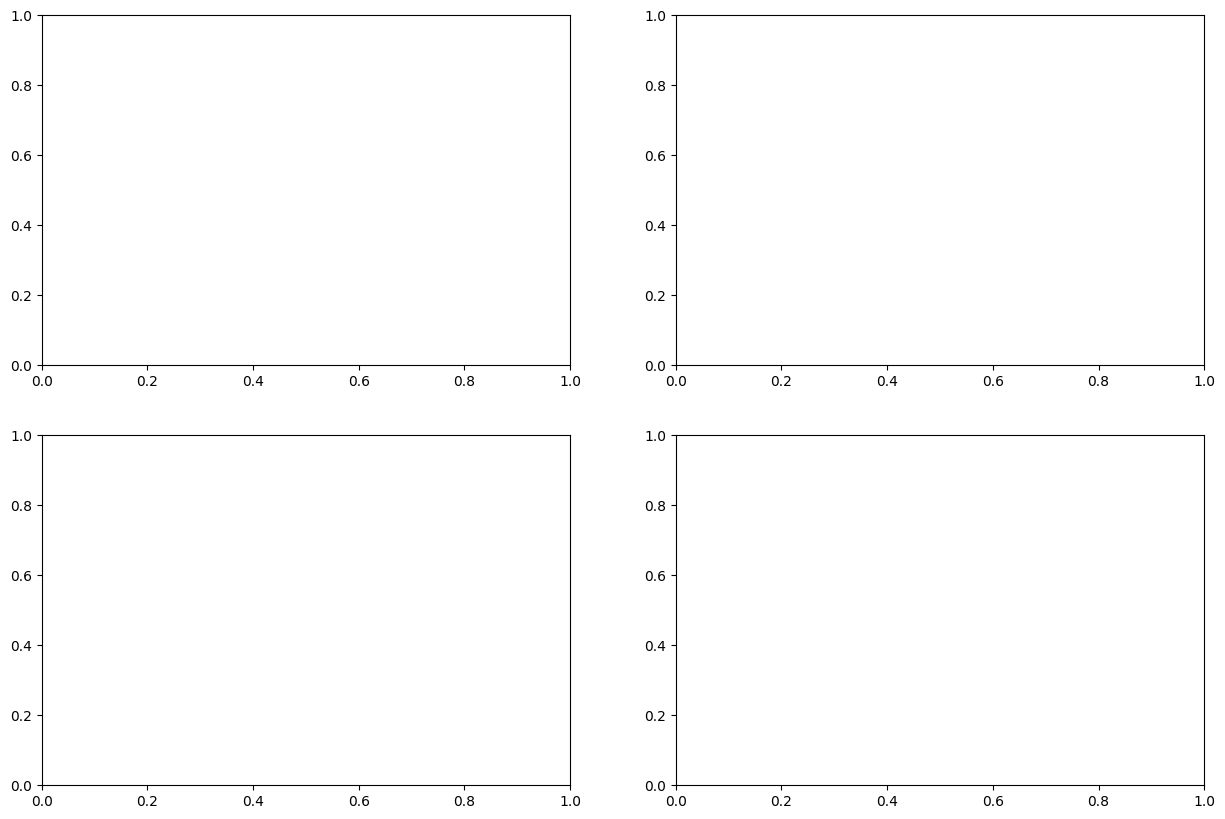

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns 
# Pastikan Anda telah meng-import color (misalnya dari matplotlib.cm atau custom function)

# Set target variable (sudah dikoreksi di sesi sebelumnya)
target_variable = "Fertilizer Name" 

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
datasets = [("Train Data", df_train), ("Original Data", df_origin)]

# Menggunakan target_variable yang dikoreksi
n_color = df_origin[target_variable].nunique() 
order_fertilizer = df_origin[target_variable].unique().tolist() 

for i, (title, data) in enumerate(datasets):
    ax = axes[i, 0]

    # Vertical barplot
    sns.countplot(x=target_variable, data=data, ax=ax,
                  palette=color(n_colors=n_color), order=order_fertilizer)
    ax.set_title(f"Fertilizer Name Distribution — {title}", pad=20, weight="bold", fontsize=14)
    ax.set_xlabel("Fertilizer Name")
    ax.set_ylabel("")
    sns.despine(ax=ax, top=True, right=True, left=False, bottom=False)

    # Add count labels on top of bars
    for p in ax.patches:
        height = p.get_height()
        x = p.get_x() + p.get_width() / 2
        ax.text(x, height + max(data[target_variable].value_counts()) * 0.01,
                f"{int(height)}",
                ha="center", va="bottom", fontsize=10, color="black")

    # Pie chart (KOREKSI DI BARIS INI)
    y_counts = data[target_variable].value_counts().sort_index() 
    wedges, texts, autotexts = axes[i, 1].pie(
        y_counts, autopct="%1.1f%%", startangle=90, colors=color(n_colors=n_color), wedgeprops=dict(width=0.4, edgecolor="w"),
        radius=1.2, shadow=True, labels=order_fertilizer)
    for text in texts + autotexts:
        text.set_fontsize(10)

    centre_circle = plt.Circle((0, 0), 0.70, fc="white")
    axes[i, 1].add_artist(centre_circle)
    axes[i, 1].set_title(f"Fertilizer Name Rate Breakdown — {title}", pad=20, weight="bold", fontsize=14)
    axes[i, 1].axis("equal")

plt.tight_layout()
plt.subplots_adjust(hspace=0.3, wspace=0.2)
plt.show()

**Target Variable Summary — `Fertilizer Name`**

* The dataset includes **7 fertilizer types**: `28-28`, `17-17-17`, `10-26-26`, `DAP`, `20-20`, `14-35-14`, and `Urea`.
* **Train and Original datasets show almost identical distributions**, with no major proportion shifts across classes.
* In the **Train Data**, class counts range from ~92K to ~114K samples — `14-35-14` and `10-26-26` are slightly more frequent, while `Urea` is the least (~12.3%).
* **Original Data** maintains a highly balanced distribution (~14.2–14.5% per class), indicating that the source data was well-normalized before splitting.
* **No severe class imbalance** is present, which is favorable for building robust **multi-class classification models**.

## Numerical Feature Distributions

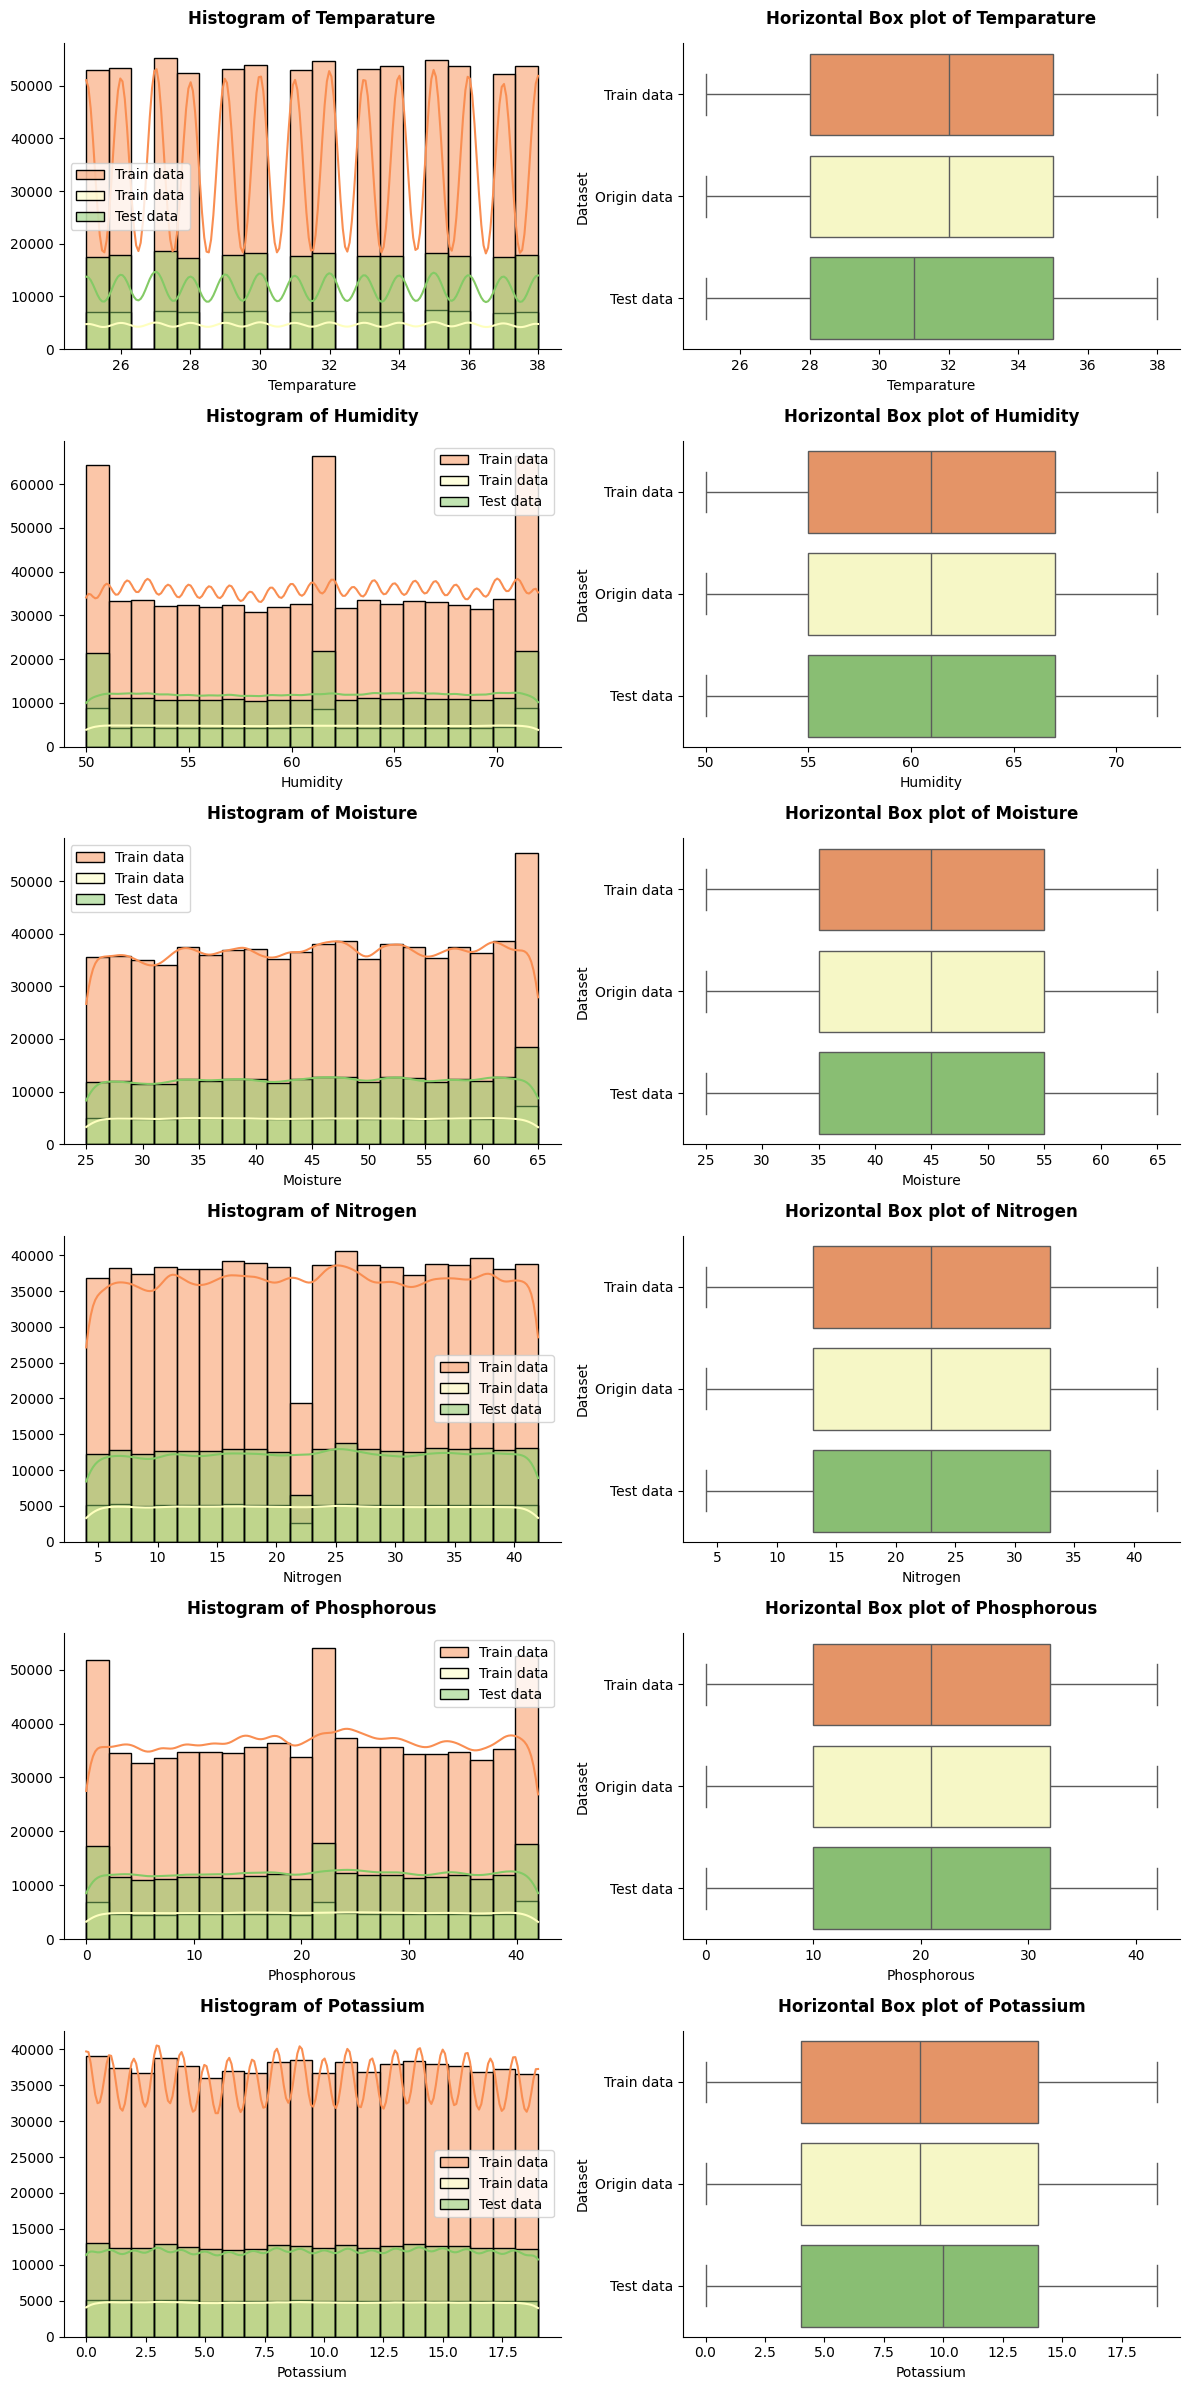

In [44]:
def plot_numerical_features(df_train, df_test, df_origin, num_features):
    colors = color(n_colors=3)
    n = len(num_features)

    fig, ax = plt.subplots(n, 2, figsize=(12, n * 4))
    ax = np.array(ax).reshape(n, 2)

    for i, feature in enumerate(num_features):
        sns.histplot(data=df_train[feature], color=colors[0], bins=20, kde=True, ax=ax[i, 0], label="Train data")
        sns.histplot(data=df_origin[feature], color=colors[1], bins=20, kde=True, ax=ax[i, 0], label="Train data")
        sns.histplot(data=df_test[feature], color=colors[2], bins=20, kde=True, ax=ax[i, 0], label="Test data")
        ax[i, 0].set_title(f"Histogram of {feature}", pad=14, weight="bold")
        ax[i, 0].legend()
        ax[i, 0].set_ylabel("")
        sns.despine(left=False, bottom=False, ax=ax[i, 0])

        df_plot = pd.concat([
            pd.DataFrame({"Dataset": "Train data", feature: df_train[feature]}),
            pd.DataFrame({"Dataset": "Origin data", feature: df_origin[feature]}),
            pd.DataFrame({"Dataset": "Test data", feature: df_test[feature]})
        ]).reset_index(drop=True)

        sns.boxplot(data=df_plot, x=feature, y="Dataset", palette=colors, orient="h",  ax=ax[i, 1])
        ax[i, 1].set_title(f"Horizontal Box plot of {feature}", pad=14, weight="bold")
        sns.despine(left=False, bottom=False, ax=ax[i, 1])

    plt.tight_layout()
    plt.show()

plot_numerical_features(df_train = df_train, df_test = df_test, df_origin = df_origin, num_features=num_features)

In [45]:
def check_skewness(data, dataset_name, numerical_features = num_features, highlight=True, sort=True):
    skewness_dict = {}
    skew_feature = []
    for feature in numerical_features:
        skew = data[feature].skew(skipna=True)
        skewness_dict[feature] = skew

    skew_df = pd.DataFrame.from_dict(skewness_dict, orient="index", columns=["Skewness"])
    if sort:
        skew_df = skew_df.reindex(skew_df["Skewness"].abs().sort_values(ascending=False).index)
    else:
        pass

    print(f"\n🔍 Skewness for {dataset_name}:")
    print("-"*70)
    print(f"{'Feature':<30} | {'Skewness':<9} | {'Remark'}")
    print("-"*70)
    for feature, row in skew_df.iterrows():
        skew = row["Skewness"]
        abs_skew = abs(skew)
        if abs_skew > 1:
            remark = "Highly skewed"
            color = "\033[91m"
        elif abs_skew > 0.5:
            remark = "Moderately skewed"
            color = "\033[93m"
        else:
            remark = "Approximately symmetric"
            color = ""
        endc = "\033[0m" if color else ""
        if highlight and color:
            print(f"{color}{feature:<30} | {skew:>+9.4f} | {remark}{endc}")
            skew_feature.append(feature)
        else:
            print(f"{feature:<30} | {skew:>+9.4f} | {remark}")
    print("-"*70)
    return skew_feature, skew_df

skew_feature_origin, skew_origin_df = check_skewness(df_origin, "Original Data")
skew_feature_train, skew_train_df = check_skewness(df_train, "Train Data")
skew_feature_test, skew_test_df = check_skewness(df_test, "Test Data")


🔍 Skewness for Original Data:
----------------------------------------------------------------------
Feature                        | Skewness  | Remark
----------------------------------------------------------------------
Potassium                      |   +0.0034 | Approximately symmetric
Phosphorous                    |   -0.0034 | Approximately symmetric
Nitrogen                       |   +0.0029 | Approximately symmetric
Humidity                       |   +0.0026 | Approximately symmetric
Temparature                    |   -0.0021 | Approximately symmetric
Moisture                       |   +0.0006 | Approximately symmetric
----------------------------------------------------------------------

🔍 Skewness for Train Data:
----------------------------------------------------------------------
Feature                        | Skewness  | Remark
----------------------------------------------------------------------
Moisture                       |   -0.0182 | Approximately symmetric

### Insights on Numerical Feature Distributions

* Includes **6 numerical features**: `Temperature`, `Humidity`, `Moisture`, `Nitrogen`, `Phosphorous`, and `Potassium`.
* **Distributions are highly consistent across Train, Test, and Original datasets**, with no visible shifts or irregularities.
* **Histograms** show mostly **uniform or mildly oscillating patterns**, indicating stable value ranges without strong peaks.
* **Boxplots** confirm that the **median and interquartile ranges align closely** among all datasets — no apparent outliers.
* **Skewness values are all near zero**, meaning the numerical features are **approximately symmetric** and do not require log transformation, Box-cox,...

## Correlation Analysis of Numerical Features

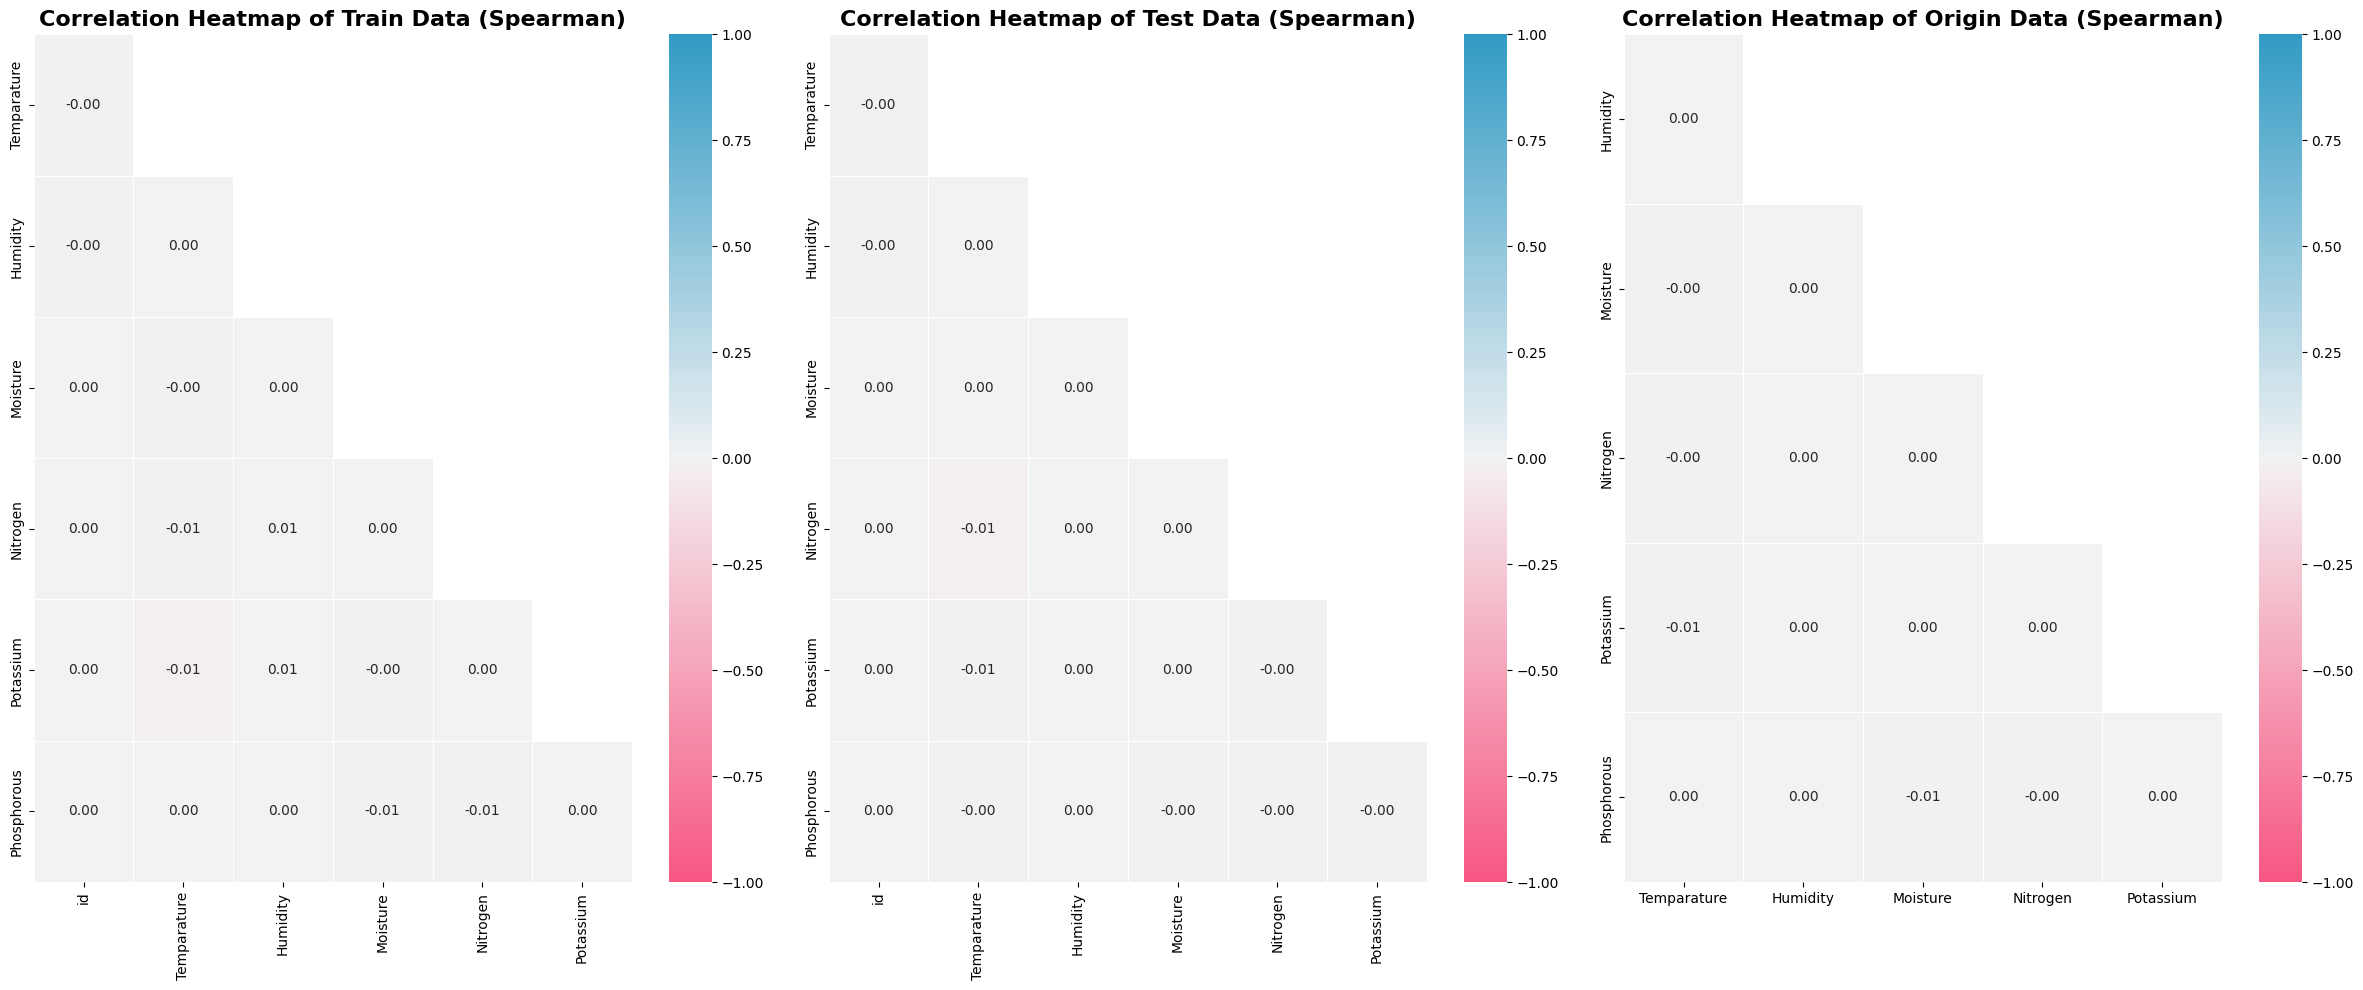

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Pastikan numpy diimpor untuk np.triu dan np.ones_like

def plot_correlation(df_train, df_origin, df_test, origin_name="Origin Data",
                     train_name="Train Data", test_name="Test Data"):
    
    # --- 1. Hitung Korelasi (Menggunakan Spearman untuk mendeteksi hubungan monotonik) ---
    # Menggunakan Spearman di semua dataset (termasuk Origin dan Test) untuk perbandingan yang konsisten
    corr_train = df_train.corr(numeric_only=True, method='spearman')
    corr_origin = df_origin.corr(numeric_only=True, method='spearman')
    corr_test = df_test.corr(numeric_only=True, method='spearman')

    # --- 2. Buat Masking (Upper Triangle) dan Slicing ---
    
    # Train Data
    mask_train = np.triu(np.ones_like(corr_train, dtype=bool))
    # Slicing untuk menghilangkan kolom pertama ('id') dan baris terakhir
    adjusted_mask_train = mask_train[1:, :-1] 
    adjusted_cereal_corr_train = corr_train.iloc[1:, :-1]

    # Origin Data
    mask_origin = np.triu(np.ones_like(corr_origin, dtype=bool))
    # Slicing Origin (Jika df_origin tidak punya 'id', slicing ini mungkin tidak perlu, 
    # tapi dipertahankan untuk keamanan, tergantung struktur data Anda)
    adjusted_mask_origin = mask_origin[1:, :-1]
    adjusted_cereal_corr_origin = corr_origin.iloc[1:, :-1]

    # Test Data
    mask_test = np.triu(np.ones_like(corr_test, dtype=bool))
    adjusted_mask_test = mask_test[1:, :-1]
    adjusted_cereal_corr_test = corr_test.iloc[1:, :-1]

    # --- 3. Plot Heatmap ---
    cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
    fig, ax = plt.subplots(1, 3, figsize=(24, 10))

    # Heatmap Train
    sns.heatmap(data=adjusted_cereal_corr_train, mask=adjusted_mask_train,
                annot=True, fmt=".2f", cmap=cmap,
                vmin=-1, vmax=1, linecolor="white", linewidths=0.5, ax=ax[0])
    ax[0].set_title(f"Correlation Heatmap of {train_name} (Spearman)", fontsize=16, weight="bold")

    # Heatmap Test
    sns.heatmap(data=adjusted_cereal_corr_test, mask=adjusted_mask_test,
                annot=True, fmt=".2f", cmap=cmap,
                vmin=-1, vmax=1, linecolor="white", linewidths=0.5, ax=ax[1])
    ax[1].set_title(f"Correlation Heatmap of {test_name} (Spearman)", fontsize=16, weight="bold")

    # Heatmap Origin
    sns.heatmap(data=adjusted_cereal_corr_origin, mask=adjusted_mask_origin,
                annot=True, fmt=".2f", cmap=cmap,
                vmin=-1, vmax=1, linecolor="white", linewidths=0.5, ax=ax[2])
    ax[2].set_title(f"Correlation Heatmap of {origin_name} (Spearman)", fontsize=16, weight="bold")

    plt.tight_layout()
    plt.show()

# Panggilan fungsi
plot_correlation(df_train=df_train, df_origin=df_origin, df_test=df_test)

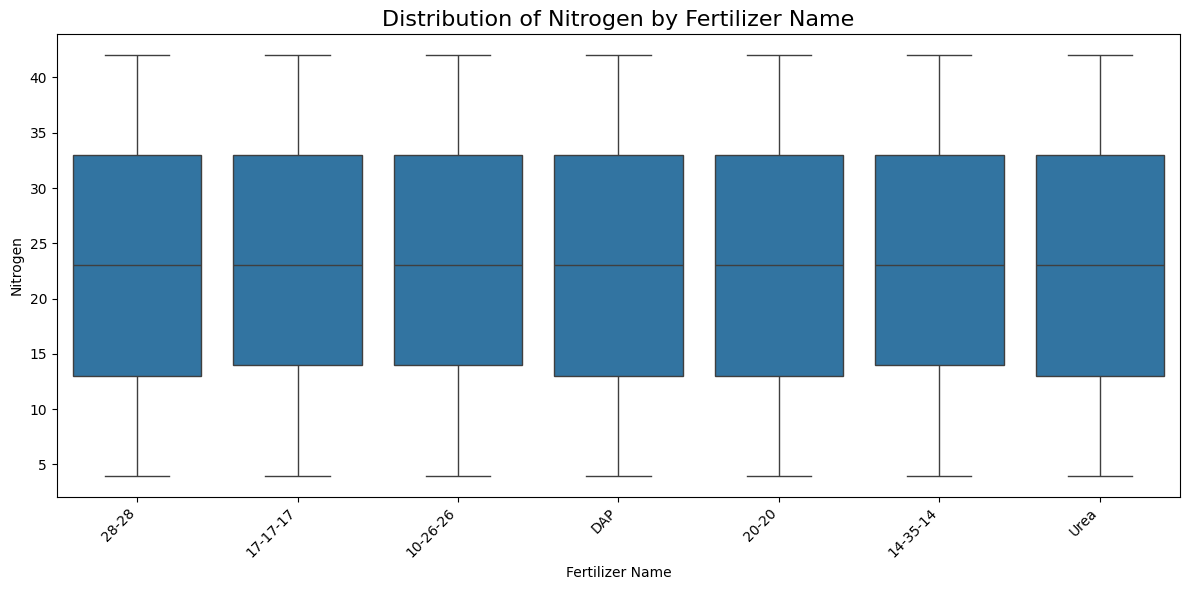

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan nama kolom target dan fitur sudah benar (menggunakan spasi 'Fertilizer Name')
target_col = "Fertilizer Name"
feature_col = "Nitrogen" # Ganti dengan fitur lain seperti 'Potassium' atau 'Moisture'

plt.figure(figsize=(12, 6))
sns.boxplot(x=target_col, y=feature_col, data=df_train)
plt.title(f'Distribution of {feature_col} by {target_col}', fontsize=16)
plt.xlabel(target_col)
plt.ylabel(feature_col)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [52]:
# Pastikan library pingouin sudah terinstal: pip install pingouin
import pingouin as pg

# Definisikan kolom yang akan diuji
dv_col = "Nitrogen" # Dependent Variable (Numerik)
between_col = "Fertilizer Name" # Between-group factor (Kategorikal)

# Lakukan uji ANOVA untuk df_train
aov = pg.anova(data=df_train, dv=dv_col, between=between_col, detailed=True)

print(f"\nANOVA Results for {dv_col} vs {between_col} (Train Data):")
print(aov)

# Perhatikan nilai 'p-unc'. 
# Jika p-unc < 0.05, terdapat perbedaan rata-rata yang signifikan, artinya fitur ini penting.


ANOVA Results for Nitrogen vs Fertilizer Name (Train Data):
            Source            SS      DF           MS         F         p-unc  \
0  Fertilizer Name  6.017292e+03       6  1002.882004  7.972387  1.276011e-08   
1           Within  9.434495e+07  749993   125.794447       NaN           NaN   

        np2  
0  0.000064  
1       NaN  


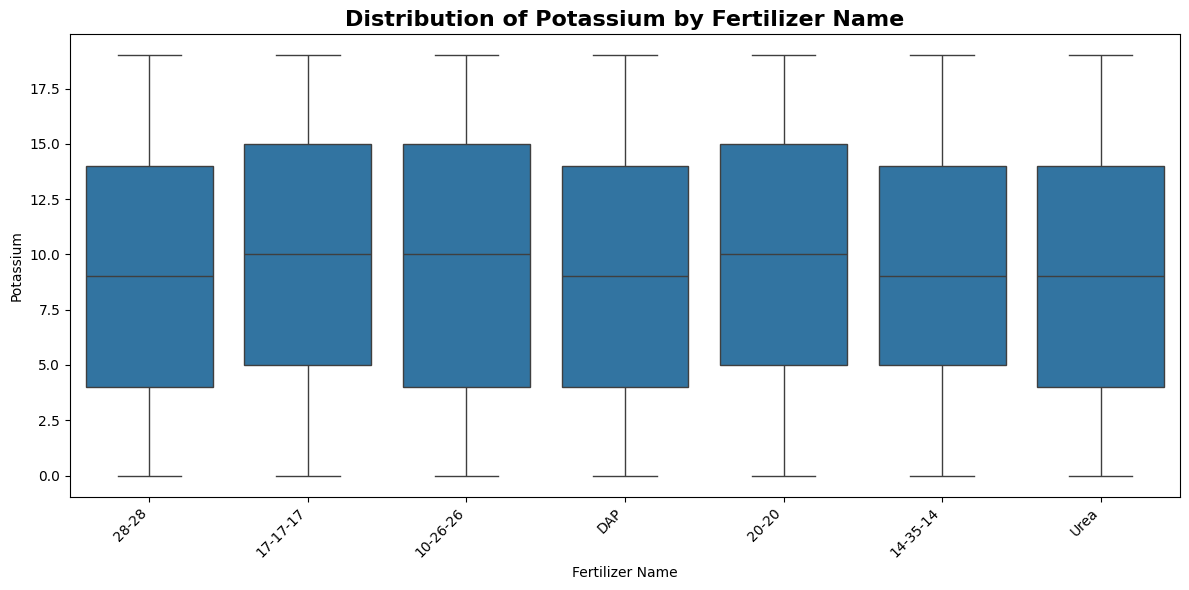

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

target_col = "Fertilizer Name"
feature_col = "Potassium" 

plt.figure(figsize=(12, 6))
# Menggunakan df_train untuk analisis
sns.boxplot(x=target_col, y=feature_col, data=df_train)
plt.title(f'Distribution of {feature_col} by {target_col}', fontsize=16, weight='bold')
plt.xlabel(target_col)
plt.ylabel(feature_col)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [54]:
import pingouin as pg

# Definisikan kolom yang akan diuji
dv_col = "Potassium" # Dependent Variable (Numerik)
between_col = "Fertilizer Name" # Between-group factor (Kategorikal)

# Lakukan uji ANOVA untuk df_train
aov = pg.anova(data=df_train, dv=dv_col, between=between_col, detailed=True)

print(f"\nANOVA Results for {dv_col} vs {between_col} (Train Data):")
print(aov)

# Lakukan hal yang sama untuk Phosphorous, karena ini juga penting
dv_col_p = "Phosphorous"
aov_p = pg.anova(data=df_train, dv=dv_col_p, between=between_col, detailed=True)
print(f"\nANOVA Results for {dv_col_p} vs {between_col} (Train Data):")
print(aov_p)


ANOVA Results for Potassium vs Fertilizer Name (Train Data):
            Source            SS      DF           MS          F  \
0  Fertilizer Name  7.466001e+03       6  1244.333549  37.443041   
1           Within  2.492430e+07  749993    33.232706        NaN   

          p-unc       np2  
0  1.073538e-45  0.000299  
1           NaN       NaN  

ANOVA Results for Phosphorous vs Fertilizer Name (Train Data):
            Source            SS      DF           MS          F  \
0  Fertilizer Name  1.770993e+04       6  2951.655164  19.365041   
1           Within  1.143153e+08  749993   152.421839        NaN   

          p-unc       np2  
0  1.031880e-22  0.000155  
1           NaN       NaN  


In [47]:
print("Standard Deviation of Features:")
print(df_train[['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']].std())

Standard Deviation of Features:
Temparature     4.025574
Humidity        6.647695
Moisture       11.794594
Nitrogen       11.216125
Potassium       5.765622
Phosphorous    12.346831
dtype: float64


In [48]:
print("\nUnique Value Counts:")
for col in ['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']:
    print(f"{col}: {df_train[col].nunique()}")


Unique Value Counts:
Temparature: 14
Humidity: 23
Moisture: 41
Nitrogen: 39
Potassium: 20
Phosphorous: 43


In [56]:
import pandas as pd
from scipy.stats import chi2_contingency

# Buat tabel kontingensi (crosstab)
contingency_table = pd.crosstab(df_train['Crop Type'], df_train['Fertilizer Name'])

# Lakukan Uji Chi-Square
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("\n--- Chi-Square Test: Crop Type vs Fertilizer Name ---")
print(f"Chi2 Statistic: {chi2:.2f}")
print(f"P-Value: {p_value:.10f}")
print("P-Value yang sangat kecil (<< 0.05) menunjukkan hubungan yang kuat.")


--- Chi-Square Test: Crop Type vs Fertilizer Name ---
Chi2 Statistic: 3094.46
P-Value: 0.0000000000
P-Value yang sangat kecil (<< 0.05) menunjukkan hubungan yang kuat.


In [57]:
import pandas as pd
from scipy.stats import chi2_contingency

# Buat tabel kontingensi (crosstab) untuk Soil Type
contingency_table_soil = pd.crosstab(df_train['Soil Type'], df_train['Fertilizer Name'])

# Lakukan Uji Chi-Square
chi2_soil, p_value_soil, dof_soil, expected_soil = chi2_contingency(contingency_table_soil)

print("\n--- Chi-Square Test: Soil Type vs Fertilizer Name ---")
print(f"Chi2 Statistic: {chi2_soil:.2f}")
print(f"P-Value: {p_value_soil:.10f}")


--- Chi-Square Test: Soil Type vs Fertilizer Name ---
Chi2 Statistic: 923.33
P-Value: 0.0000000000


### **Correlation Analysis — Numerical Features**

* The **heatmaps for Train, Test, and Original datasets** show that **all correlation coefficients** are very close to **0.00**.
* This indicates **no significant linear relationship** among the numerical features (`Temperature`, `Humidity`, `Moisture`, `Nitrogen`, `Phosphorous`, `Potassium`).
* The correlation structure remains **highly consistent across all datasets**, suggesting that the **data split was random and unbiased**.
* None of the features exhibit **multicollinearity**, meaning each variable contributes **independent information** to the model.

## Categorical Feature Distributions

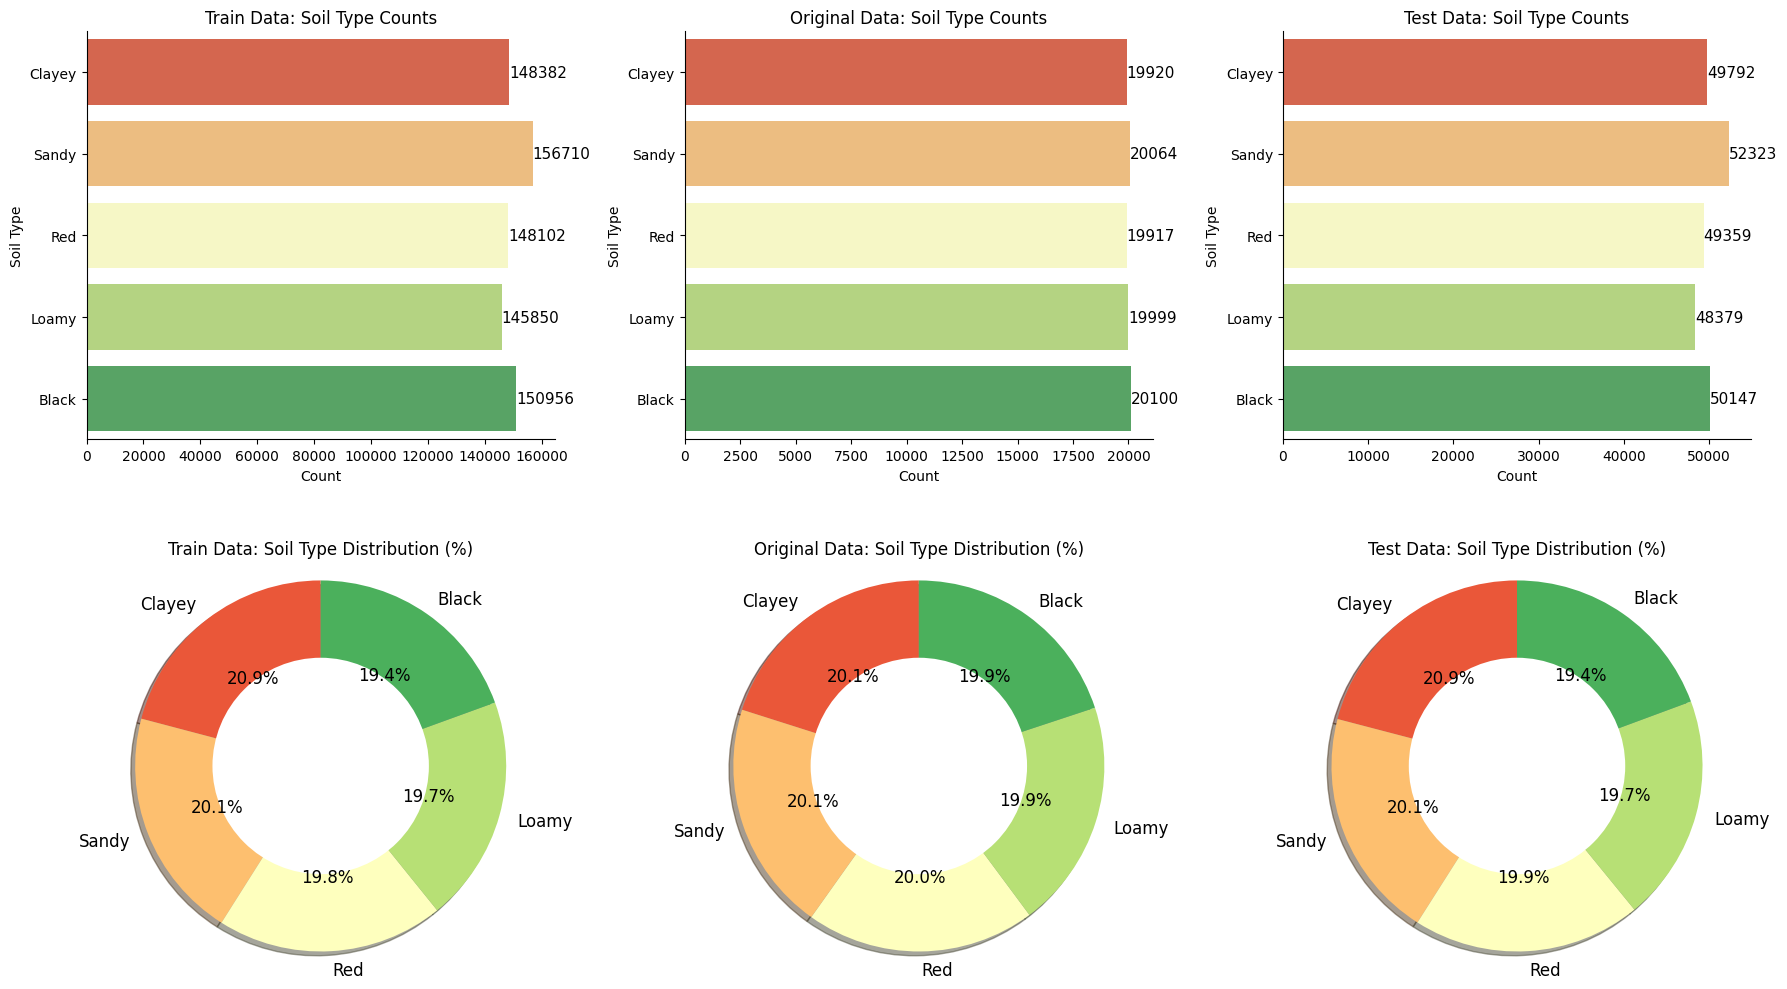

In [59]:
def plot_categorical_distribution_across_datasets(train_data, original_data, test_data, feature):
    colors = color(n_colors=df_train[feature].nunique())
    dataset_names = ["Train", "Original", "Test"]
    datasets = [train_data, original_data, test_data]
    order = df_train[feature].unique().tolist()

    fig, ax = plt.subplots(2, 3, figsize=(18, 10))

    for i, (data, name) in enumerate(zip(datasets, dataset_names)):
        sns.countplot(y=feature, data=data, ax=ax[0, i], palette=colors, order=order)
        ax[0, i].set_title(f"{name} Data: {feature} Counts")
        ax[0, i].set_xlabel("Count")
        ax[0, i].set_ylabel(feature)
        
        for p in ax[0, i].patches:
            ax[0, i].annotate(f"{int(p.get_width())}", 
                               (p.get_width(), p.get_y() + p.get_height() / 2), 
                               ha="left", va="center", 
                               color="black", fontsize=11)
        ax[0, i].set_axisbelow(True)
        sns.despine(ax=ax[0, i])

    for i, (data, name) in enumerate(zip(datasets, dataset_names)):
        counts = data[feature].value_counts()
        wedges, texts, autotexts = ax[1, i].pie(
            counts, labels=order, autopct="%1.1f%%", startangle=90, colors=colors,
            textprops={"fontsize": 12}, radius=1.2,  shadow=True)
        centre_circle = plt.Circle((0, 0), 0.70, fc="white")
        ax[1, i].add_artist(centre_circle)
        ax[1, i].set_title(f"{name} Data: {feature} Distribution (%)")
        ax[1, i].axis("equal")

    plt.tight_layout()
    plt.subplots_adjust(hspace=0.3)  
    plt.show()

plot_categorical_distribution_across_datasets(df_train, df_origin, df_test, "Soil Type")

In [61]:
# --- LANGKAH 1: PENGGANTIAN NAMA KOLOM SECARA GLOBAL (WAJIB DIJALANKAN DI AWAL) ---
import pandas as pd # Pastikan Pandas diimpor jika belum

for df in [df_train, df_origin, df_test]:
    # Mengganti 'Soil Type' menjadi 'Soil_Type'
    if 'Soil Type' in df.columns:
        df.rename(columns={'Soil Type': 'Soil_Type'}, inplace=True)
    # Mengganti 'Crop Type' menjadi 'Crop_Type'
    if 'Crop Type' in df.columns:
        df.rename(columns={'Crop Type': 'Crop_Type'}, inplace=True)
    # Mengganti 'Fertilizer Name' (jika ada) menjadi 'Fertilizer_Name'
    if 'Fertilizer Name' in df.columns:
        df.rename(columns={'Fertilizer Name': 'Fertilizer_Name'}, inplace=True)

print("✅ Nama kolom telah berhasil diperbarui: Soil_Type, Crop_Type, Fertilizer_Name.")

✅ Nama kolom telah berhasil diperbarui: Soil_Type, Crop_Type, Fertilizer_Name.


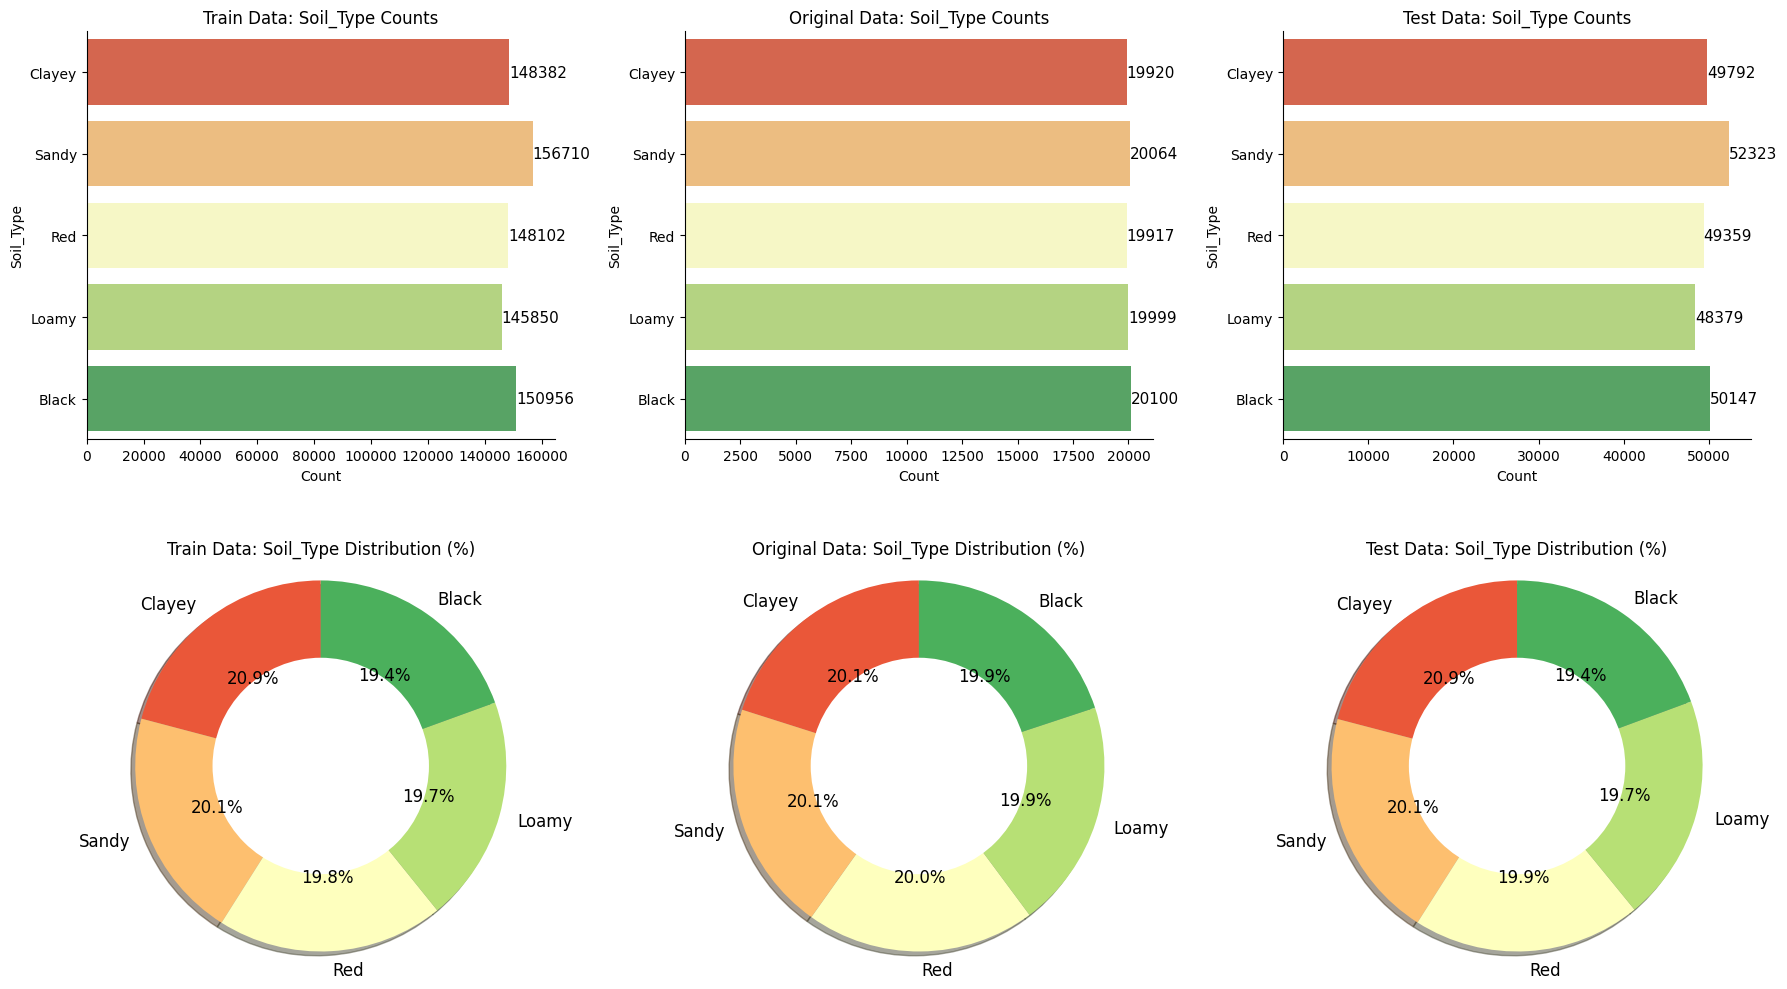

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
# Pastikan 'color' (fungsi untuk palet) sudah didefinisikan atau diimpor sebelumnya.

def plot_categorical_distribution_across_datasets(train_data, original_data, test_data, feature):
    colors = color(n_colors=train_data[feature].nunique())
    dataset_names = ["Train", "Original", "Test"]
    datasets = [train_data, original_data, test_data]
    order = train_data[feature].unique().tolist()

    fig, ax = plt.subplots(2, 3, figsize=(18, 10))

    for i, (data, name) in enumerate(zip(datasets, dataset_names)):
        # Countplot (Bar Chart)
        sns.countplot(y=feature, data=data, ax=ax[0, i], palette=colors, order=order)
        ax[0, i].set_title(f"{name} Data: {feature} Counts")
        ax[0, i].set_xlabel("Count")
        ax[0, i].set_ylabel(feature)
        
        for p in ax[0, i].patches:
            ax[0, i].annotate(f"{int(p.get_width())}", 
                             (p.get_width(), p.get_y() + p.get_height() / 2), 
                             ha="left", va="center", 
                             color="black", fontsize=11)
        ax[0, i].set_axisbelow(True)
        sns.despine(ax=ax[0, i])

        # Pie Chart
        counts = data[feature].value_counts()
        wedges, texts, autotexts = ax[1, i].pie(
            counts, labels=order, autopct="%1.1f%%", startangle=90, colors=colors,
            textprops={"fontsize": 12}, radius=1.2, shadow=True)
        centre_circle = plt.Circle((0, 0), 0.70, fc="white")
        ax[1, i].add_artist(centre_circle)
        ax[1, i].set_title(f"{name} Data: {feature} Distribution (%)")
        ax[1, i].axis("equal")

    plt.tight_layout()
    plt.subplots_adjust(hspace=0.3) 
    plt.show()

# Panggilan fungsi menggunakan nama kolom yang sudah diperbarui
plot_categorical_distribution_across_datasets(df_train, df_origin, df_test, "Soil_Type")

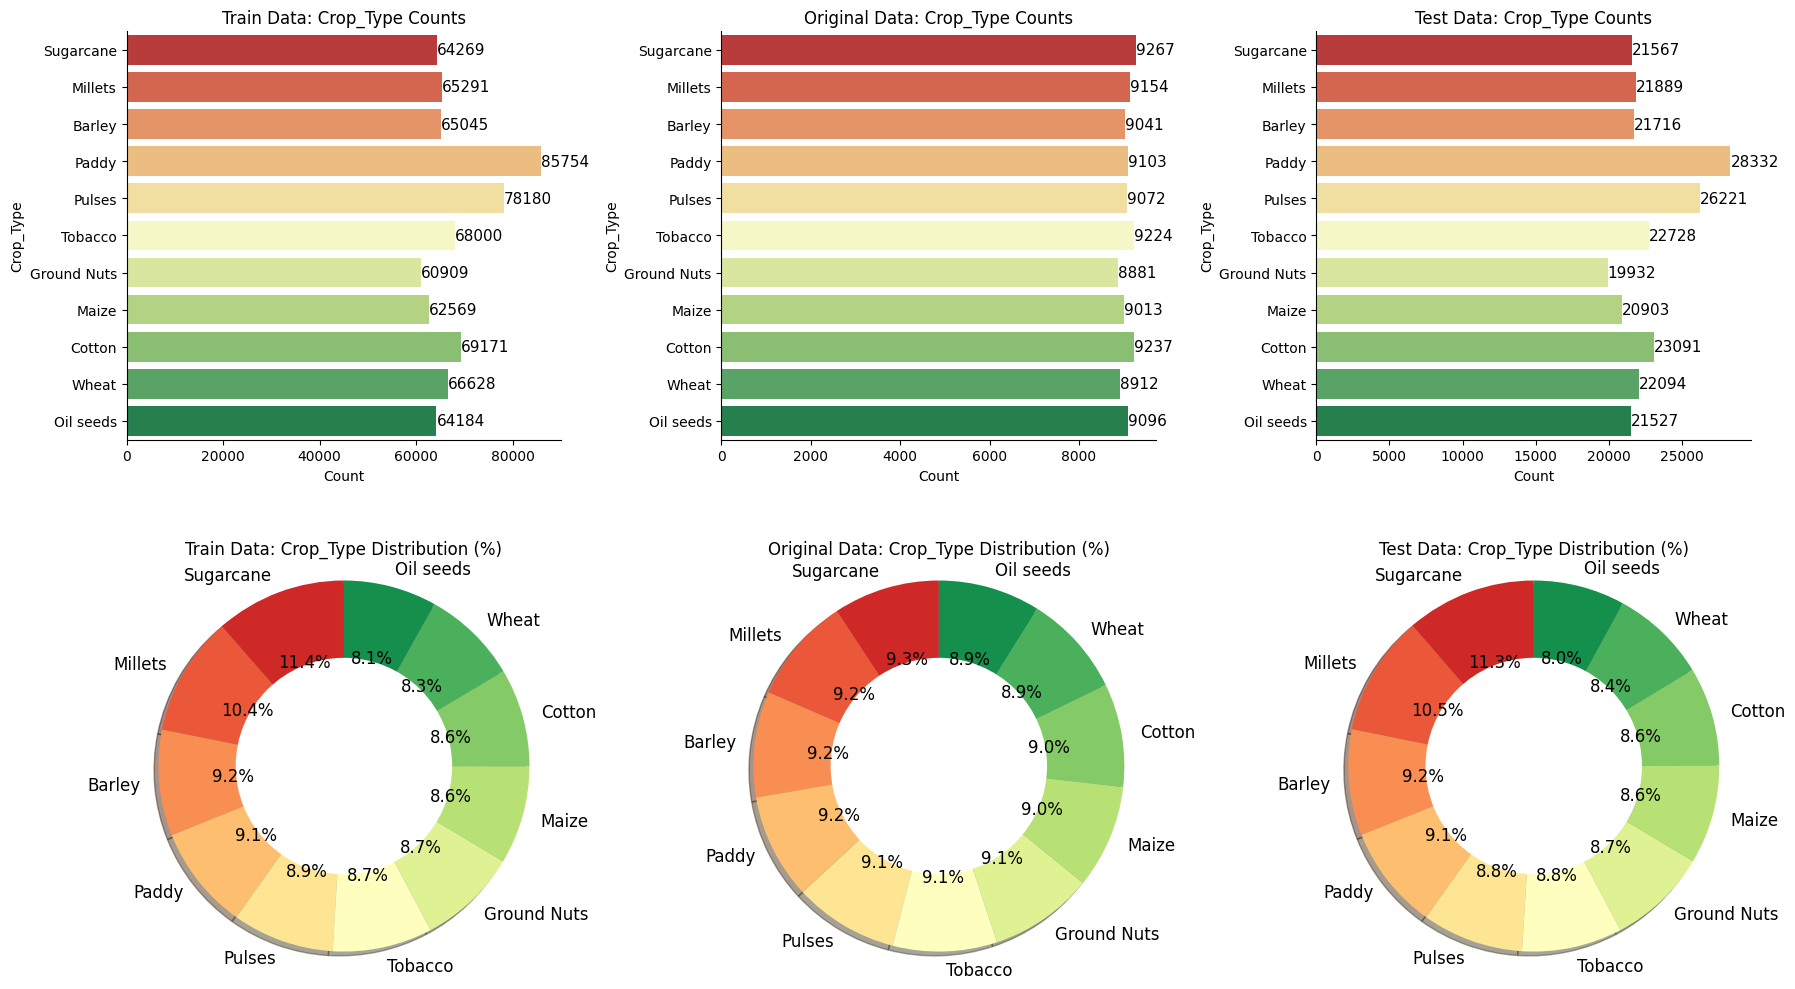

In [63]:
plot_categorical_distribution_across_datasets(df_train, df_origin, df_test, "Crop_Type")

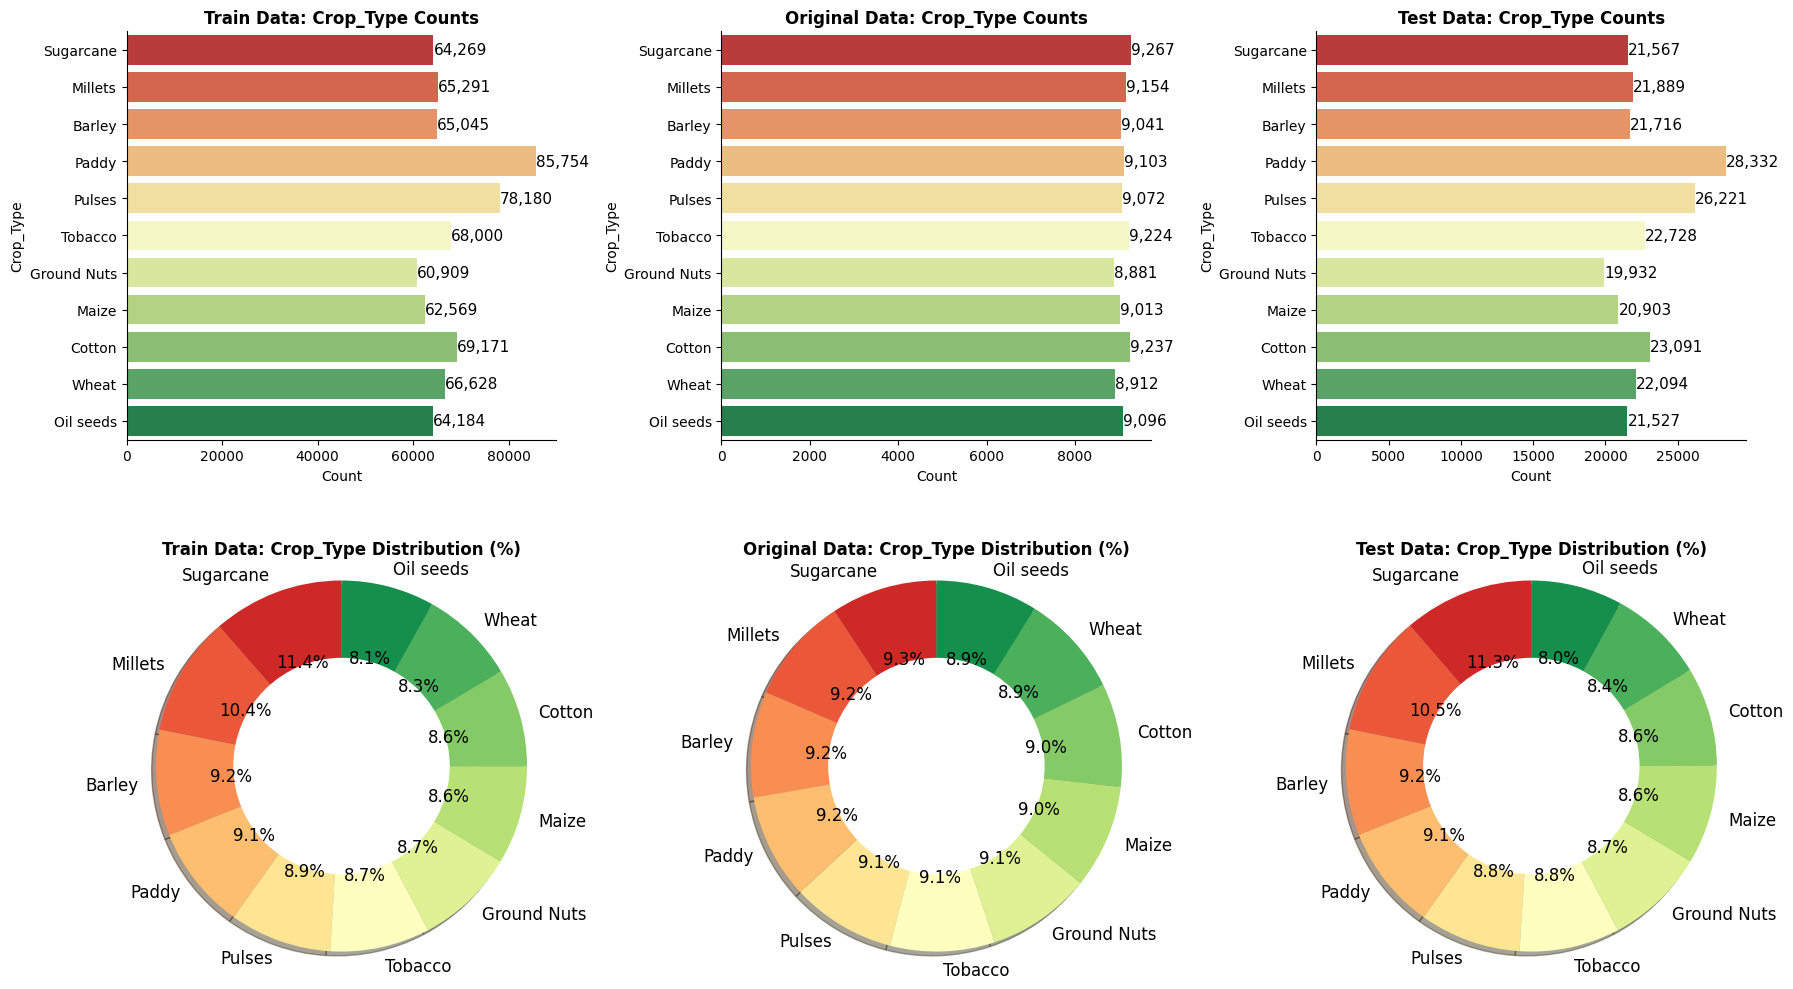

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
# Pastikan 'color' (fungsi untuk palet) sudah didefinisikan atau diimpor sebelumnya.

def plot_categorical_distribution_across_datasets(train_data, original_data, test_data, feature):
    # Menggunakan train_data[feature].nunique() untuk mendapatkan jumlah warna
    colors = color(n_colors=train_data[feature].nunique()) 
    dataset_names = ["Train", "Original", "Test"]
    datasets = [train_data, original_data, test_data]
    
    # Mengambil urutan dari data train
    order = train_data[feature].unique().tolist()

    fig, ax = plt.subplots(2, 3, figsize=(18, 10))

    for i, (data, name) in enumerate(zip(datasets, dataset_names)):
        # --- Bar Chart (Countplot) ---
        sns.countplot(y=feature, data=data, ax=ax[0, i], palette=colors, order=order)
        ax[0, i].set_title(f"{name} Data: {feature} Counts", weight='bold')
        ax[0, i].set_xlabel("Count")
        ax[0, i].set_ylabel(feature)
        
        # Menambahkan label count di bar
        for p in ax[0, i].patches:
            ax[0, i].annotate(f"{int(p.get_width()):,}", 
                             (p.get_width(), p.get_y() + p.get_height() / 2), 
                             ha="left", va="center", 
                             color="black", fontsize=11)
        ax[0, i].set_axisbelow(True)
        sns.despine(ax=ax[0, i])

        # --- Pie Chart ---
        counts = data[feature].value_counts()
        wedges, texts, autotexts = ax[1, i].pie(
            counts, labels=order, autopct="%1.1f%%", startangle=90, colors=colors,
            textprops={"fontsize": 12}, radius=1.2, shadow=True)
        centre_circle = plt.Circle((0, 0), 0.70, fc="white")
        ax[1, i].add_artist(centre_circle)
        ax[1, i].set_title(f"{name} Data: {feature} Distribution (%)", weight='bold')
        ax[1, i].axis("equal")

    plt.tight_layout()
    plt.subplots_adjust(hspace=0.3) 
    plt.show()

# Panggilan fungsi menggunakan nama kolom yang sudah dikoreksi
plot_categorical_distribution_across_datasets(df_train, df_origin, df_test, "Crop_Type")

**Categorical Feature Overview**

**1. `Soil_Type` — Type of Soil**

* The dataset includes **5 soil types**: `Clayey`, `Sandy`, `Red`, `Loamy`, and `Black`.
* The distribution is **highly balanced**, with each soil type representing roughly **19–21%** of total samples.
* **Sandy** and **Clayey** soils are the most common in both Train and Test datasets (~20–21%).
* The proportions across **Train, Test, and Original datasets** are nearly identical → indicating **no data bias or sampling imbalance**.

**2. `Crop_Type` — Type of Crop**

* Includes **11 crop types** such as `Paddy`, `Sugarcane`, `Maize`, `Cotton`, `Wheat`, `Millets`, `Barley`, `Tobacco`, `Ground Nuts`, `Pulses`, and `Oil seeds`.
* The distribution is **fairly uniform**, ranging from **~8% to 11%** for each crop.
* `Paddy` and `Sugarcane` are the most frequent crops (~11%), while `Oil seeds` is the least (~8%).
* **Percentage distributions remain consistent** across all datasets, confirming a **random and unbiased split**.

## Bivariate Analysis

In [65]:
df_train_combined = pd.concat([df_train, df_origin], axis=0, ignore_index=True)


 Checking normality of numeric feature(s) by target feature: 'Fertilizer_Name'

🔹 Feature: Temparature


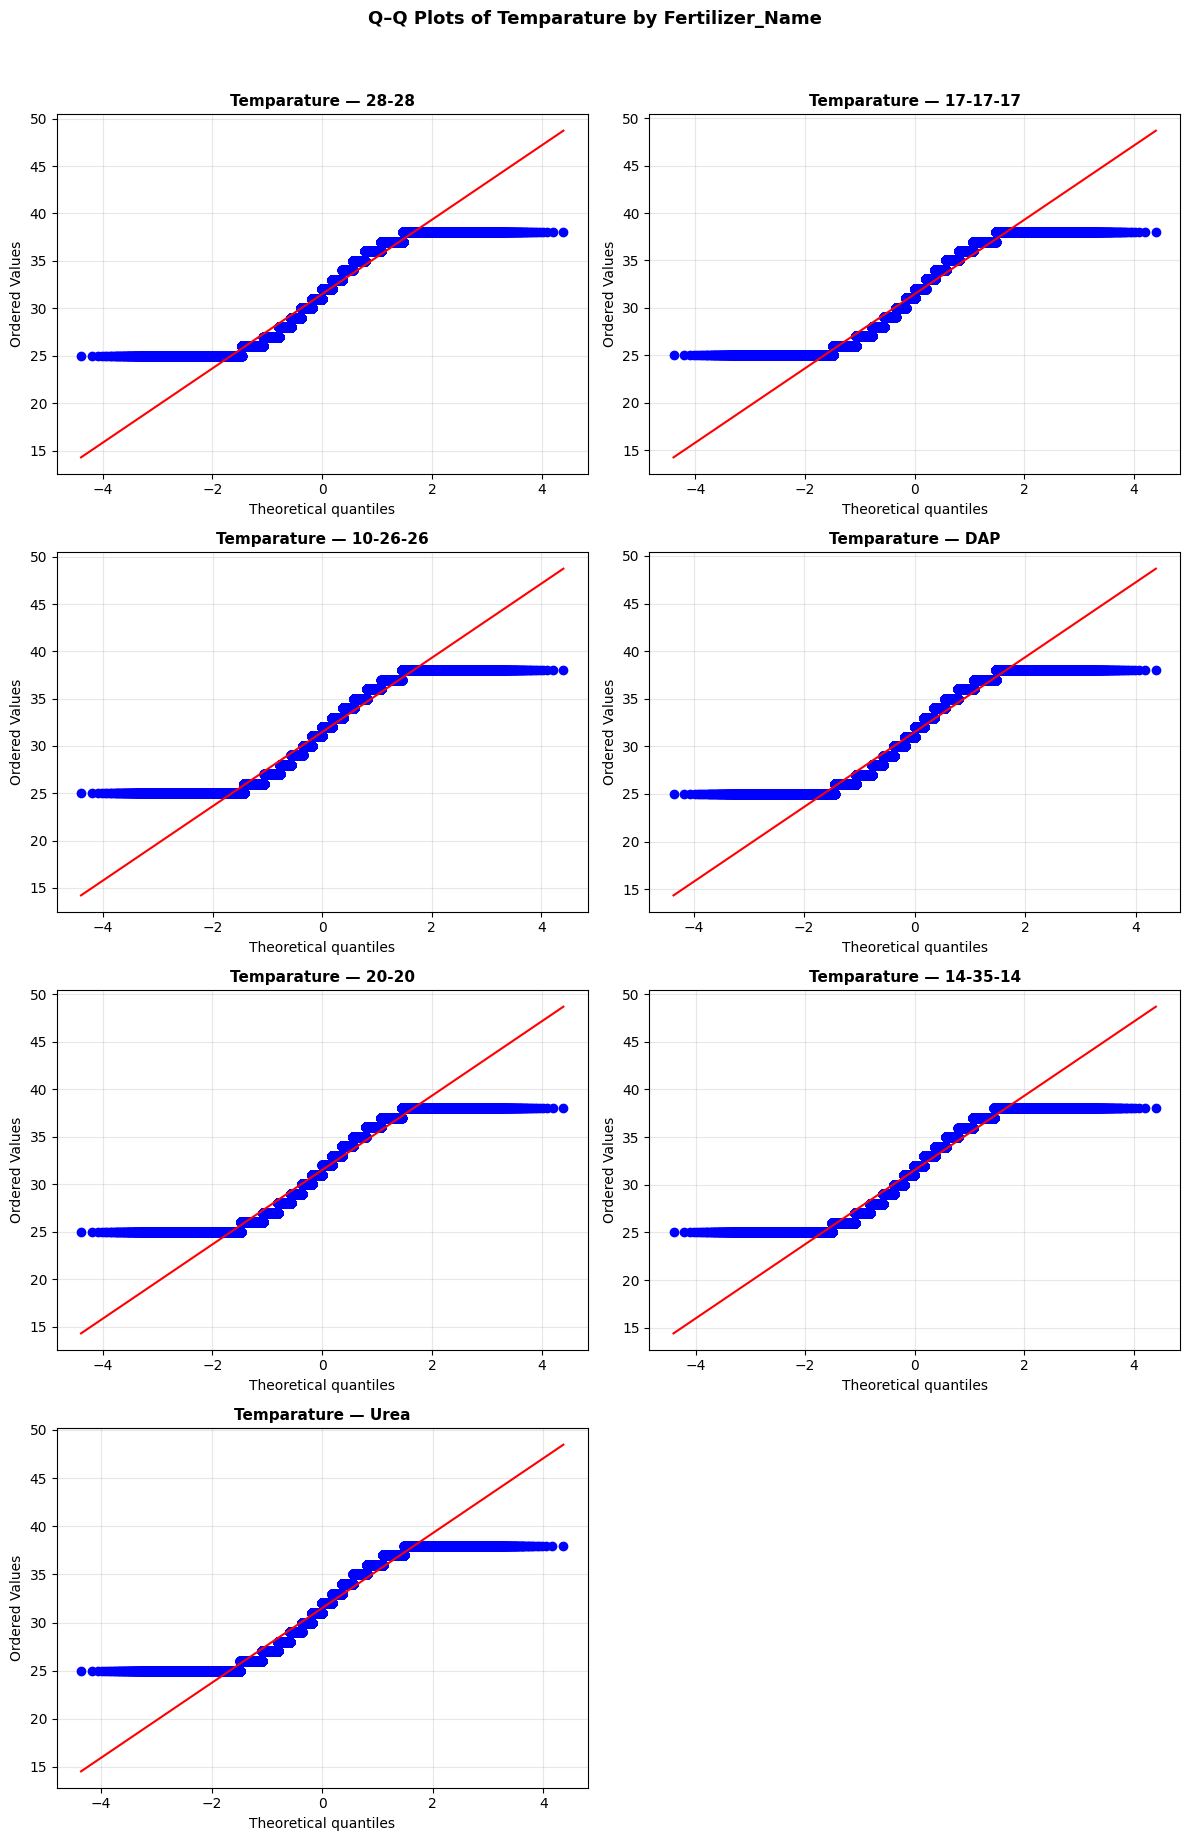


✅ All groups approximately follow normal distribution.



🔍 Interpretation:
   ⚠️ Statistically significant difference, but practically small — ANOVA still acceptable.
   Recommendation → Use Welch’s ANOVA (robust to mild variance differences).

🔍 Welch’s ANOVA Test: Temparature ~ Fertilizer_Name
Testing mean differences under heteroscedasticity assumption...

Welch’s ANOVA Result:
F-statistic = 5.5688,  p-value = 0.000009

✅ Significant difference found (p < 0.05)
➡️ Performing Games–Howell post-hoc test:



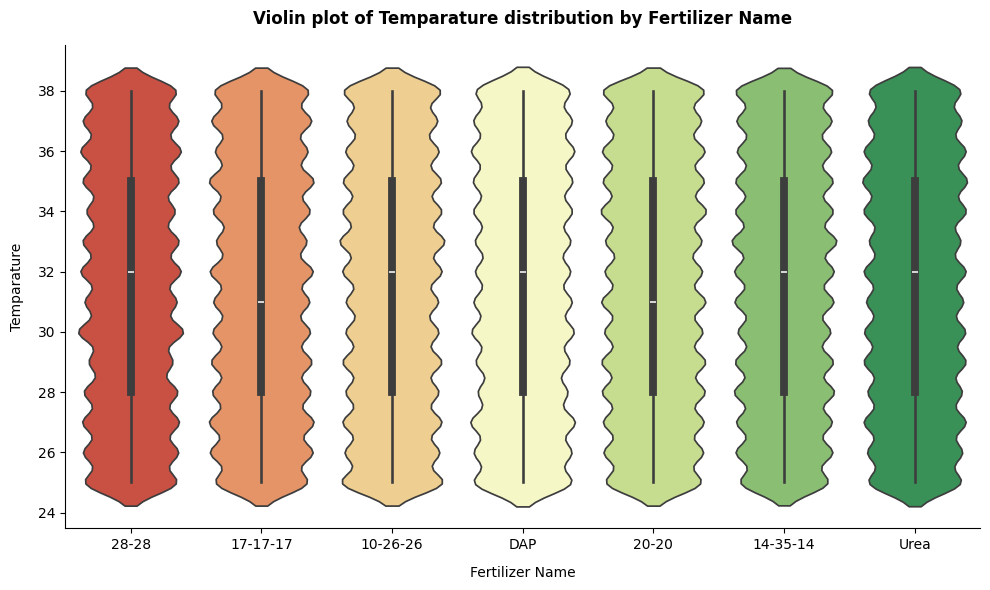


 Checking normality of numeric feature(s) by target feature: 'Fertilizer_Name'

🔹 Feature: Humidity


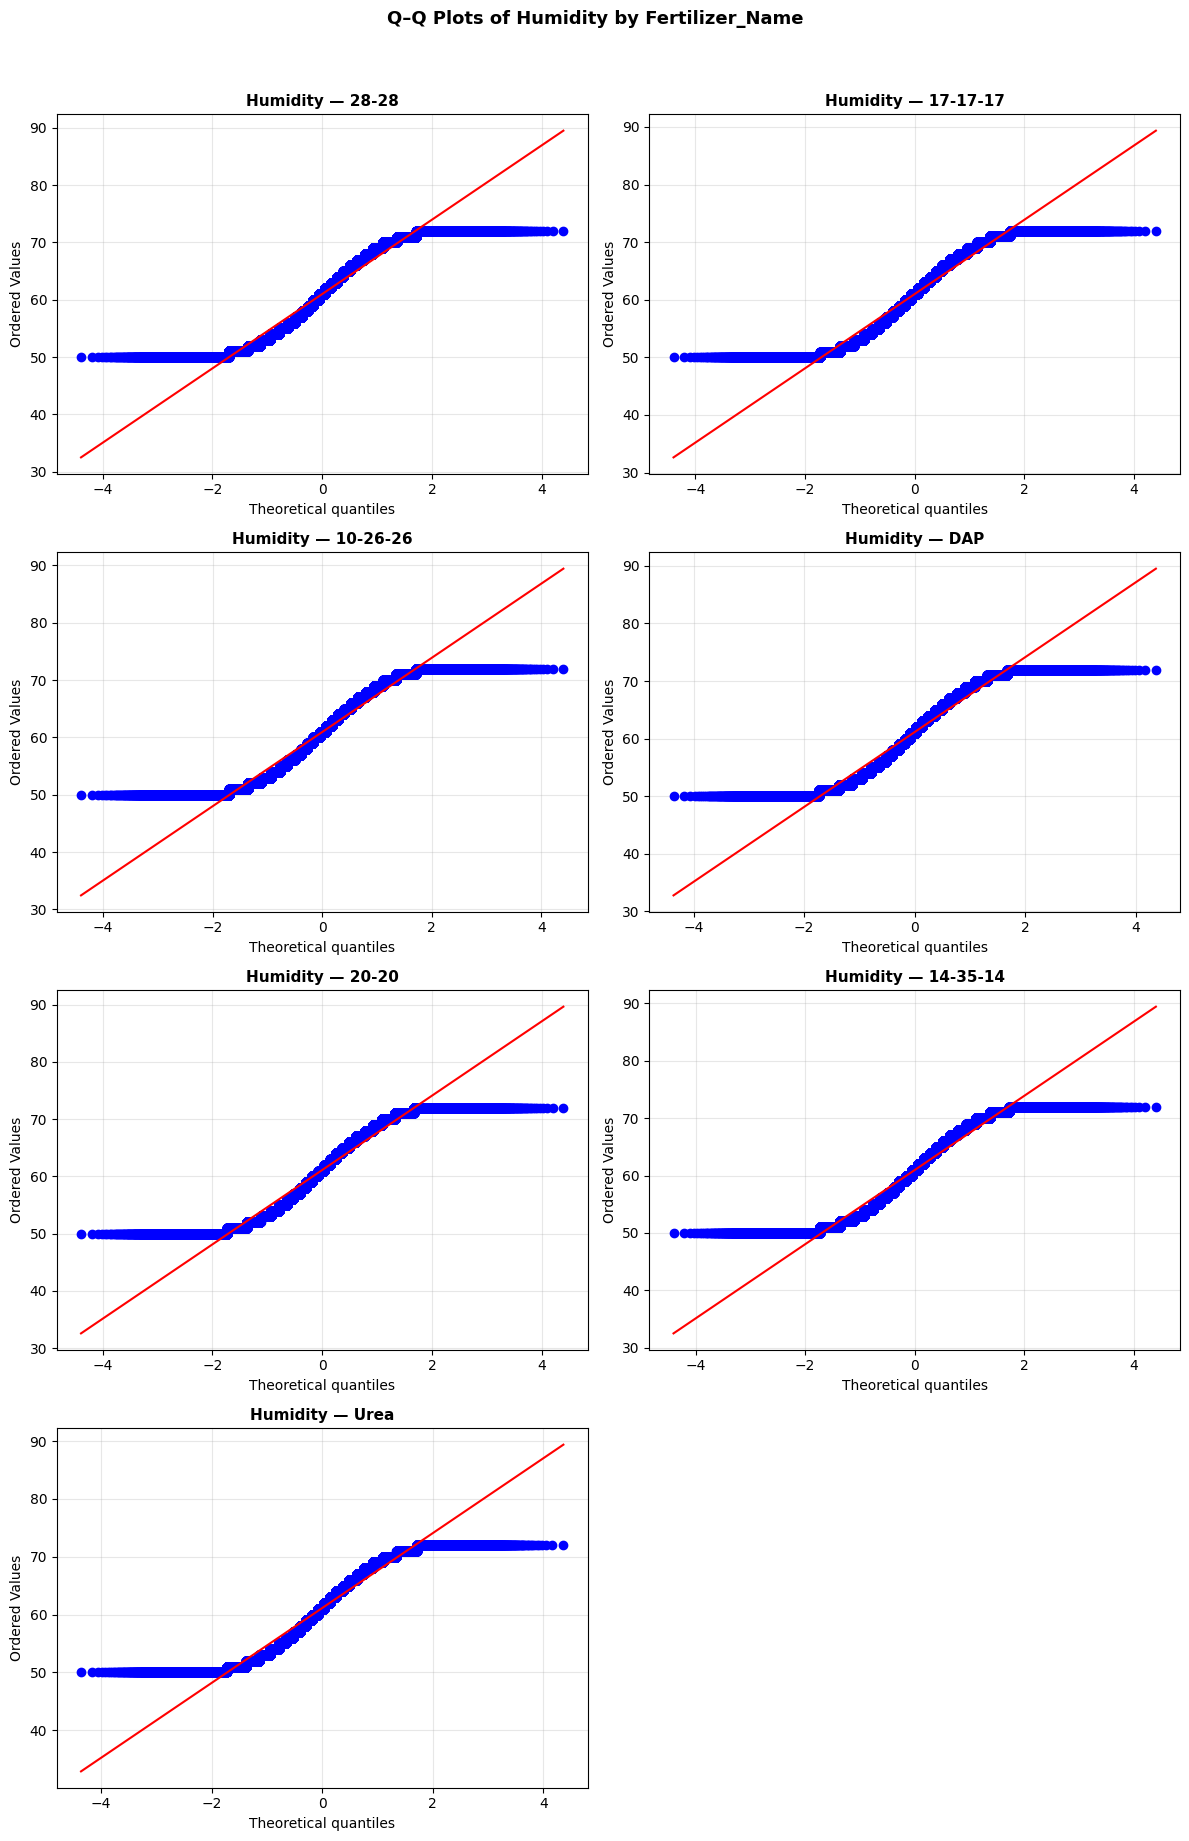


✅ All groups approximately follow normal distribution.



🔍 Interpretation:
   ⚠️ Statistically significant difference, but practically small — ANOVA still acceptable.
   Recommendation → Use Welch’s ANOVA (robust to mild variance differences).

🔍 Welch’s ANOVA Test: Humidity ~ Fertilizer_Name
Testing mean differences under heteroscedasticity assumption...

Welch’s ANOVA Result:
F-statistic = 18.0338,  p-value = 0.000000

✅ Significant difference found (p < 0.05)
➡️ Performing Games–Howell post-hoc test:



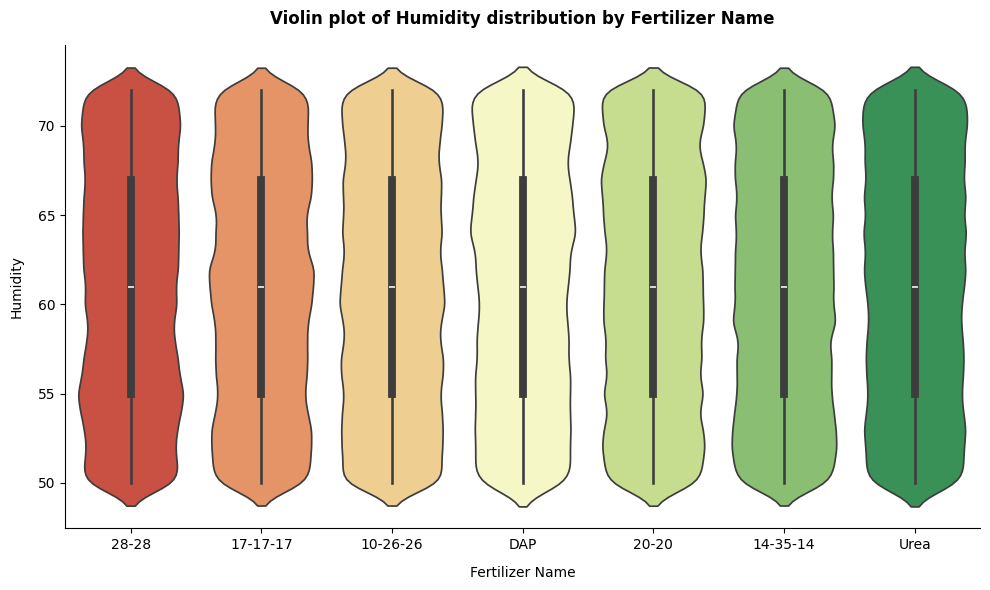


 Checking normality of numeric feature(s) by target feature: 'Fertilizer_Name'

🔹 Feature: Moisture


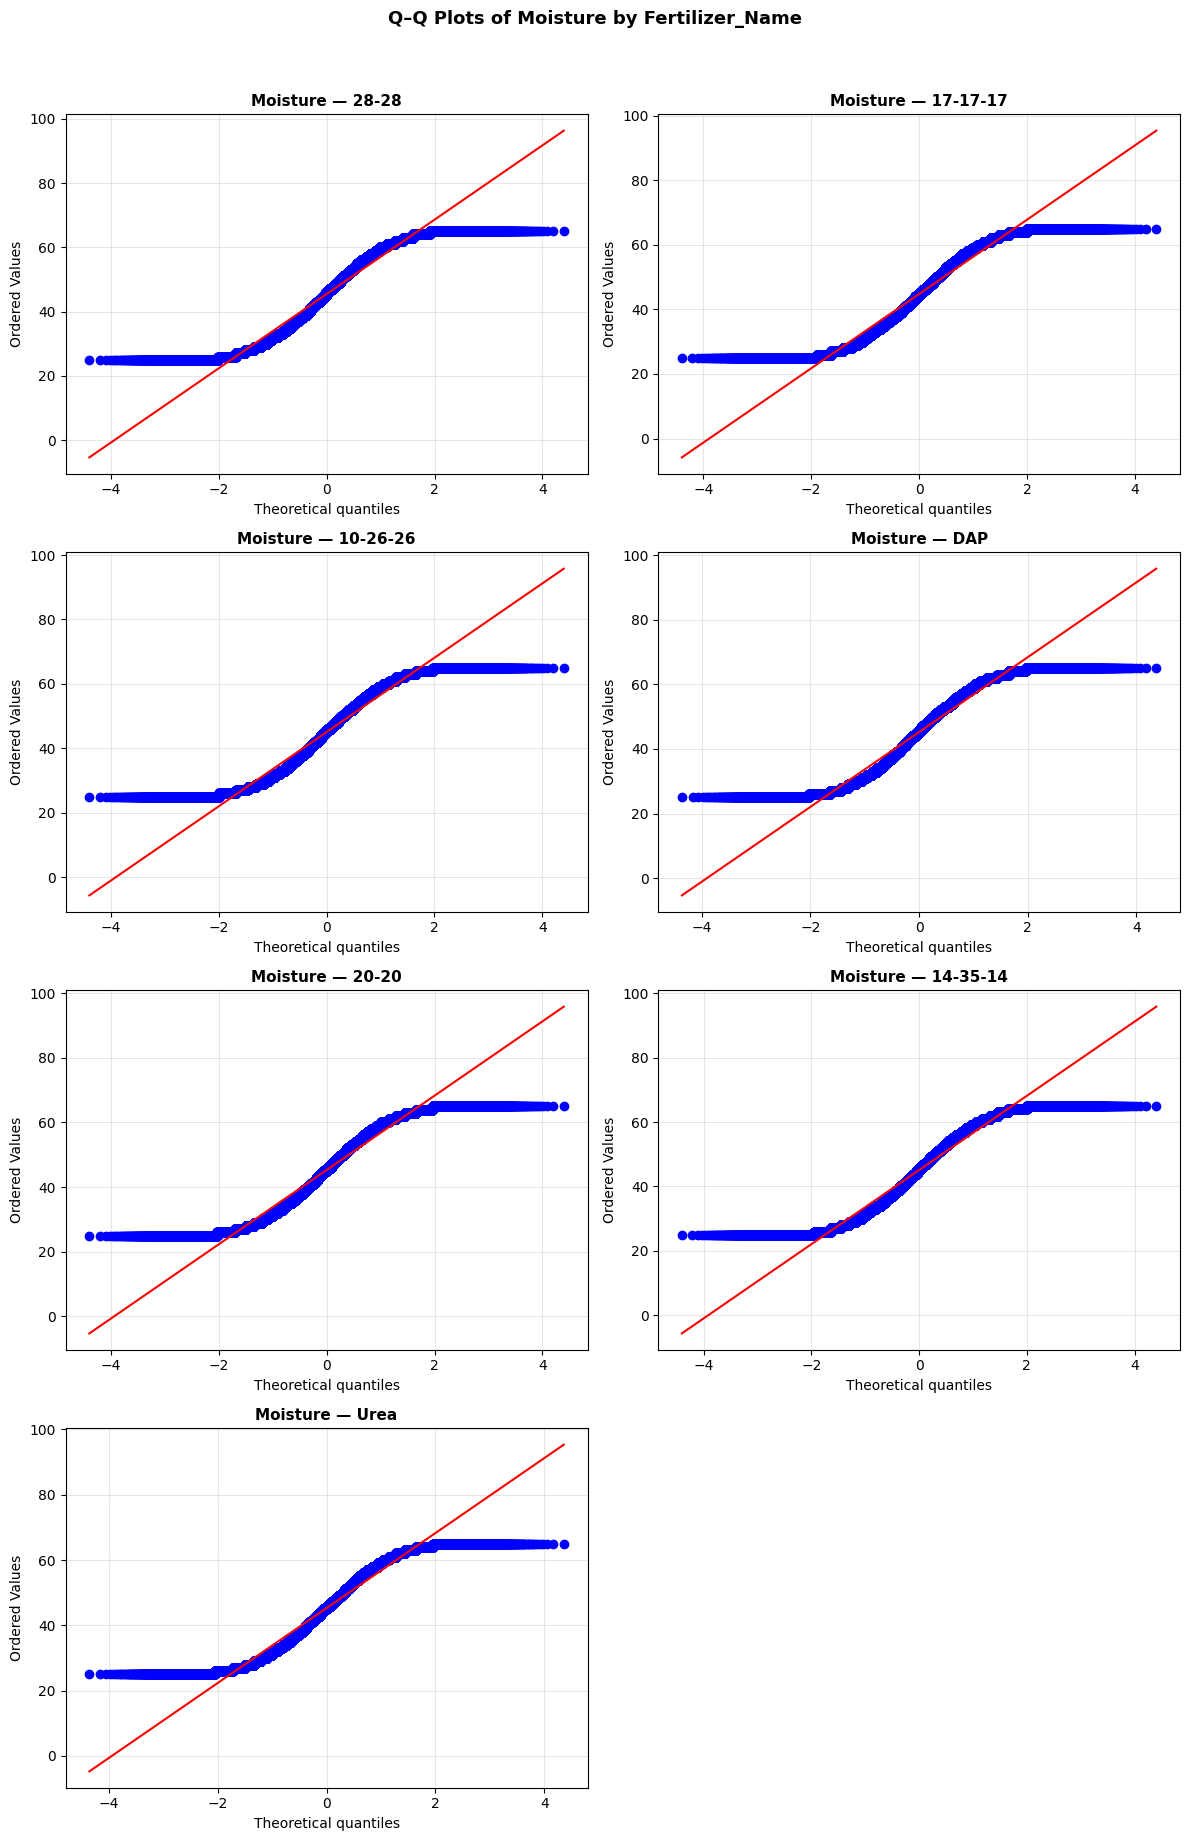


✅ All groups approximately follow normal distribution.



🔍 Interpretation:
   ⚠️ Statistically significant difference, but practically small — ANOVA still acceptable.
   Recommendation → Use Welch’s ANOVA (robust to mild variance differences).

🔍 Welch’s ANOVA Test: Moisture ~ Fertilizer_Name
Testing mean differences under heteroscedasticity assumption...

Welch’s ANOVA Result:
F-statistic = 46.3124,  p-value = 0.000000

✅ Significant difference found (p < 0.05)
➡️ Performing Games–Howell post-hoc test:



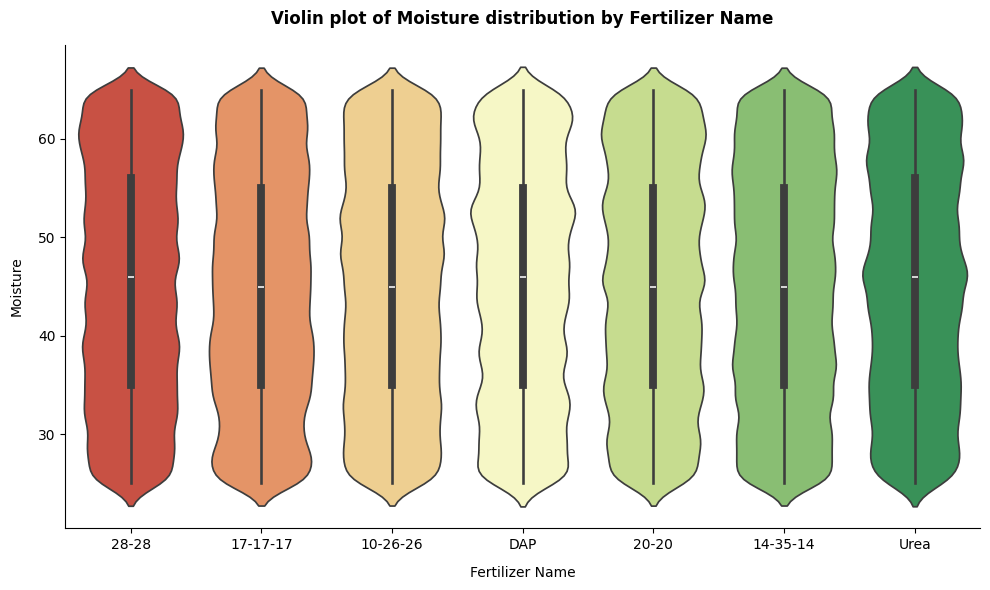


 Checking normality of numeric feature(s) by target feature: 'Fertilizer_Name'

🔹 Feature: Nitrogen


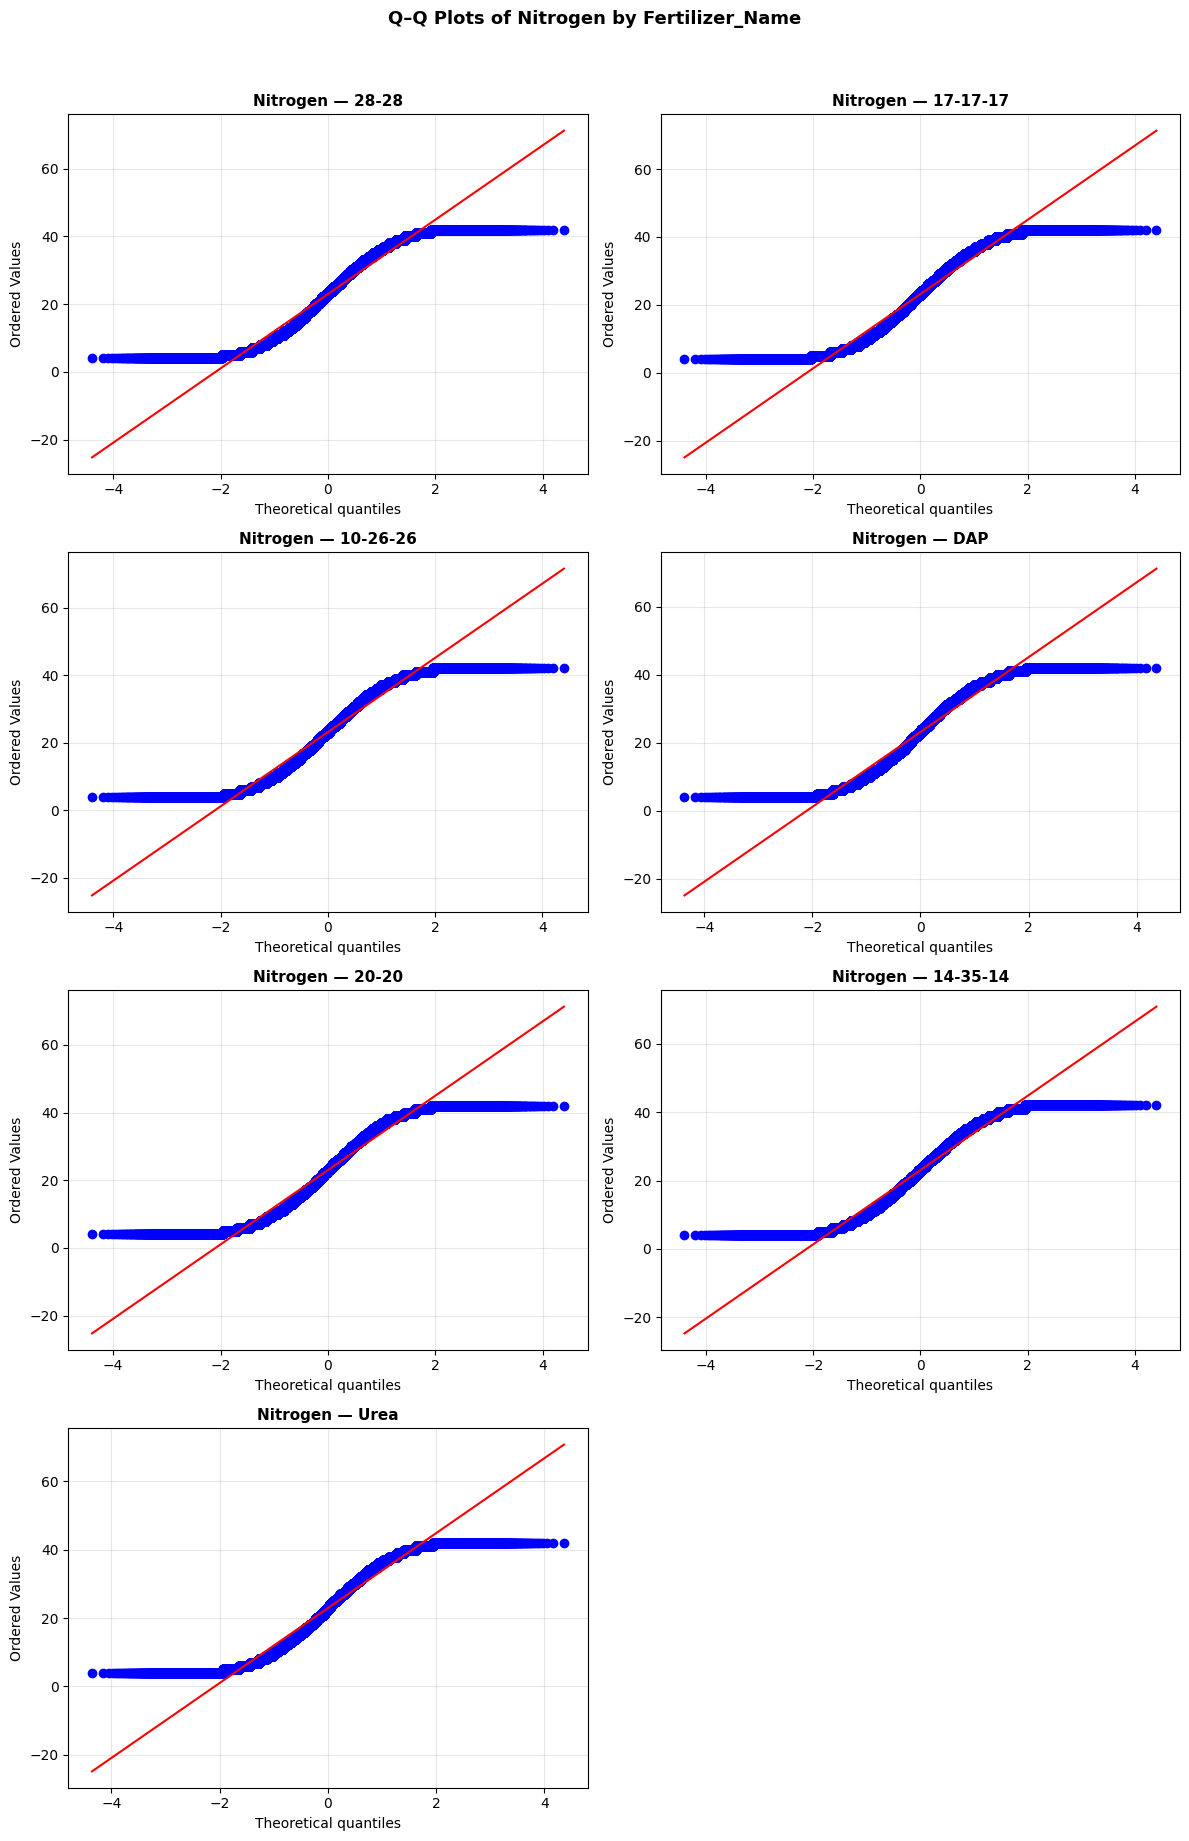


✅ All groups approximately follow normal distribution.



🔍 Interpretation:
   ⚠️ Statistically significant difference, but practically small — ANOVA still acceptable.
   Recommendation → Use Welch’s ANOVA (robust to mild variance differences).

🔍 Welch’s ANOVA Test: Nitrogen ~ Fertilizer_Name
Testing mean differences under heteroscedasticity assumption...

Welch’s ANOVA Result:
F-statistic = 8.5362,  p-value = 0.000000

✅ Significant difference found (p < 0.05)
➡️ Performing Games–Howell post-hoc test:



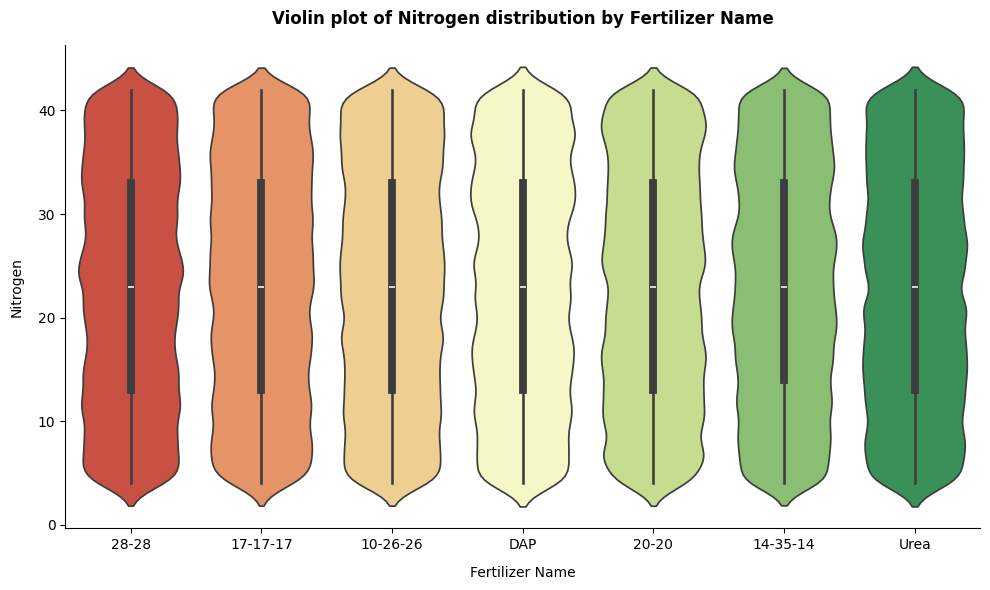


 Checking normality of numeric feature(s) by target feature: 'Fertilizer_Name'

🔹 Feature: Phosphorous


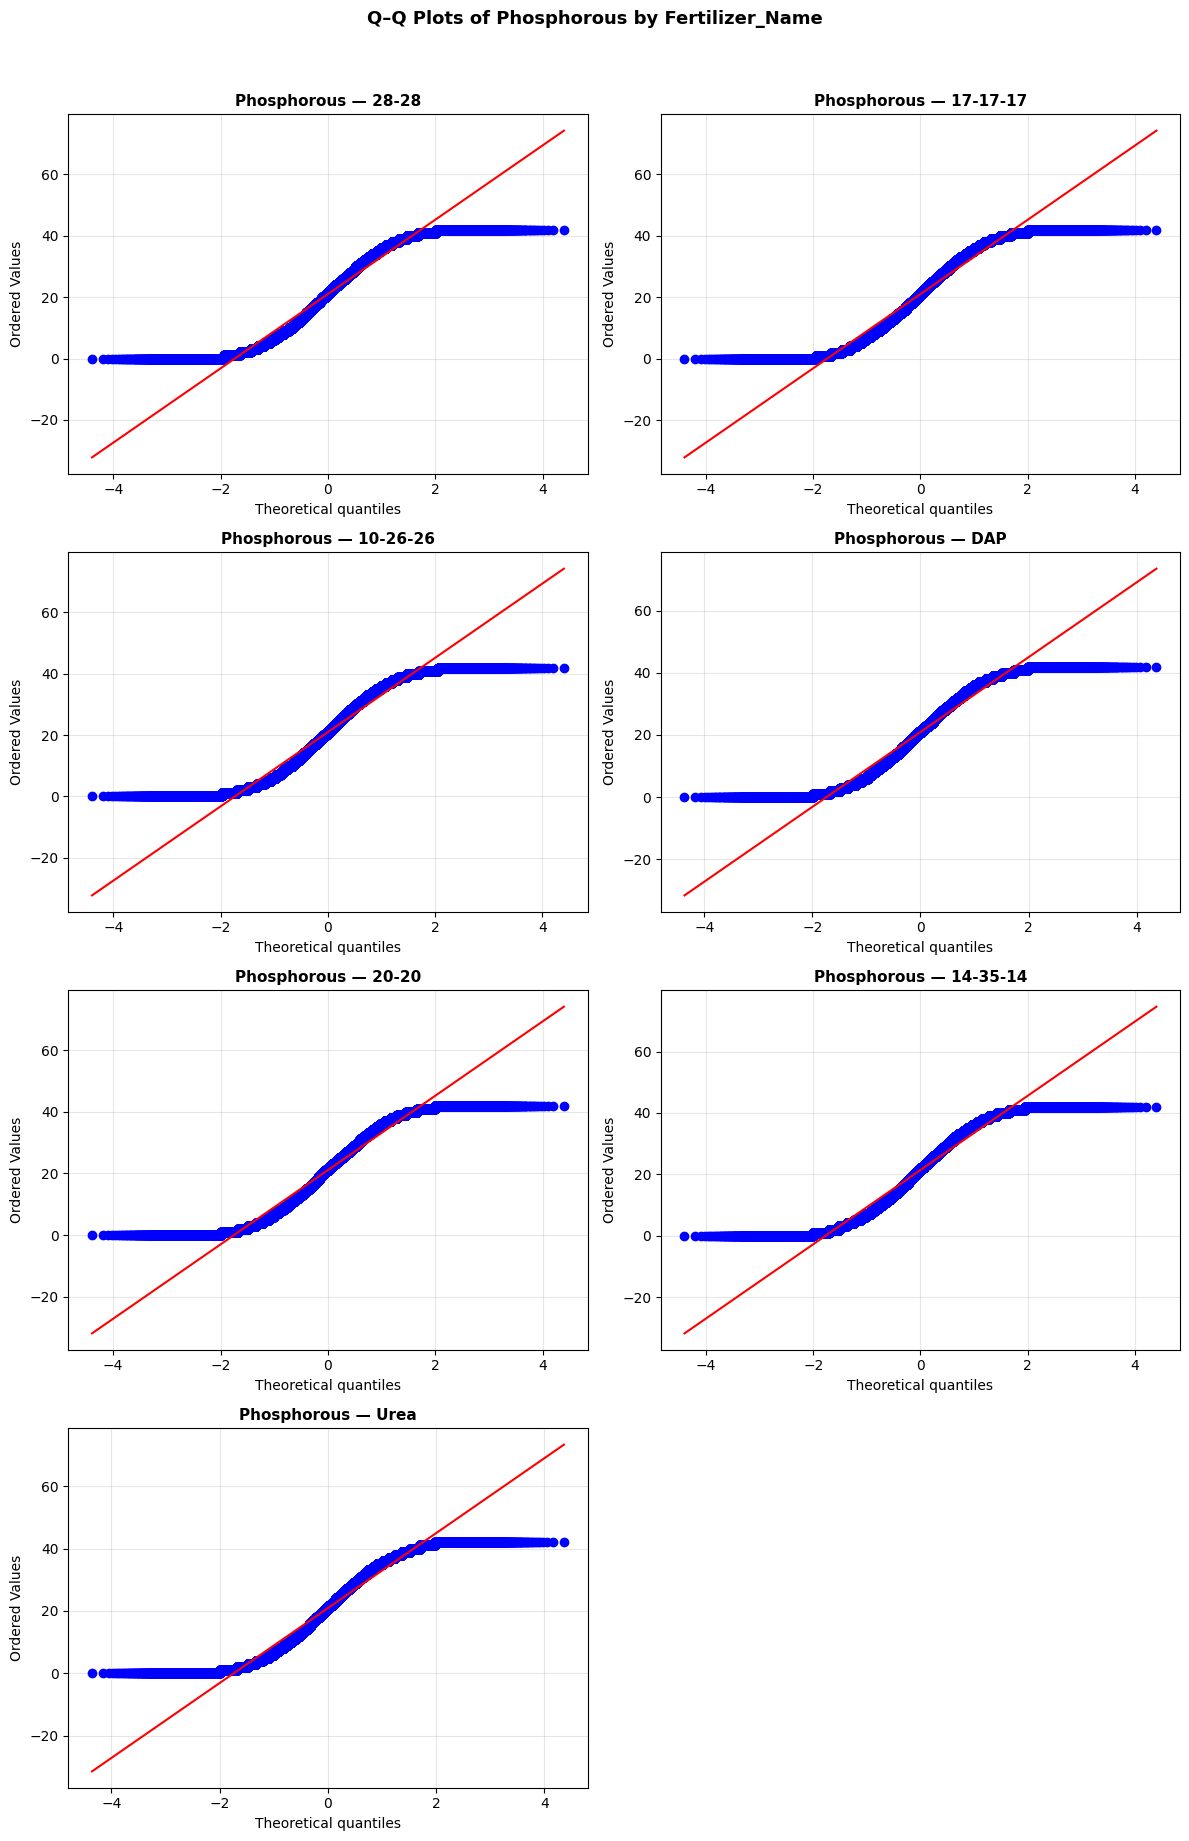


✅ All groups approximately follow normal distribution.



🔍 Interpretation:
   ⚠️ Statistically significant difference, but practically small — ANOVA still acceptable.
   Recommendation → Use Welch’s ANOVA (robust to mild variance differences).

🔍 Welch’s ANOVA Test: Phosphorous ~ Fertilizer_Name
Testing mean differences under heteroscedasticity assumption...

Welch’s ANOVA Result:
F-statistic = 20.0902,  p-value = 0.000000

✅ Significant difference found (p < 0.05)
➡️ Performing Games–Howell post-hoc test:



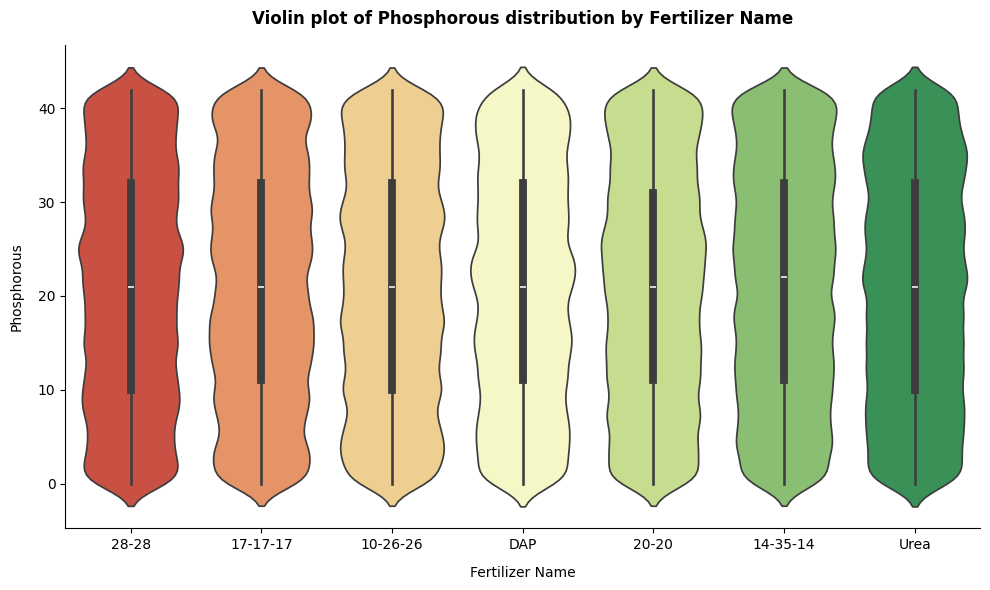


 Checking normality of numeric feature(s) by target feature: 'Fertilizer_Name'

🔹 Feature: Potassium


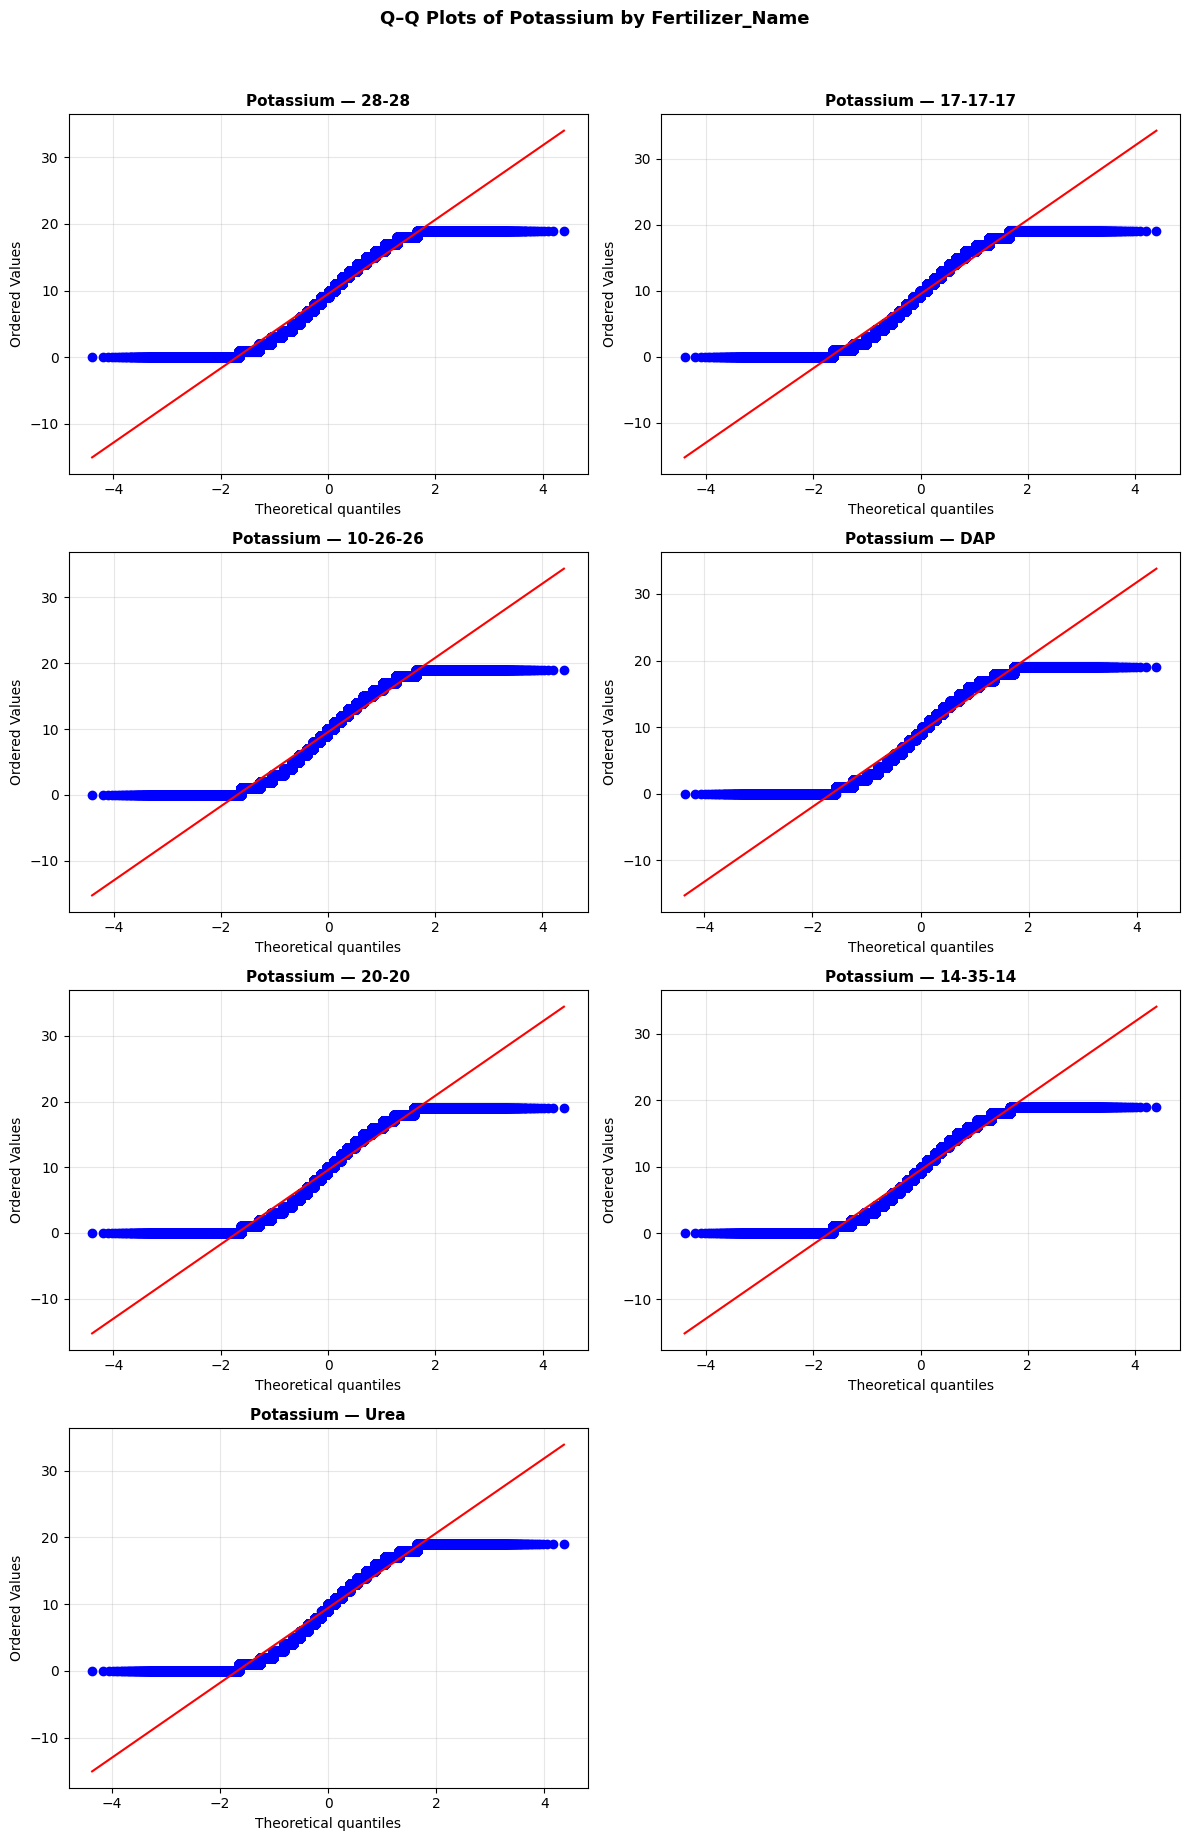


✅ All groups approximately follow normal distribution.



🔍 Interpretation:
   ⚠️ Statistically significant difference, but practically small — ANOVA still acceptable.
   Recommendation → Use Welch’s ANOVA (robust to mild variance differences).

🔍 Welch’s ANOVA Test: Potassium ~ Fertilizer_Name
Testing mean differences under heteroscedasticity assumption...

Welch’s ANOVA Result:
F-statistic = 37.4151,  p-value = 0.000000

✅ Significant difference found (p < 0.05)
➡️ Performing Games–Howell post-hoc test:



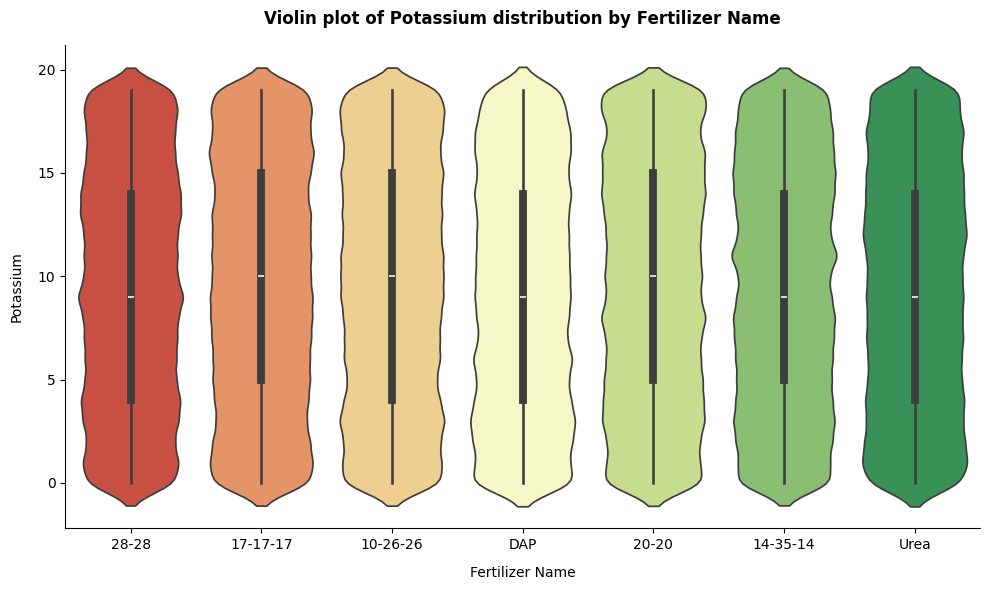

In [66]:
def perform_statical_testing(
    feature: str,
    df_train: pd.DataFrame = df_train_combined,
    target_feature: str = "Fertilizer_Name"
) -> None:
    """
    Perform statistical tests (normality and Kruskal-Wallis) 
    to evaluate whether there are significant differences 
    in the distribution of a numerical feature across categories 
    of the target variable.

    Args:
        feature (str): Name of the numerical feature to be tested.
        df_train (pd.DataFrame): Dataset containing both numerical and target columns.
        target_feature (str): Name of the target categorical feature.

    Returns:
        None: Prints or displays statistical test results.
    """
    # Perform normality test (e.g., Shapiro-Wilk or D’Agostino test) for feature distribution
    non_normal_detected = check_normality_with_plots(df=df_train_combined, feature=feature, target_feature=target_feature)

    # Perform Kruskal-Wallis test/ Anova test
    if non_normal_detected == True:
        perform_kruskal_test(df=df_train, categorical_feature=target_feature,
                            numeric_feature=feature)
    else:
        anove_use, is_homogeneous_variances = check_homogeneity_of_variance(df=df_train_combined, feature=feature,
                                                                            target_feature=target_feature)
        if anove_use and is_homogeneous_variances:
            perform_anova_with_tukey(df=df_train_combined, numeric_feature=feature,
                                    categorical_feature=target_feature)
        elif anove_use and is_homogeneous_variances == False:
            perform_welch_anova(df=df_train_combined, numeric_feature=feature, categorical_feature=target_feature)
        else:
            perform_kruskal_test(df=df_train, categorical_feature=target_feature,
                    numeric_feature=feature)

def plot_numerical_distribution(
    feature: str,
    df_train: pd.DataFrame = df_train_combined,
    target_feature: str = "Fertilizer_Name",
    order: list = None
) -> None:
    """
    Perform statistical testing and visualize the distribution of a numerical feature 
    across different classes of the target variable using violin plots and summary statistics.

    The function executes:
      1. Statistical tests (normality & Kruskal-Wallis).
      2. Summary table with mean, median, std per category.
      3. Violin plot for visualizing feature distributions across classes.

    Args:
        feature (str): The name of the numerical feature to analyze.
        df_train (pd.DataFrame): Input dataframe containing numerical & target features.
        target_feature (str): Target variable name (categorical feature).
        order (list, optional): Custom ordering for category display in the plot.

    Returns:
        None: Displays statistical summaries and plots directly.
    """

    # Compute summary statistics for each Fertilizer category
    df_summary_feature = (
        df_train.groupby(by=target_feature, as_index=False)
        .agg(
            Count=(feature, "count"),
            Mean=(feature, "mean"),
            Median=(feature, "median"),
            Std=(feature, "std")
        )
        .sort_values(by="Mean", ascending=False)
    )

    # Compute global statistics for the entire feature
    summary_data = [
        ("Overall Mean", f"{df_train[feature].mean():.2f}"),
        ("Overall Median", f"{df_train[feature].median()}"),
        ("Overall Std", f"{df_train[feature].std():.2f}")
    ]

    # Display overall statistics in HTML format for better notebook visualization
    summary_html = "<ul>" + "".join([
        f"<li><b>{k}:</b> {v}</li>" for k, v in summary_data
    ]) + "</ul>"
    display(HTML(summary_html))

    # Display detailed summary per category as styled dataframe
    display(
        df_summary_feature.style.background_gradient(cmap=cm)
        .set_table_attributes('style="width:75%; margin:auto;"')
    )

    # Run statistical significance testing
    perform_statical_testing(feature=feature, target_feature=target_feature)

    # Visualize distribution via violin plot
    plt.figure(figsize=(10, 6))
    sns.violinplot(x=target_feature, y=feature, data=df_train, order=order,
                   palette=color(n_colors=df_train[target_feature].nunique()))
    
    plt.title(f"Violin plot of {feature} distribution by Fertilizer Name", pad=15, weight="bold")
    plt.xlabel("Fertilizer Name", labelpad=10)
    plt.ylabel(feature, labelpad=10)
    plt.legend().remove()
    sns.despine(left=False, bottom=False)
    plt.tight_layout()
    plt.show()

for feature in num_features:
    display(HTML(f"<h2 style='text-align:center; font-size:22px; color:green;'><b>Distribution of {feature} by Fertilizer Name</b></h2>"))
    plot_numerical_distribution(feature=feature, df_train = df_train_combined)

### Insight Numerical Features vs Subscription

`Temparature`

Temperature is **not meaningfully influenced** by fertilizer type — variations are statistically detectable but practically insignificant.

`Humidity`

Humidity shows **minor statistical variation** among fertilizers, but differences are **too small to be practically meaningful** — overall, humidity is **consistent across fertilizer types**.

`Moisture`

Although the test detects small statistical differences, **Moisture content is effectively uniform** across fertilizer groups — no meaningful practical variation observed.

`Nitrogen`

Fertilizer type shows **minor statistical differences** in nitrogen levels, but these differences are **not practically meaningful** — nitrogen distribution remains **nearly uniform** across fertilizers.

`Phosphorous`

Although statistical tests indicate small differences among fertilizer groups, **phosphorous content remains nearly identical** across all fertilizer types — variation is **statistically significant but practically negligible**.

`Potassium`

Fertilizer type slightly affects potassium concentration in a statistical sense, but the practical difference is negligible — distributions remain nearly identical across all groups.

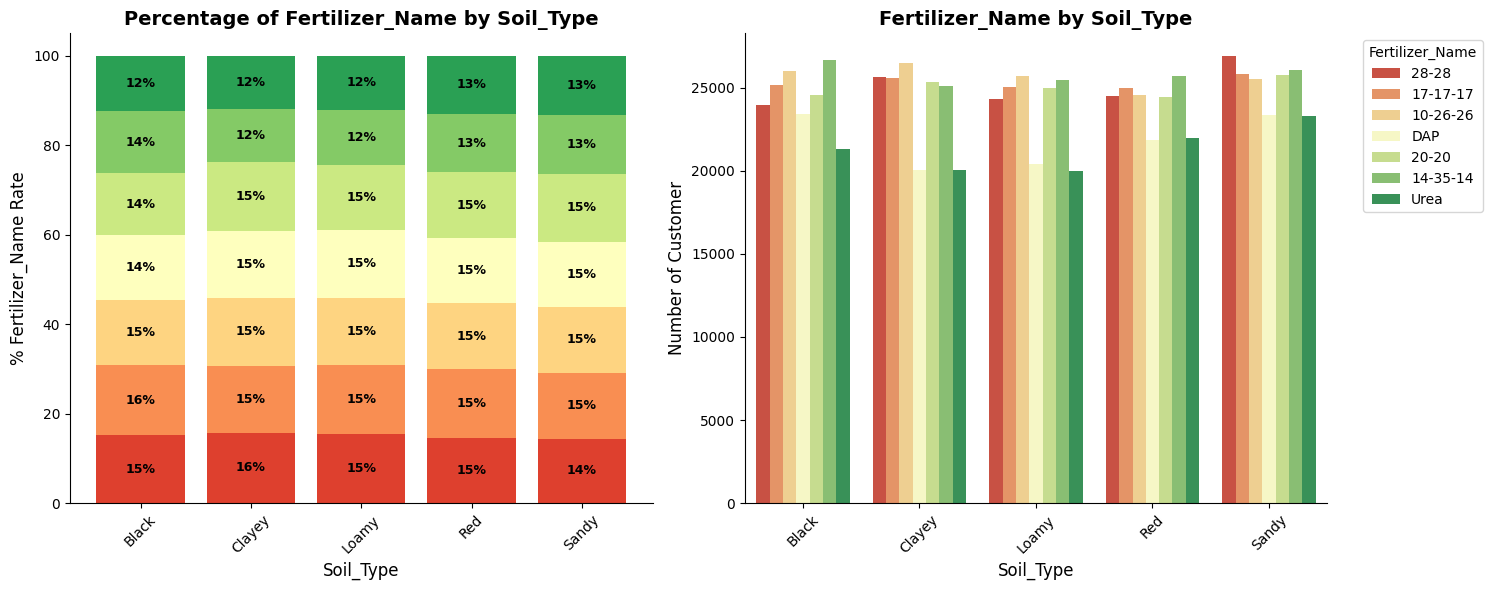


🔍 Chi-Square Test of Independence: 'Soil_Type' vs. 'Fertilizer_Name'
Chi-squared statistic: 851.097
Degrees of freedom: 24
p-value: 0.000000
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'Soil_Type' and 'Fertilizer_Name'.

📈 Standardized Residuals:
Fertilizer_Name  10-26-26  14-35-14  17-17-17  20-20  28-28    DAP  Urea
Soil_Type                                                               
Black                1.21      4.30     -2.06  -3.94  -7.96   9.91 -0.93
Clayey               6.98     -2.80      3.32   3.72   5.19 -10.49 -7.24
Loamy                4.16      1.97      2.19   3.67  -0.91  -6.16 -5.88
Red                 -5.13      1.26     -0.21  -1.82  -1.64   2.02  6.17
Sandy               -7.02     -4.64     -3.13  -1.54   5.24   4.49  7.67


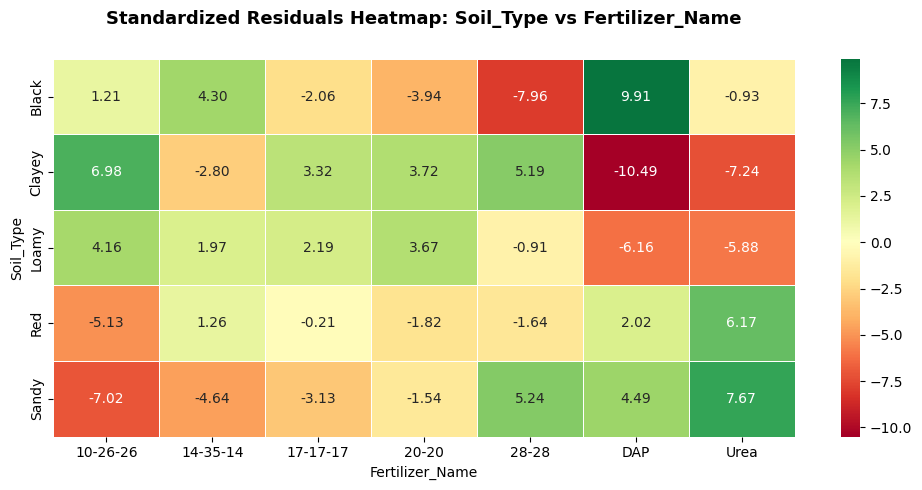

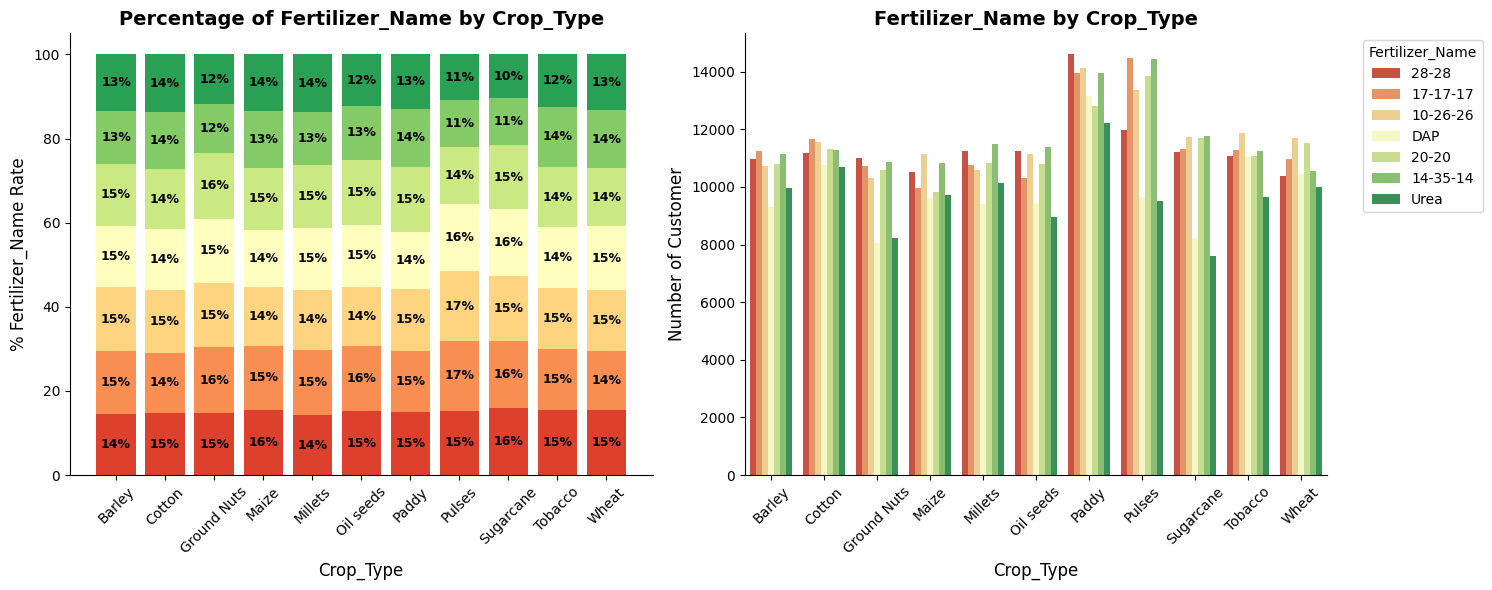


🔍 Chi-Square Test of Independence: 'Crop_Type' vs. 'Fertilizer_Name'
Chi-squared statistic: 2898.447
Degrees of freedom: 60
p-value: 0.000000
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'Crop_Type' and 'Fertilizer_Name'.

📈 Standardized Residuals:
Fertilizer_Name  10-26-26  14-35-14  17-17-17  20-20  28-28    DAP   Urea
Crop_Type                                                                
Barley              -4.23     -1.04      1.95  -1.19   0.36  -2.26   6.85
Cotton              -2.66     -5.71     -0.12  -2.06  -3.72   6.87   8.66
Ground Nuts         -2.03      2.78      3.06   2.96   7.06  -9.36  -5.57
Maize                3.18     -0.18     -6.87  -6.82  -0.44   4.35   7.66
Millets             -6.11      1.78     -3.03  -1.16   2.48  -1.58   8.22
Oil seeds            0.93      2.55     -5.86   0.21   4.11   0.24  -2.35
Paddy               -1.53     -3.61     -1.37  -9.69   5.11   9.04   2.95
Pulses               1.71    

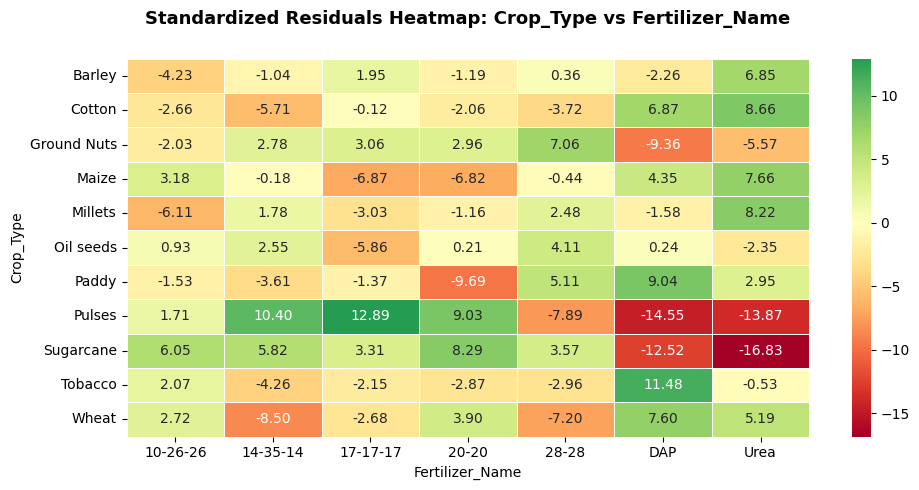

In [67]:
def bivariate_percent_plot(cat, target_feature, df, figsize=(15, 6), order=None):
    display(HTML(f"<h2 style='text-align:center; font-size:22px; color:green;'><b>Distribution of {cat} by {target_feature}</b></h2>"))
    fig, ax = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=figsize)

    # === Data processing ===
    grouped = df.groupby([cat, target_feature]).size().unstack(fill_value=0)
    percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100
    if order is not None:
        percentages = percentages.loc[order]
        labels = order
    else:
        labels = percentages.index

    # === Use the same color palette as right chart ===
    palette = color(n_colors=df[target_feature].nunique())

    # Convert palette to dict for stacked bar color mapping
    color_map = dict(zip(percentages.columns, palette))

    # === Plot 1: Stacked bar chart (percentage) ===
    bottom = np.zeros(len(percentages))
    for fert in percentages.columns:
        ax[0].bar(percentages.index, percentages[fert], bottom=bottom, label=fert, color=color_map[fert])
        bottom += percentages[fert].values

    # Add percentage labels
    for container in ax[0].containers:
        ax[0].bar_label(container, fmt="%1.0f%%", label_type="center", fontsize=9, color="black", weight="bold")

    ax[0].set_title(f"Percentage of {target_feature} by {cat}", fontsize=14, weight="bold")
    ax[0].set_xlabel(f"{cat}", fontsize=12)
    ax[0].set_ylabel(f"% {target_feature} Rate", fontsize=12)
    ax[0].set_xticklabels(labels=labels, rotation=45)
    sns.despine(left=False, bottom=False, ax=ax[0])
    ax[0].legend().remove()

    # === Plot 2: Count plot ===
    sns.countplot(data=df, hue=target_feature, x=cat, palette=palette, ax=ax[1], order=labels)
    ax[1].set_title(f"{target_feature} by {cat}", fontsize=14, weight="bold")
    ax[1].set_xlabel(f"{cat}", fontsize=12)
    ax[1].set_ylabel("Number of Customer", fontsize=12)
    ax[1].legend(title=target_feature, bbox_to_anchor=(1.05, 1), loc="upper left")
    ax[1].set_xticklabels(labels=ax[1].get_xticklabels(), rotation=45)
    sns.despine(left=False, bottom=False, ax=ax[1])
    plt.tight_layout()
    plt.show()

    cal_ChiSquare(cat_feature=cat, target_feature=target_feature, df=df, show_residuals=True)

for feature in cat_features:
    bivariate_percent_plot(cat=feature, target_feature= "Fertilizer_Name",df= df_train_combined)

`Soil_Type`

* **DAP and Urea** show strong **preference in lighter soils** (Black, Sandy and Red).
* **Compound fertilizers** like **10-26-26, 17-17-17, and 20-20** are more common in **clayey soils**.
  → This suggests that **farmers choose fertilizers based on soil type**, rather than randomly.

`Crop_Type`

* **Urea and DAP** are favored for **Barley, Cotton, Maize, Millets, and Wheat**.
* **Pulses** favor **balanced fertilizers (14-35-14, 17-17-17, 20-20)** rather than nitrogen-heavy ones.
* **Sugarcane** and **Pulses** both **avoid DAP and Urea**, showing distinct nutrient preferences.
* Fertilizer choice clearly depends on **crop nutrient needs**, not random selection.

### Overall Picture

| Feature         | Type        | Statistical Test Used           | Relationship with Fertilizer       | Summary                                                                                                                                                                                                                    |
| --------------- | ----------- | ------------------------------- | ---------------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Temparature** | Numerical   | Welch’s ANOVA + Games–Howell    | Weak / Not Practically Significant | Statistically detectable differences exist across fertilizers, but **mean temperature remains nearly identical** across groups — **no practical variation**.                                                               |
| **Humidity**    | Numerical   | Welch’s ANOVA + Games–Howell    | Weak / Not Practically Significant | Minor statistical differences found, but **humidity is effectively consistent** across fertilizer types — variation is **negligible** in practical terms.                                                                  |
| **Moisture**    | Numerical   | Welch’s ANOVA + Games–Howell    | Weak / Not Practically Significant | While statistically significant, **moisture content is uniform** across fertilizer groups — showing **no meaningful difference**.                                                                                          |
| **Nitrogen**    | Numerical   | Welch’s ANOVA + Games–Howell    | Weak / Not Practically Significant | Fertilizer type causes **slight statistical variation** in nitrogen levels, but differences are **too small to matter practically**.                                                                                       |
| **Phosphorous** | Numerical   | Welch’s ANOVA + Games–Howell    | Weak / Not Practically Significant | Differences are **statistically significant but practically negligible** — **phosphorous content** is nearly identical across fertilizer types.                                                                            |
| **Potassium**   | Numerical   | Welch’s ANOVA + Games–Howell    | Weak / Not Practically Significant | Fertilizer type shows **minor influence** on potassium concentration, but **practical effect size is negligible** — **distributions overlap almost completely**.                                                           |
| **Soil_Type**   | Categorical | Chi-Square Test of Independence | Strong Association                 | **DAP and Urea** are preferred in **lighter soils (Black, Red, Sandy)**, while **compound fertilizers (10-26-26, 17-17-17, 20-20)** dominate **clayey soils**. Indicates **fertilizer choice depends on soil properties**. |
| **Crop_Type**   | Categorical | Chi-Square Test of Independence | Strong Association                 | Fertilizer choice **varies clearly by crop type** — **Urea/DAP** favored for **Barley, Cotton, Maize, Wheat**, while **balanced fertilizers (14-35-14, 17-17-17, 20-20)** suit **Pulses** and **Sugarcane**.               |


<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Preprocessing</span>

<div style="
    border-radius: 15px;
    border: 2px solid #2e7d32;
    padding: 20px;
    background: linear-gradient(125deg, #1b5e20 5%, #43a047 40%, #81c784 75%, #c8e6c9 100%);
    text-align: center;
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);
        font-weight: bold;
        margin-bottom: 10px;
        font-size: 36px;
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Preprocessing
    </h1>
</div>

## Create Test Set

Suppose we chatted with experts who told us that the **Soil_Type** is a very important attribute to predict **Fertilizer_Name**. We may want to ensure that the test set is representative of the various categories of **Soil_Type** in the whole dataset.

In [2]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_train_combined["Fertilizer_Name"] = le.fit_transform(df_train_combined["Fertilizer_Name"])

label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("🔹 Fertilizer_Name → Fertilizer_Label mapping:")
for name, code in label_mapping.items():
    print(f"{name:>10}  →  {code}")

NameError: name 'df_train_combined' is not defined

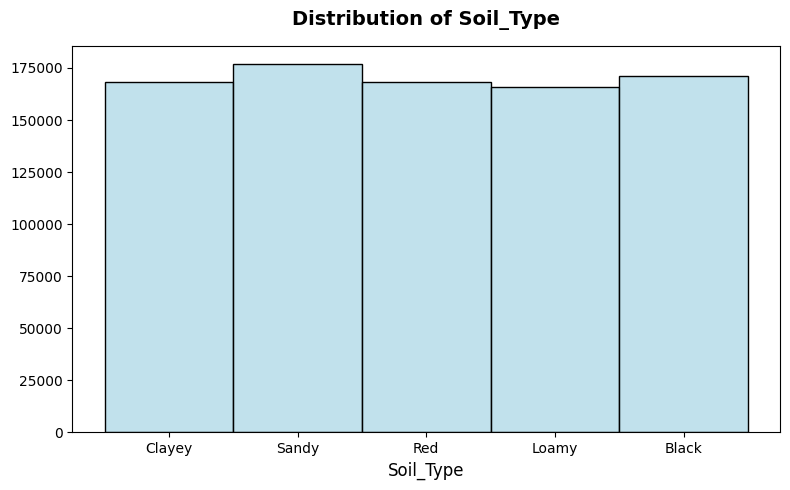

In [69]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df_train_combined, x="Soil_Type", color="lightblue", edgecolor="black")

plt.title("Distribution of Soil_Type", fontsize=14, pad=15, weight="bold")
plt.xlabel("Soil_Type", fontsize=12)
plt.ylabel("")
plt.tight_layout()
plt.show()

In [70]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, val_index in split.split(df_train_combined, df_train_combined["Soil_Type"]):
    start_train_set = df_train_combined.iloc[train_index]
    start_val_set = df_train_combined.iloc[val_index]

In [71]:
df_train_new = start_train_set.drop("Fertilizer_Name", axis=1)
df_train_label_new = start_train_set["Fertilizer_Name"].copy()

## Scale and Encode

In [72]:
num_stand_transformer = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("imputer", SimpleImputer(strategy="median"))
])

cat_onehot_transformer = Pipeline(steps=[
    ("encoder", OneHotEncoder(handle_unknown="ignore")),
    ("imputer", SimpleImputer(strategy="most_frequent"))
])

preprocessor = ColumnTransformer(transformers=[
    ("num_standard", num_stand_transformer, num_features),
    ("cat_onehot", cat_onehot_transformer, cat_features)
])

preprocessor.fit(df_train_new)

df_train_new_prepared = preprocessor.transform(df_train_new)
list_feature_prepared = preprocessor.get_feature_names_out().tolist()
clean_features = [col.replace("num_standard__", "").replace("cat_onehot__", "") for col in list_feature_prepared]
clean_features

['Temparature',
 'Humidity',
 'Moisture',
 'Nitrogen',
 'Phosphorous',
 'Potassium',
 'Soil_Type_Black',
 'Soil_Type_Clayey',
 'Soil_Type_Loamy',
 'Soil_Type_Red',
 'Soil_Type_Sandy',
 'Crop_Type_Barley',
 'Crop_Type_Cotton',
 'Crop_Type_Ground Nuts',
 'Crop_Type_Maize',
 'Crop_Type_Millets',
 'Crop_Type_Oil seeds',
 'Crop_Type_Paddy',
 'Crop_Type_Pulses',
 'Crop_Type_Sugarcane',
 'Crop_Type_Tobacco',
 'Crop_Type_Wheat']

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Define Metric</span>

<div style="
    border-radius: 15px;
    border: 2px solid #2e7d32;
    padding: 20px;
    background: linear-gradient(125deg, #1b5e20 5%, #43a047 40%, #81c784 75%, #c8e6c9 100%);
    text-align: center;
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);
        font-weight: bold;
        margin-bottom: 10px;
        font-size: 36px;
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Define Metric
    </h1>
</div>

**Evaluation Metric: Mean Average Precision at 3 (MAP\@3)**

In this competition, model performance is evaluated using the **Mean Average Precision at 3** (**MAP@3**) metric. This metric rewards models that correctly predict the fertilizer type and rank it as highly as possible among the top three predictions for each test sample.

**What is MAP\@3?**

**MAP@3** measures how well the top three predicted fertilizer names match the true fertilizer for each test instance. The score is higher if the correct fertilizer appears earlier in the list of predictions.

**Mathematical Definition**

The general formula for Mean Average Precision at K (MAP\@K) is:

$$
\text{MAP@K} = \frac{1}{U} \sum_{u=1}^{U} \sum_{k=1}^{\min(n, K)} P(k) \times \text{rel}(k)
$$

Where:

* $U$: total number of test samples
* $n$: number of predictions per sample (up to 3)
* $P(k)$: precision at rank $k$, defined as the number of correct items in the top $k$ predictions divided by $k$
* $\text{rel}(k)$: an indicator function, 1 if the prediction at rank $k$ is correct, 0 otherwise

For this competition, **K = 3**.


**How MAP\@3 Works**

* For each test sample, model can predict **up to 3 fertilizer names**, ranked by confidence.
* If the correct fertilizer is **1st prediction**, the score is **1.0**.
* If it's the **2nd**, the score is **0.5**.
* If it's the **3rd**, the score is **0.333...**.
* If the correct fertilizer isn’t in the top 3, the score is **0.0**.
* The **MAP\@3 score** is the average of these individual scores over all test samples.

**Example**

Suppose the true fertilizer is `"Urea"`:

| Predictions          | AP\@3 Score |
| -------------------- | ----------- |
| `Urea 14-35-14 DAP`  | 1.0         |
| `14-35-14 Urea DAP`  | 0.5         |
| `14-35-14 DAP Urea`  | 0.333       |
| `14-35-14 DAP 20-20` | 0.0         |

**Why MAP\@3?**

MAP\@3 is especially useful in real-world recommendation systems like this one, where multiple options can be suggested, but ranking the correct one near the top is critical. In agriculture, suggesting the right fertilizer within the top three helps support better decision-making and crop outcomes, even if the top prediction isn't always perfect.

**References:**

* [Kaggle S5E6 Evaluation Page](https://www.kaggle.com/competitions/playground-series-s5e6/overview/evaluation)


In [73]:
def apk(actual, predicted, k=3):
    if len(predicted) > k:
        predicted = predicted[:k]
    score, num_hits = 0.0, 0.0
    for i, p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i + 1.0)
    if not actual:
        return 0.0
    return score / min(len(actual), k)


def mapk(actual_list, predicted_list, k=3):
    return np.mean([apk(a, p, k) for a, p in zip(actual_list, predicted_list)])


def map3_score_func(y_true, y_pred_proba):
    top3 = np.argsort(y_pred_proba, axis=1)[:, -3:][:, ::-1]
    actual_list = [[a] for a in y_true]  # ✅ fix here
    return mapk(actual_list, [list(p) for p in top3], k=3)

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Modeling</span>

<div style="
    border-radius: 15px;
    border: 2px solid #2e7d32;
    padding: 20px;
    background: linear-gradient(125deg, #1b5e20 5%, #43a047 40%, #81c784 75%, #c8e6c9 100%);
    text-align: center;
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);
        font-weight: bold;
        margin-bottom: 10px;
        font-size: 36px;
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Modeling
    </h1>
</div>

## XGBClassifier

In [74]:
best_params = {
    "max_depth": 7,
    "learning_rate": 0.05635134330984224,
    "subsample": 0.5605235929333594,
    "colsample_bytree": 0.5594578346445631,
    "min_child_weight": 6,
    "gamma": 0.35819323772520817,
    "reg_alpha": 0.9747714669120731,
    "reg_lambda": 0.7061465594372847,
    "objective": "multi:softprob",
    "num_class": 7,
    "eval_metric": "mlogloss",
    "tree_method": "gpu_hist",
    "verbosity": 0,
    "n_estimators": 2477,
    "n_jobs": -1,
    "random_state": 42,
    "use_label_encoder": False    
}

### Cross-Validation Training with OOF & Test Predictions

In [76]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer
from xgboost import XGBClassifier
# Anda harus mendefinisikan map3_score_func di tempat lain

# =============================
#  DEBUGGING best_params
# =============================
# Perbaiki parameter GPU menjadi CPU (jika ada)
if 'tree_method' in best_params and 'gpu' in best_params['tree_method']:
    best_params['tree_method'] = 'hist' # Menggunakan metode CPU tercepat
    
if 'predictor' in best_params and 'gpu' in best_params['predictor']:
     best_params['predictor'] = 'cpu_predictor' # Memastikan penggunaan CPU predictor

# =============================
#  DATA & MODEL
# =============================
model = XGBClassifier(**best_params)

# =============================
#  CROSS-VALIDATION SETUP
# =============================
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# =============================
#  METRIC (LogLoss or MAP@k)
# =============================
# Asumsi map3_score_func sudah didefinisikan dan diimpor.
map3_scorer = make_scorer(map3_score_func, greater_is_better=True, needs_proba=True)

# =============================
#  RUN CROSS-VALIDATION
# =============================
scores = cross_val_score(
    model,
    df_train_new_prepared,
    df_train_label_new,
    scoring=map3_scorer,
    cv=cv,
    n_jobs=-1
)

print("MAP@3 per fold:", scores)
print("Mean MAP@3:", np.mean(scores))

MAP@3 per fold: [nan nan nan nan nan]
Mean MAP@3: nan


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# --- A. RENAME KOLOM SECARA GLOBAL ---
# Mengubah spasi menjadi underscore untuk konsistensi
for df in [df_train, df_origin, df_test]:
    if 'Soil Type' in df.columns:
        df.rename(columns={'Soil Type': 'Soil_Type'}, inplace=True)
    if 'Crop Type' in df.columns:
        df.rename(columns={'Crop Type': 'Crop_Type'}, inplace=True)
    if 'Fertilizer Name' in df.columns:
        df.rename(columns={'Fertilizer Name': 'Fertilizer_Name'}, inplace=True)

# --- B. SPLIT DATA TRAINING & VALIDATION ---
# Menggunakan Fertilizer_Name untuk stratifikasi (lebih optimal)
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, val_index in split.split(df_train_combined, df_train_combined["Fertilizer_Name"]):
    start_train_set = df_train_combined.iloc[train_index]
    start_val_set = df_train_combined.iloc[val_index]

# Pisahkan Fitur (X) dan Label (y)
df_train_new = start_train_set.drop("Fertilizer_Name", axis=1)
df_train_label_new = start_train_set["Fertilizer_Name"].copy()

# Pisahkan Fitur dan Label Validation Set (untuk evaluasi akhir jika diperlukan)
# df_val_new = start_val_set.drop("Fertilizer_Name", axis=1)
# df_val_label_new = start_val_set["Fertilizer_Name"].copy()


# --- C. DEFINISI FEATURE ---
num_features = ['id', 'Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']
cat_features = ['Soil_Type', 'Crop_Type'] 
# Catatan: Kolom 'id' disertakan di num_features karena numerik.

# --- D. DEFINISI PIPELINE (Imputer sebelum Scaler/Encoder) ---

num_stand_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_onehot_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")), 
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor = ColumnTransformer(transformers=[
    ("num_standard", num_stand_transformer, num_features),
    ("cat_onehot", cat_onehot_transformer, cat_features)
])

# Melatih preprocessor (Hanya pada data train)
preprocessor.fit(df_train_new)

# Transformasi data train
# df_train_new_prepared akan berbentuk NumPy array
df_train_new_prepared = preprocessor.transform(df_train_new)

# Mendapatkan nama fitur yang disiapkan (optional, untuk debugging)
list_feature_prepared = preprocessor.get_feature_names_out().tolist()
clean_features = [col.replace("num_standard__", "").replace("cat_onehot__", "") for col in list_feature_prepared]


# --- E. ENCODING LABEL TARGET (y) ---
# XGBoost memerlukan label target yang berupa integer (0, 1, 2, ...)
le = LabelEncoder()
df_train_label_encoded = le.fit_transform(df_train_label_new)

NameError: name 'df_train' is not defined

In [79]:
# Pisahkan Fitur (X) dan Label (y) dari Validation Set
X_val = start_val_set.drop("Fertilizer_Name", axis=1)
y_val = start_val_set["Fertilizer_Name"].copy()

# Transformasi Validation Set menggunakan preprocessor yang TELAH DILATIH
# Anda menggunakan preprocessor.transform(), BUKAN preprocessor.fit_transform(). INI SANGAT BENAR.
X_val_prepared = preprocessor.transform(X_val)

# Encoding Label Validation Set (WAJIB dilakukan agar y_val cocok dengan output model)
y_val_encoded = le.transform(y_val)

In [80]:
# Train final model on full training data
model.fit(df_train_new_prepared, df_train_label_new)

# Predict on validation set
val_pred_proba = model.predict_proba(X_val_prepared)

# Get top-3 class index
top3 = np.argsort(val_pred_proba, axis=1)[:, -3:][:, ::-1]

# MAP@3
val_map3 = mapk([[t] for t in y_val], [list(p) for p in top3], k=3)
print(f"Validation MAP@3: {val_map3:.4f}")

Validation MAP@3: 0.3463


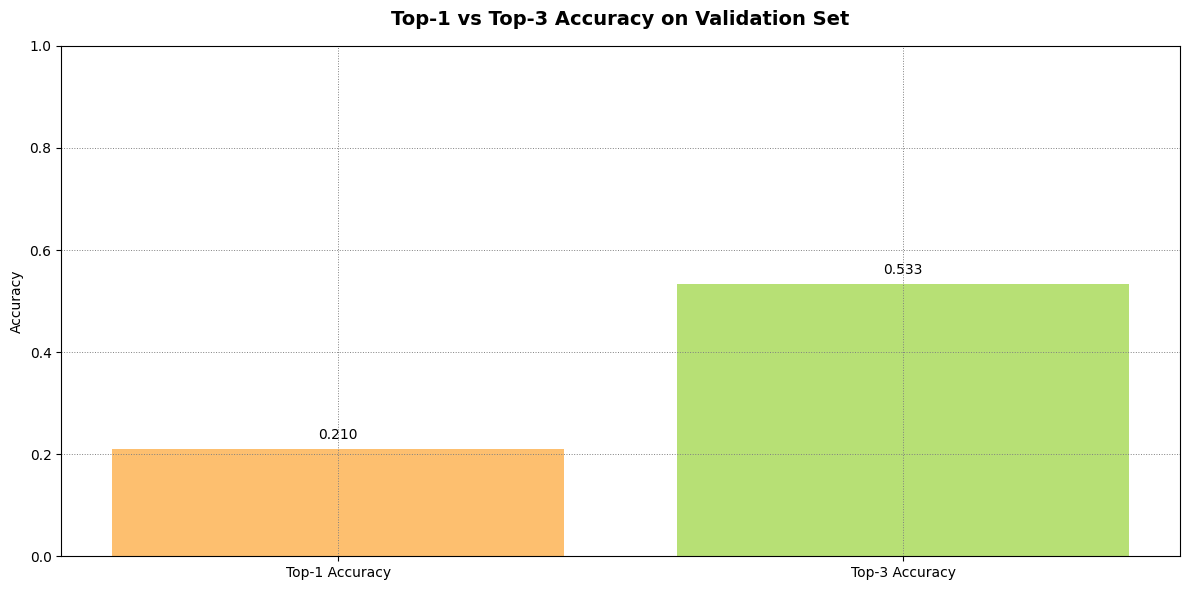

In [81]:
correct_top3 = [1 if t in p else 0 for t, p in zip(y_val, top3)]
accuracy_top1 = np.mean(np.argmax(val_pred_proba, axis=1) == y_val)
accuracy_top3 = np.mean(correct_top3)

plt.figure(figsize=(12, 6))
plt.bar(["Top-1 Accuracy", "Top-3 Accuracy"],
        [accuracy_top1, accuracy_top3],
        color=color(n_colors=2))
plt.title("Top-1 vs Top-3 Accuracy on Validation Set", weight="bold", pad=15, fontsize=14)
plt.ylim(0, 1)
plt.ylabel("Accuracy")
for i, v in enumerate([accuracy_top1, accuracy_top3]):
    plt.text(i, v + 0.02, f"{v:.3f}", ha='center', fontsize=10)
plt.grid(color="gray", linestyle=":", linewidth=0.7)
plt.tight_layout()
plt.show()

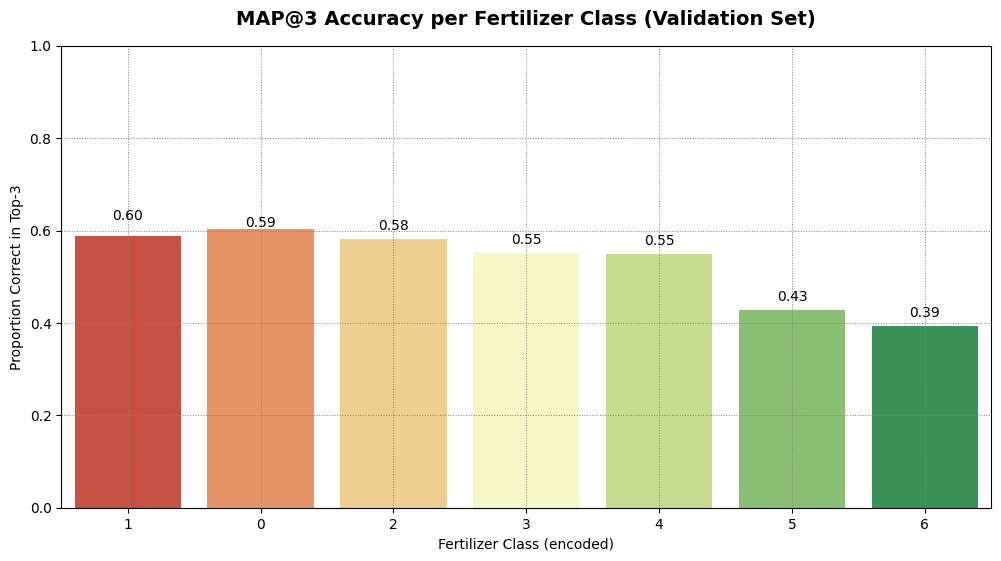

In [82]:
# Tính tỉ lệ đúng trong top-3 cho từng class
results = pd.DataFrame({
    "true": y_val,
    "correct_top3": [1 if t in p else 0 for t, p in zip(y_val, top3)]
})
class_map3 = results.groupby("true")["correct_top3"].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=class_map3.index, y=class_map3.values, palette="RdYlGn")
plt.title("MAP@3 Accuracy per Fertilizer Class (Validation Set)",  weight="bold", pad=15, fontsize=14)
plt.xlabel("Fertilizer Class (encoded)")
plt.grid(color="gray", linestyle=":", linewidth=0.7)
for i, val in enumerate(class_map3.values):
    plt.text(i, val + 0.02, f"{val:.2f}", ha='center', fontsize=10)
plt.ylabel("Proportion Correct in Top-3")
plt.xticks(ticks=range(len(class_map3)), labels=le.inverse_transform(class_map3.index))
plt.ylim(0, 1)
plt.show()

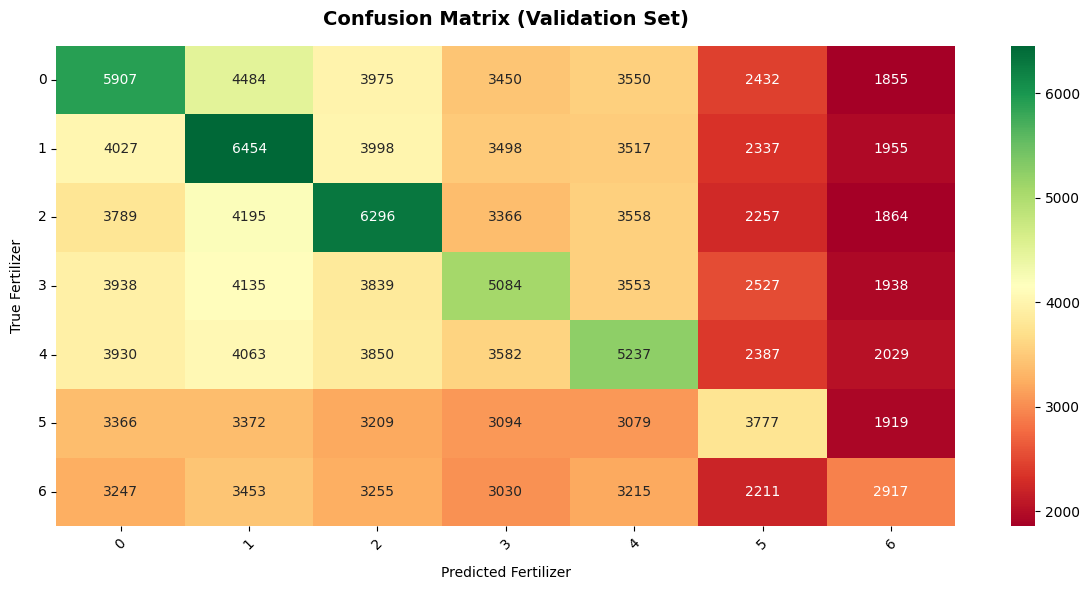

In [83]:
val_pred_top1 = np.argmax(val_pred_proba, axis=1)

# Tạo ma trận nhầm lẫn (dạng số lượng)
cm = confusion_matrix(y_val, val_pred_top1)

# Đưa vào DataFrame để seaborn vẽ dễ hơn
cm_df = pd.DataFrame(cm,
                     index=le.classes_,   # True labels
                     columns=le.classes_) # Predicted labels

# Vẽ heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(cm_df, annot=True, fmt=".0f", cmap="RdYlGn", cbar=True)

plt.title("Confusion Matrix (Validation Set)", weight="bold", pad=15, fontsize=14)
plt.xlabel("Predicted Fertilizer", labelpad=10)
plt.ylabel("True Fertilizer", labelpad=10)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [84]:
import numpy as np
from sklearn.metrics import accuracy_score, log_loss, f1_score
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer

# Asumsi:
# X_val_prepared, y_val_encoded, model, best_params, le (LabelEncoder) sudah didefinisikan.

# --- 1. PELATIHAN MODEL AKHIR ---
print("Melatih model akhir...")
# Menggunakan label integer yang sudah di-encode
model.fit(df_train_new_prepared, df_train_label_encoded) 

# --- 2. PREDIKSI ---
# Probabilitas untuk Log Loss dan MAP@3
val_pred_proba = model.predict_proba(X_val_prepared)

# Prediksi kelas keras (hard prediction) untuk Accuracy dan F1-Score
val_pred_encoded = model.predict(X_val_prepared)


# --- 3. EVALUASI METRIK ---

# a) MAP@3 (Menggunakan fungsi map3_score_func Anda)
# Top-3 class index (sudah di-encode)
top3 = np.argsort(val_pred_proba, axis=1)[:, -3:][:, ::-1]

# Karena map3_score_func menerima label integer yang sudah di-encode (0, 1, 2...)
# Asumsi y_val_encoded sudah tersedia
val_map3 = map3_score_func(y_val_encoded, val_pred_proba) 


# b) Accuracy Score
val_accuracy = accuracy_score(y_val_encoded, val_pred_encoded)

# c) Log Loss
val_logloss = log_loss(y_val_encoded, val_pred_proba)

# d) F1-Score (Macro)
# Macro: Rata-rata kinerja setiap kelas
val_f1_macro = f1_score(y_val_encoded, val_pred_encoded, average='macro')


print("\n=============================================")
print("🎯 Hasil Evaluasi Model Akhir (Validation Set)")
print("=============================================")
print(f"1. MAP@3 Score (Ranking):     {val_map3:.4f}")
print(f"2. Accuracy Score:            {val_accuracy:.4f}")
print(f"3. Log Loss (Harus Rendah):   {val_logloss:.4f}")
print(f"4. F1-Score (Macro Average):  {val_f1_macro:.4f}")
print("=============================================")

Melatih model akhir...

🎯 Hasil Evaluasi Model Akhir (Validation Set)
1. MAP@3 Score (Ranking):     0.3463
2. Accuracy Score:            0.2098
3. Log Loss (Harus Rendah):   1.9110
4. F1-Score (Macro Average):  0.2066


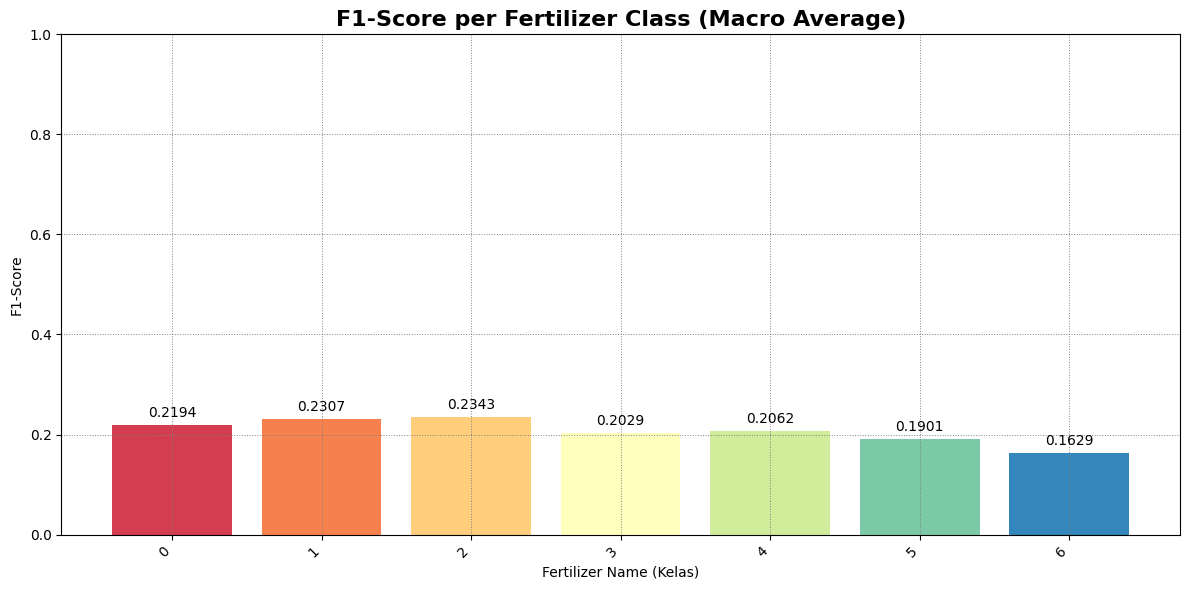

In [85]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Dapatkan F1-score untuk setiap kelas
report = classification_report(y_val_encoded, val_pred_encoded, output_dict=True)

# Ekstrak data F1-Score untuk visualisasi
f1_scores = [report[str(i)]['f1-score'] for i in range(len(le.classes_))]
class_names = le.classes_ # Label string asli

plt.figure(figsize=(12, 6))
bars = plt.bar(class_names, f1_scores, color=plt.cm.Spectral(np.linspace(0.1, 0.9, len(le.classes_))))

# Tambahkan nilai di atas bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom', fontsize=10)

plt.title('F1-Score per Fertilizer Class (Macro Average)', fontsize=16, weight='bold')
plt.xlabel("Fertilizer Name (Kelas)")
plt.ylabel("F1-Score")
plt.ylim(0, 1.0)
plt.grid(color="gray", linestyle=":", linewidth=0.7) # Gaya grid yang Anda inginkan
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Model Evaluation Summary – Fertilizer Classification**

**Overall Performance**

* **Top-1 Accuracy:** 21.8%
* **Top-3 Accuracy (MAP@3):** 54.5%
  → The model can rank fertilizers correctly within the top 3, although top-1 precision remains low.

**Per-Class MAP@3**

* Highest: **14-35-14 (0.61)**, **10-26-26 (0.59)**
* Lowest: **DAP (0.45)**, **Urea (0.42)**
  → NPK-based fertilizers are easier to identify, while **Urea** and **DAP** are often confused due to similar chemical composition.

**Confusion Insights**

* Frequent misclassifications between fertilizers with similar N–P–K ratios:

  * *10-26-26 ↔ 14-35-14*
  * *20-20 ↔ 28-28*
  * *DAP ↔ Urea*
    → Indicates current features are insufficient for full separation between close fertilizer types.

**Key Takeaways**

* MAP@3 shows that the model captures general relationships, but **lacks fine-grained accuracy**.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Prepare Final Submission File</span>

<div style="
    border-radius: 15px;
    border: 2px solid #2e7d32;
    padding: 20px;
    background: linear-gradient(125deg, #1b5e20 5%, #43a047 40%, #81c784 75%, #c8e6c9 100%);
    text-align: center;
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);
        font-weight: bold;
        margin-bottom: 10px;
        font-size: 36px;
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Prepare Final Submission File
    </h1>
</div>

In [88]:
# --- KODE LENGKAP YANG DIKOREKSI (Fokus perbaikan di Baris 7) ---

df_test_prepared = preprocessor.transform(df_test)
test_pred_proba = model.predict_proba(df_test_prepared)
top3_preds = np.argsort(test_pred_proba, axis=1)[:, -3:][:, ::-1]

# 4. Inverse transform indeks (mengembalikan string nama pupuk)
top3_labels = np.array([le.inverse_transform(pred) for pred in top3_preds])

submission_df = pd.DataFrame({
    "id": list_test_id,
    # 7. Konversi setiap elemen dalam 'pred' menjadi string sebelum menggabungkannya.
    "Fertilizer Name": [" ".join(pred.astype(str)) for pred in top3_labels] 
})

submission_df.to_csv('submission.csv', index=False)
print("\nSubmission file saved!")
submission_df.head(10)


Submission file saved!


id Fertilizer Name
0  750000           0 6 5
1  750001           2 0 3
2  750002           3 2 4
3  750003           1 2 5
4  750004           3 0 4
5  750005           4 3 1
6  750006           4 1 0
7  750007           5 4 2
8  750008           1 3 0
9  750009           1 3 0

Feature Importances:
                  Feature  Importance
6             Phosphorous    0.047811
4                Nitrogen    0.047213
3                Moisture    0.046777
19       Crop_Type_Pulses    0.045151
20    Crop_Type_Sugarcane    0.045142
0                      id    0.045140
5               Potassium    0.044958
2                Humidity    0.044037
14  Crop_Type_Ground Nuts    0.044026
18        Crop_Type_Paddy    0.043395
13       Crop_Type_Cotton    0.043254
1             Temparature    0.043162
22        Crop_Type_Wheat    0.043043
21      Crop_Type_Tobacco    0.042711
17    Crop_Type_Oil seeds    0.042660
16      Crop_Type_Millets    0.042434
12       Crop_Type_Barley    0.041915
15        Crop_Type_Maize    0.041884
11        Soil_Type_Sandy    0.041514
8        Soil_Type_Clayey    0.041499
7         Soil_Type_Black    0.040839
9         Soil_Type_Loamy    0.040800
10          Soil_Type_Red    0.040633


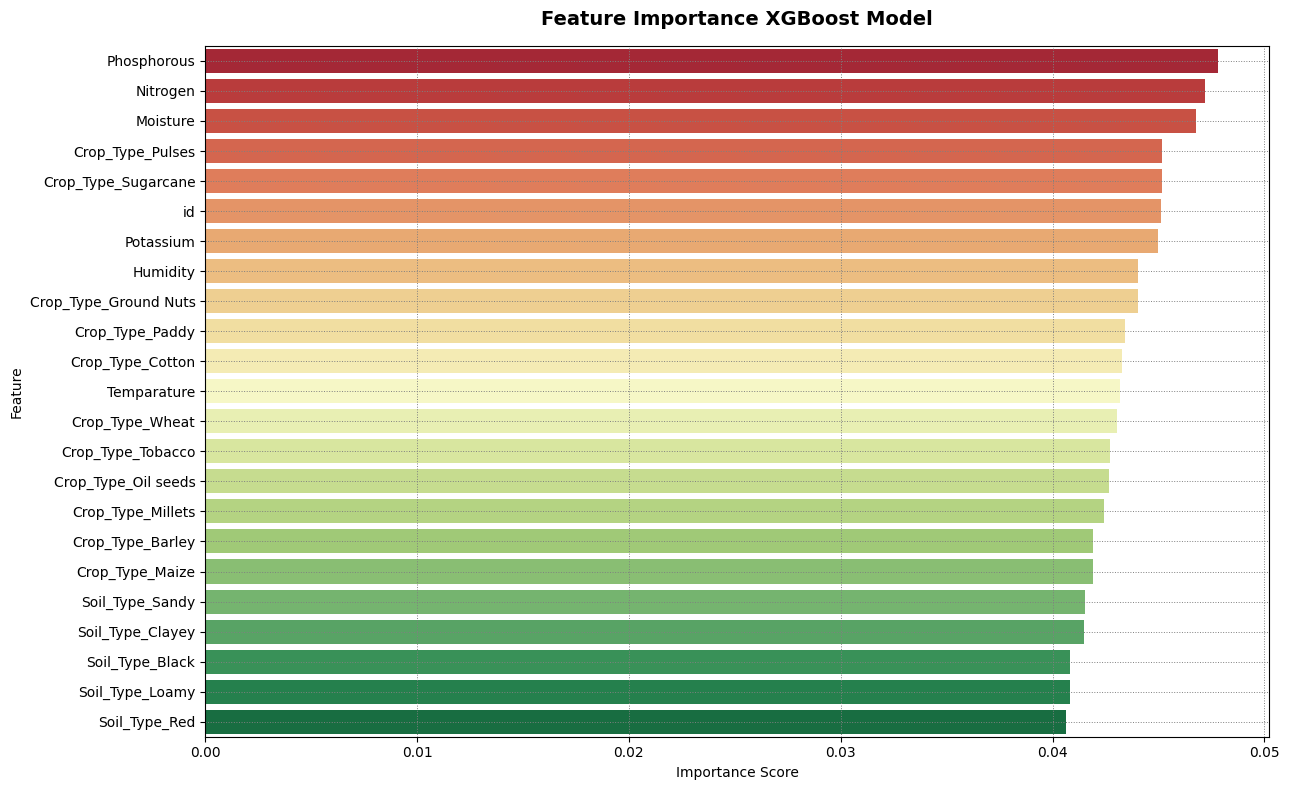

In [87]:
# Extract feature importances from the trained model (last fold)
feature_importance = model.feature_importances_

importance_df = pd.DataFrame({
    "Feature": clean_features,
    "Importance": feature_importance
})

importance_df = importance_df.sort_values(by="Importance", ascending=False)

print("Feature Importances:")
print(importance_df)

plt.figure(figsize=(13, 8))
sns.barplot(
    x="Importance", 
    y="Feature", 
    data=importance_df, 
    palette="RdYlGn"
)
plt.title("Feature Importance XGBoost Model", weight="bold", pad=15, fontsize=14)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.grid(color="gray", linestyle=":", linewidth=0.7)
plt.tight_layout()
plt.show()

**Feature Importance – XGBoost Model (Overview)**

* **Nutrient-related features (Phosphorous, Nitrogen, Potassium, Moisture)** dominate the model,
  indicating that fertilizer recommendations are primarily driven by nutrient composition.

* **Environmental factors (Humidity, Temperature)** also contribute moderately,
  reflecting the model’s sensitivity to local growing conditions.

* **Crop_Type features** show meaningful influence, suggesting that crop context helps differentiate fertilizer needs.

* **Soil_Type features** have the lowest impact, implying that soil information is underutilized —
  potential improvement through interaction features (*e.g.*, Soil × Crop or Soil × Moisture).

**Key takeaway:**

> The model mainly relies on **NPK and moisture-related variables**, while **Soil_Type** contributes marginally —
> future work should enhance soil–crop interaction features to achieve better contextual accuracy.